## ** Part 1: AzureML Workspace Setup and Connection**

In [1]:
# Import the Workspace class from the azureml.core module

from azureml.core import Workspace

In [2]:
# Load the AzureML workspace configuration from the default config file (config.json)
# and print the name of the loaded workspace

ws = Workspace.from_config()
print(ws.name, 'loaded')

htw2024 loaded


In [3]:
# Print a header for the list of compute resources
print("Compute Resources")

# Iterate through each compute target in the workspace
for compute_name in ws.compute_targets:
    # Get the compute target object for the current compute target
    compute = ws.compute_targets[compute_name]
    # Print the compute target name and type
    print("\t", compute.name, ':', compute.type)

Compute Resources
	 trimtrim1103971 : ComputeInstance


## **PART 2: DATA UNDERSTANDING**

In [4]:
# Import the necessary libraries

import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score,accuracy_score, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
%pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE as ImbSMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.naive_bayes import GaussianNB

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load and Display the Dataset
df = pd.read_csv('TUANDROMD.csv')

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0                             0.0                   0.0              0.0   
1                             0.0                   0.0              0.0   
2                             0.0                   0.0              0.0   
3                             0.0                   0.0              0.0   
4                             0.0                   0.0              0.0   

   ACCESS_NETWORK_STATE  ...  \
0                   1.0  ...   
1                   1.0  ...   
2                   1.0  ...   
3                   0.0  ...   
4                   0.0  ...   

   Landroid/telephony/TelephonyManager;->getLine1Number  \
0                                                1.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getNetworkOperator  \
0                                                1.0          
1                                                0.0          
2                                                0.0          
3                                                1.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
0                                                1.0              
1                                                0.0              
2                                                0.0              
3                                                1.0              
4                                                0.0              

   Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
0                                                0.0            
1                                                1.0            
2                                                0.0            
3                                                1.0            
4                                                0.0            

   Landroid/telephony/TelephonyManager;->getSimOperator  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Landroid/telephony/TelephonyManager;->getSimOperatorName  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   Landroid/telephony/TelephonyManager;->getSimCountryIso  \
0                                                0.0        
1                                                

In [6]:
# Display the last few rows (tail) of the DataFrame to further inspect the data
df.tail()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
4460                   0.0                      1.0   
4461                   0.0                      0.0   
4462                   0.0                      0.0   
4463                   0.0                      0.0   
4464                   0.0                      0.0   

      ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
4460                        0.0                     0.0   
4461                        0.0                     0.0   
4462                        0.0                     0.0   
4463                        0.0                     0.0   
4464                        0.0                     0.0   

      ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
4460                    0.0                   0.0   
4461                    0.0                   0.0   
4462                    0.0                   0.0   
4463                    0.0                   0.0   
4464                    0.0                   0.0   

      ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
4460                             0.0                   1.0              1.0   
4461                             0.0                   0.0              0.0   
4462                             0.0                   0.0              0.0   
4463                             0.0                   0.0              0.0   
4464                             0.0                   0.0              0.0   

      ACCESS_NETWORK_STATE  ...  \
4460                   1.0  ...   
4461                   1.0  ...   
4462                   0.0  ...   
4463                   1.0  ...   
4464                   1.0  ...   

      Landroid/telephony/TelephonyManager;->getLine1Number  \
4460                                                0.0      
4461                                                0.0      
4462                                                0.0      
4463                                                0.0      
4464                                                0.0      

      Landroid/telephony/TelephonyManager;->getNetworkOperator  \
4460                                                0.0          
4461                                                1.0          
4462                                                0.0          
4463                                                0.0          
4464                                                0.0          

      Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
4460                                                0.0              
4461                                                1.0              
4462                                                0.0              
4463                                                0.0              
4464                                                0.0              

      Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
4460                                                0.0            
4461                                                0.0            
4462                                                0.0            
4463                                                0.0            
4464                                                0.0            

      Landroid/telephony/TelephonyManager;->getSimOperator  \
4460                                                0.0      
4461                                                0.0      
4462                                                0.0      
4463                                                0.0      
4464                                                0.0      

      Landroid/telephony/TelephonyManager;->getSimOperatorName  \
4460                                                0.0          
4461                                                0.0          
4462                                                0.0          
4463                                                0.0          
4464        

In [7]:
# Retrieve and print the dimensions (number of rows and columns) of the DataFrame
# Dataset has 4465 rows and 242 traits

df.shape

(4465, 242)

In [8]:
# Generate essential information about the DataFrame
# Shows the index of the DataFrame, ranging from 0 to 4464, with a total of 4465 entries.
# There are 242 columns in the DataFrame, with column names ranging from 'ACCESS_ALL_DOWNLOADS' to 'Label'.
# 242 columns have a data type of float64, meaning they are numeric columns represented as 64-bit floating-point numbers.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 8.2 MB


In [9]:
# Create descriptive statistics for each numeric column in the DataFrame
# Each columns has a minimum value of 0.0 and a maximum value of 1.0.
# Only 4464 entries out of 4465 were generated, indicating a missing value in each column based on the 'count' column

df.describe().transpose()

count      mean  \
ACCESS_ALL_DOWNLOADS                                4464.0  0.000896   
ACCESS_CACHE_FILESYSTEM                             4464.0  0.000896   
ACCESS_CHECKIN_PROPERTIES                           4464.0  0.004928   
ACCESS_COARSE_LOCATION                              4464.0  0.083333   
ACCESS_COARSE_UPDATES                               4464.0  0.006944   
...                                                    ...       ...   
Landroid/telephony/TelephonyManager;->getSimOpe...  4464.0  0.056228   
Landroid/telephony/TelephonyManager;->getSimCou...  4464.0  0.133065   
Landroid/telephony/TelephonyManager;->getSimSer...  4464.0  0.013665   
Lorg/apache/http/impl/client/DefaultHttpClient;...  4464.0  0.150090   
Label                                               4464.0  0.798611   

                                                         std  min  25%  50%  \
ACCESS_ALL_DOWNLOADS                                0.029924  0.0  0.0  0.0   
ACCESS_CACHE_FILESYSTEM                             0.029924  0.0  0.0  0.0   
ACCESS_CHECKIN_PROPERTIES                           0.070037  0.0  0.0  0.0   
ACCESS_COARSE_LOCATION                              0.276416  0.0  0.0  0.0   
ACCESS_COARSE_UPDATES                               0.083053  0.0  0.0  0.0   
...                                                      ...  ...  ...  ...   
Landroid/telephony/TelephonyManager;->getSimOpe...  0.230387  0.0  0.0  0.0   
Landroid/telephony/TelephonyManager;->getSimCou...  0.339682  0.0  0.0  0.0   
Landroid/telephony/TelephonyManager;->getSimSer...  0.116108  0.0  0.0  0.0   
Lorg/apache/http/impl/client/DefaultHttpClient;...  0.357199  0.0  0.0  0.0   
Label                                               0.401083  0.0  1.0  1.0   

                                                    75%  max  
ACCESS_ALL_DOWNLOADS                                0.0  1.0  
ACCESS_CACHE_FILESYSTEM                             0.0  1.0  
ACCESS_CHECKIN_PROPERTIES                           0.0  1.0  
ACCESS_COARSE_LOCATION                              0.0  1.0  
ACCESS_COARSE_UPDATES                               0.0  1.0  
...                                                 ...  ...  
Landroid/telephony/TelephonyManager;->getSimOpe...  0.0  1.0  
Landroid/telephony/TelephonyManager;->getSimCou...  0.0  1.0  
Landroid/telephony/TelephonyManager;->getSimSer...  0.0  1.0  
Lorg/apache/http/impl/client/DefaultHttpClient;...  0.0  1.0  
Label                                               1.0  1.0  

[242 rows x 8 columns]

In [10]:
# Checkout unique values and the number of missing values for each column

# Iterates through each column in the DataFrame
for column in df.columns:
    # Print the column name, unique values, and the number of missing values
    print(f"{column}. Unique values: {set(df[column].unique())}. Number of missing values: {df[column].isna().sum()}")

# In the dataframe, there are two unique variables (0.0 and 1.0) in each column, and there is one missing value.

ACCESS_ALL_DOWNLOADS. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_CACHE_FILESYSTEM. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_CHECKIN_PROPERTIES. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_COARSE_LOCATION. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_COARSE_UPDATES. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_FINE_LOCATION. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_LOCATION_EXTRA_COMMANDS. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_MOCK_LOCATION. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_MTK_MMHW. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_NETWORK_STATE. Unique values: {0.0, 1.0, nan}. Number of missing values: 1
ACCESS_PROVIDER. Unique values: {0.0, nan}. Number of missing values: 1
ACCESS_SERVICE. Unique values: {0.0, nan}. Number of missing values: 1
ACCESS_SHARED_DATA. U

In [11]:
# Calculate and display the count of each unique value in the 'Label' column. 
# There are 3565 malware (1) and 899 goodware (0)  labels in the dataset.

label_count = df['Label'].value_counts()
label_count

Label
1.0    3565
0.0     899
Name: count, dtype: int64

In [12]:
# Calculate and display the percentage distribution of malware and goodware labels based on the counts
# There is a significant imbalance in the dataset, with malware accounting for 80% and goodware for 20% 

label_percentages = label_count / len(df) * 100
label_percentages

Label
1.0    79.843225
0.0    20.134378
Name: count, dtype: float64

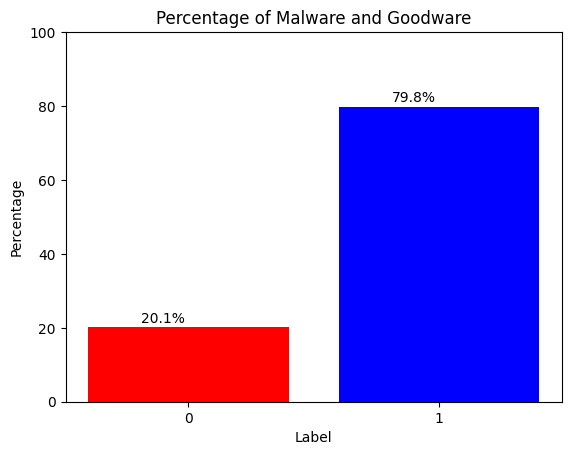

In [13]:
# Create a bar graph with custom colors and annotations
colors = ['blue', 'red']
bars = plt.bar(label_percentages.index, label_percentages, color=colors)

# Add percentage annotations to the bars
for bar, percentage in zip(bars, label_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Set the x-axis ticks to match the label counts index
plt.xticks(label_count.index)

# Set labels for x and y axes
plt.xlabel('Label')
plt.ylabel('Percentage')

# Set the title of the plot
plt.title('Percentage of Malware and Goodware')

# Set the y-axis limit to ensure a proper percentage scale
plt.ylim(0, 100)
plt.show()

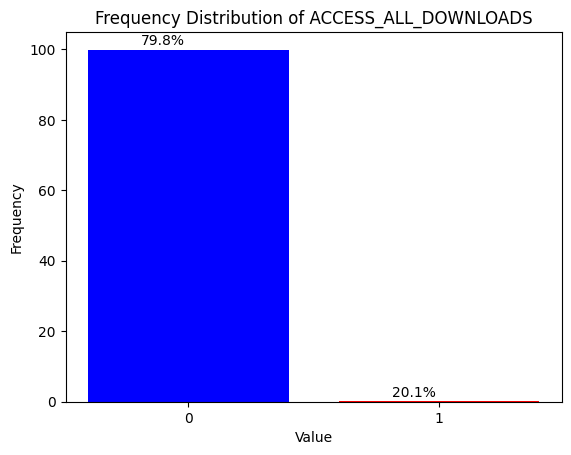

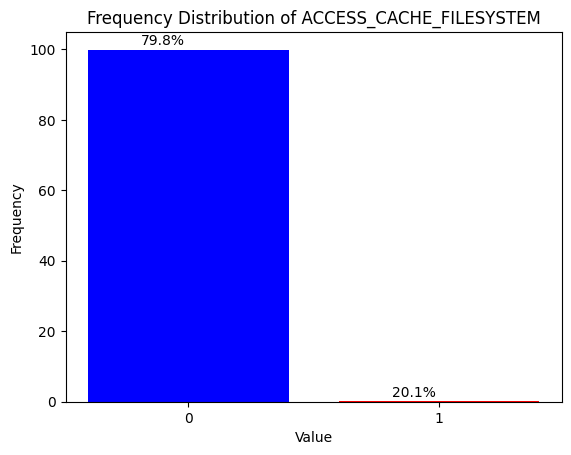

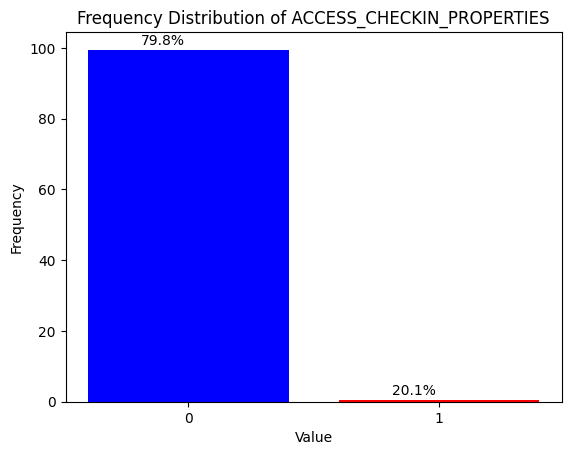

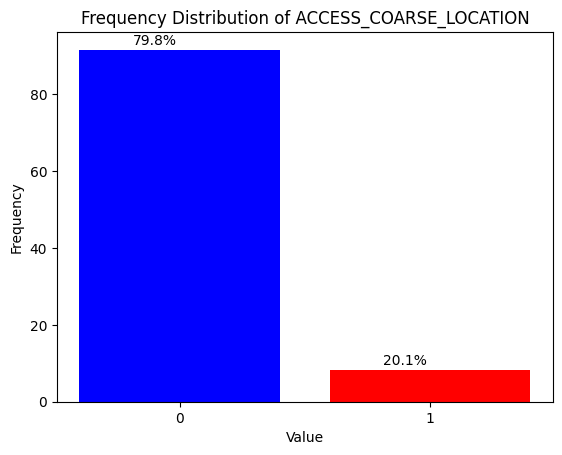

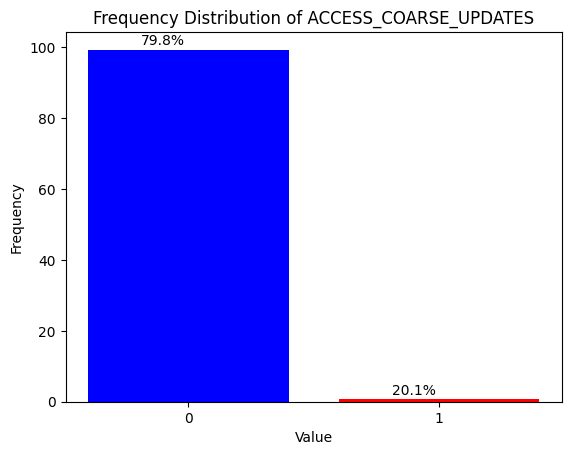

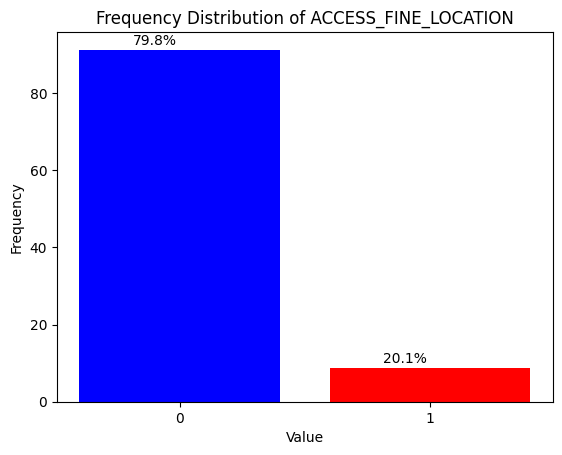

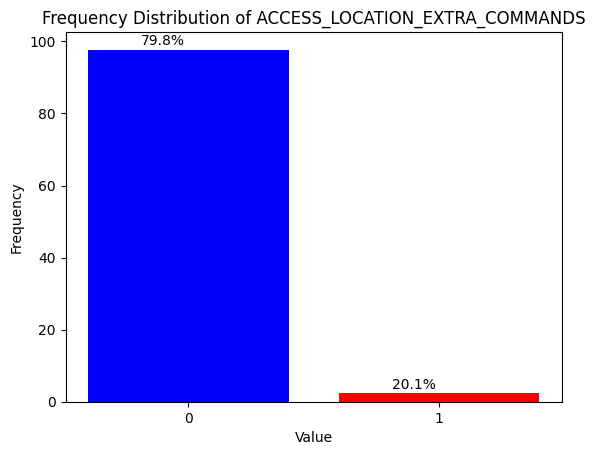

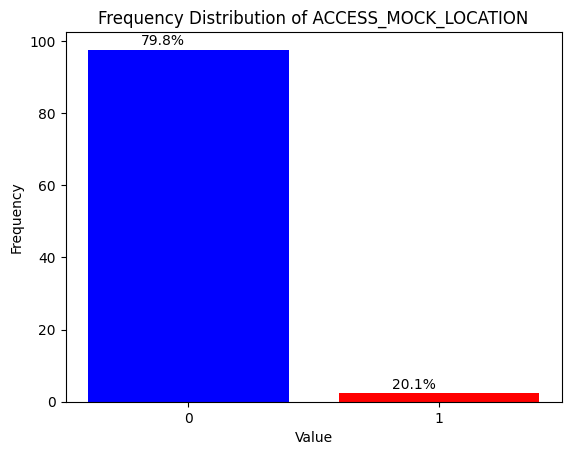

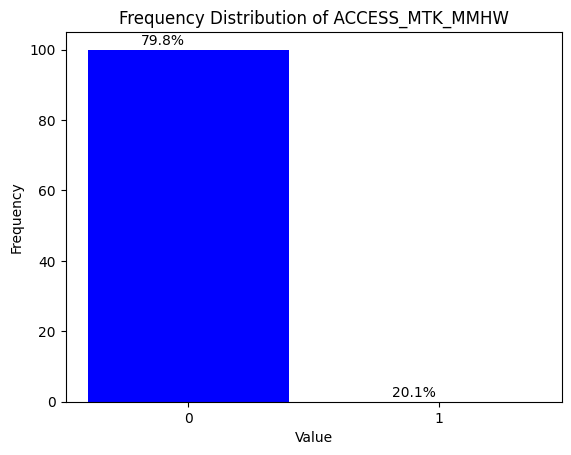

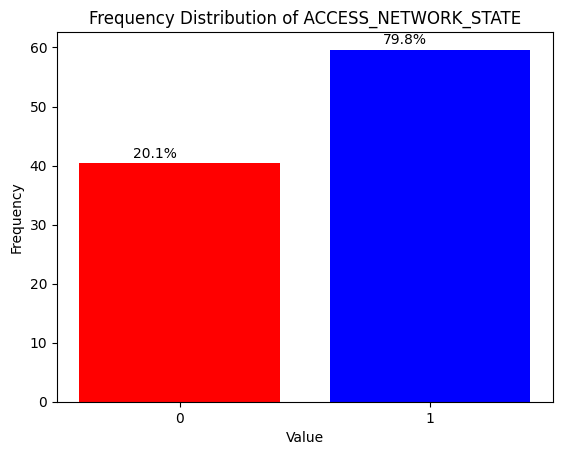

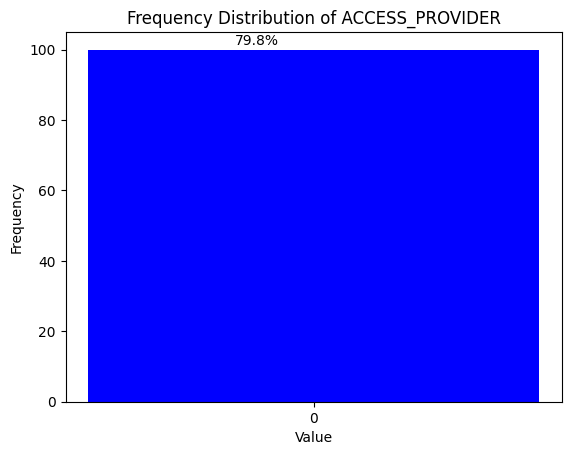

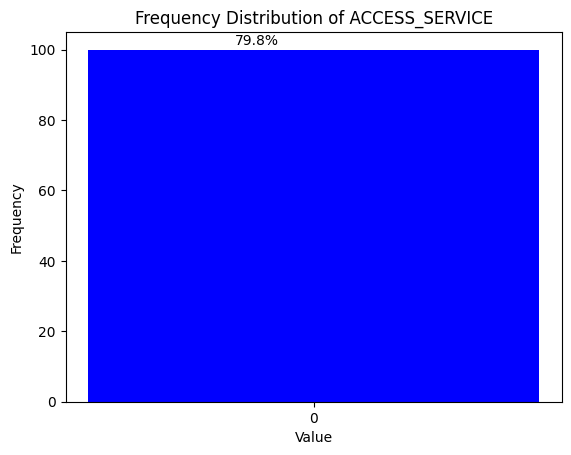

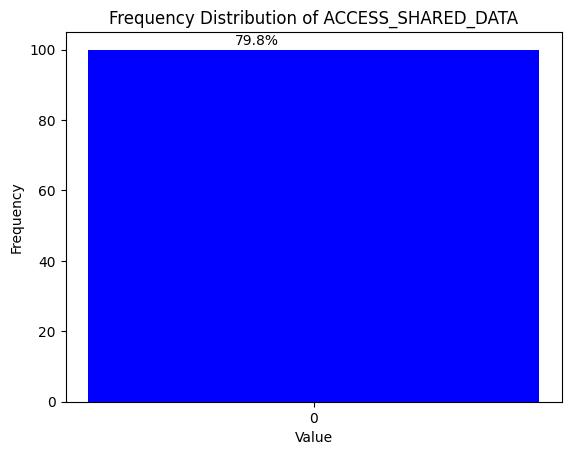

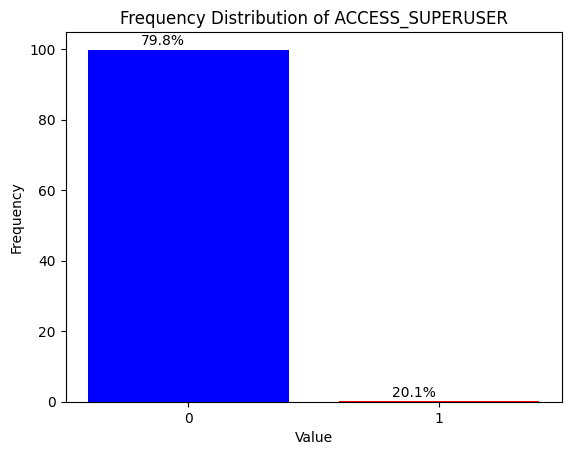

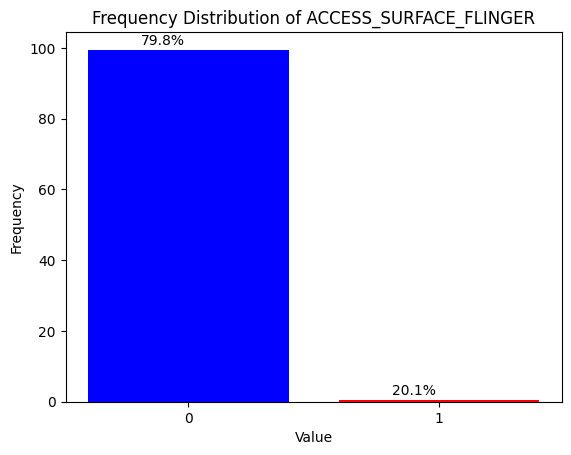

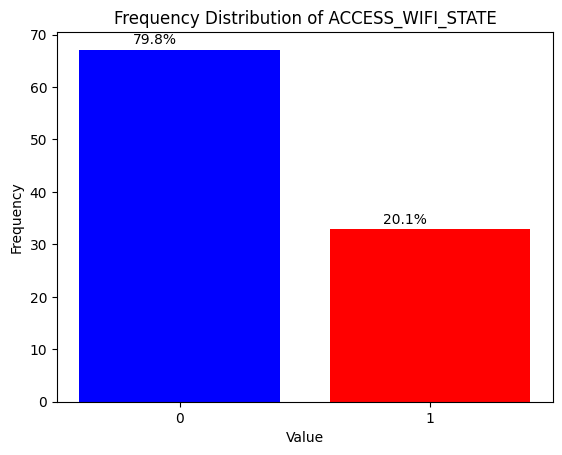

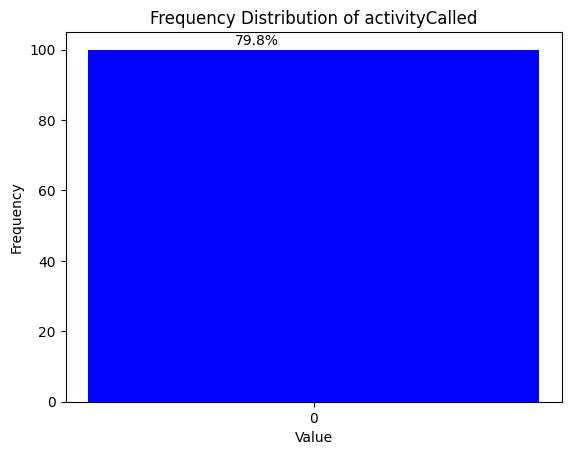

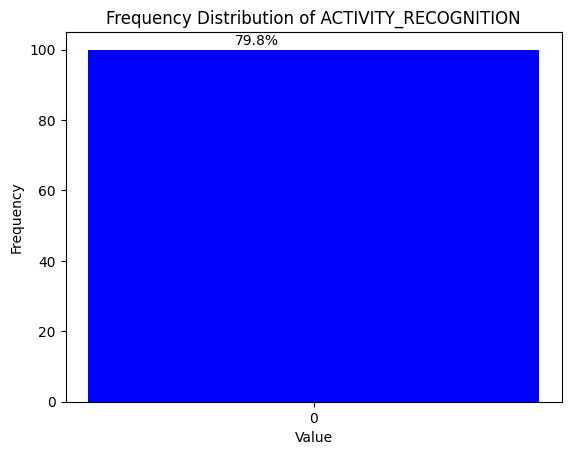

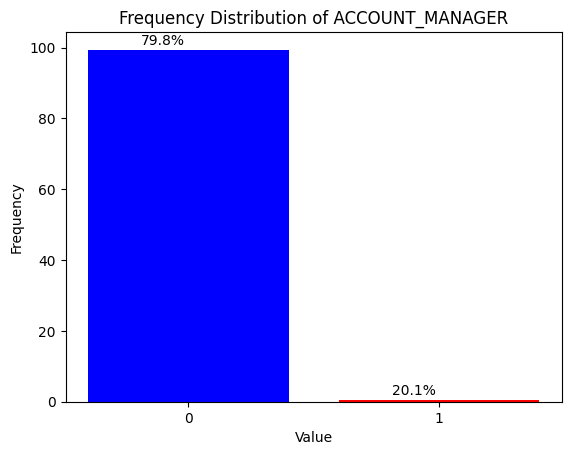

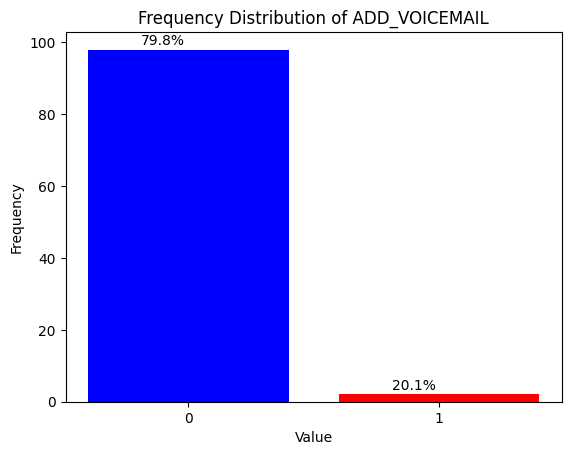

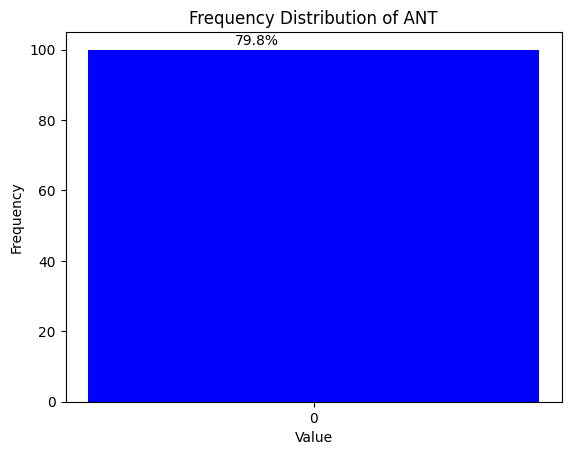

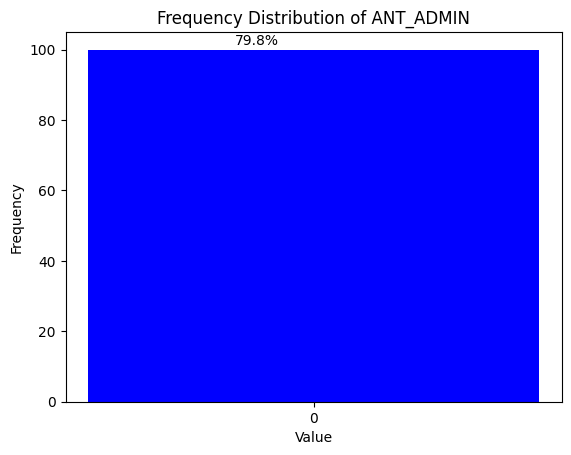

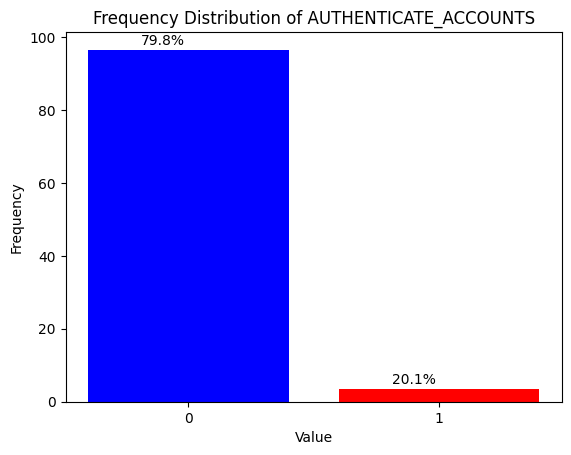

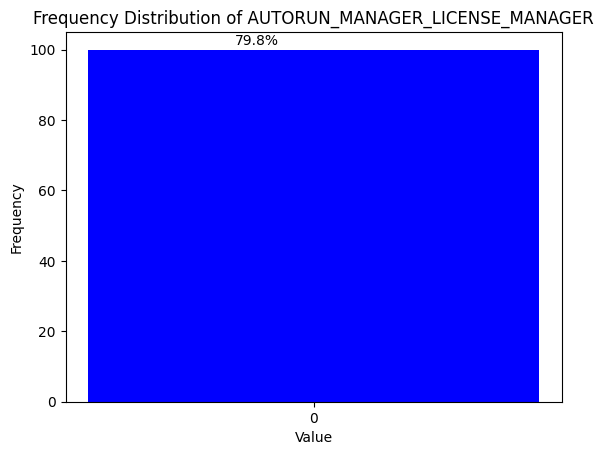

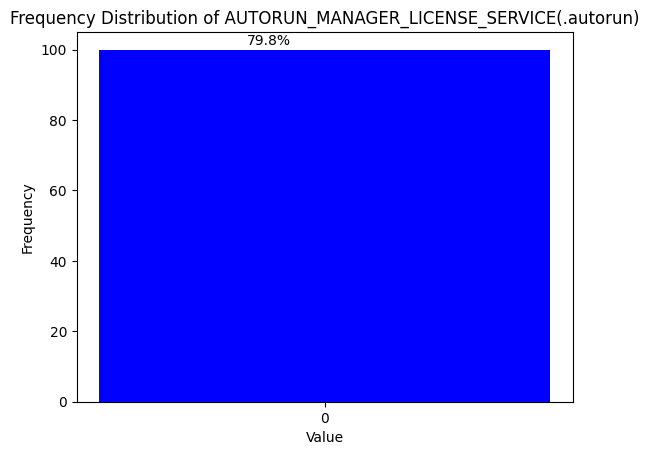

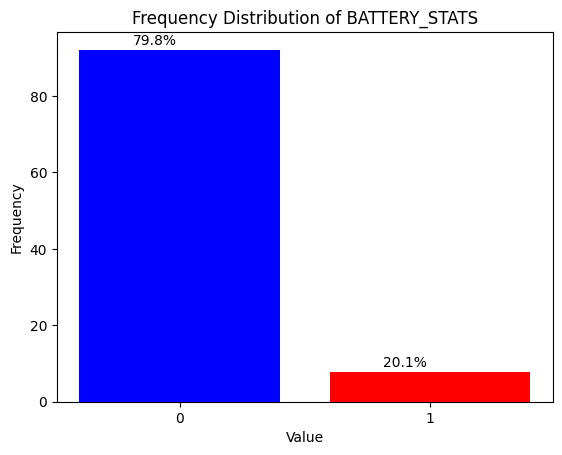

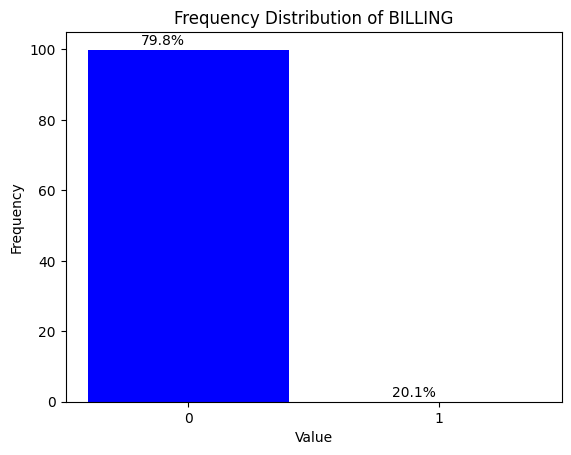

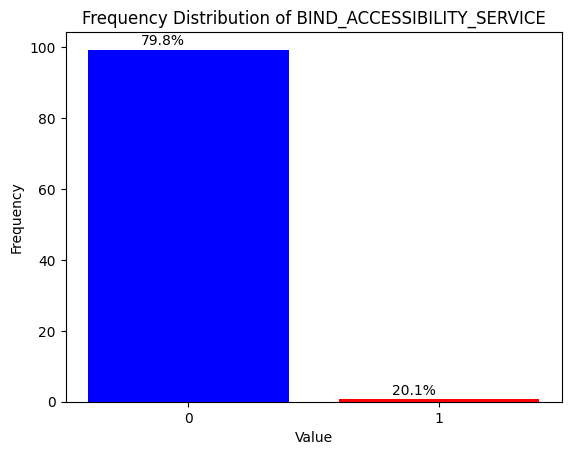

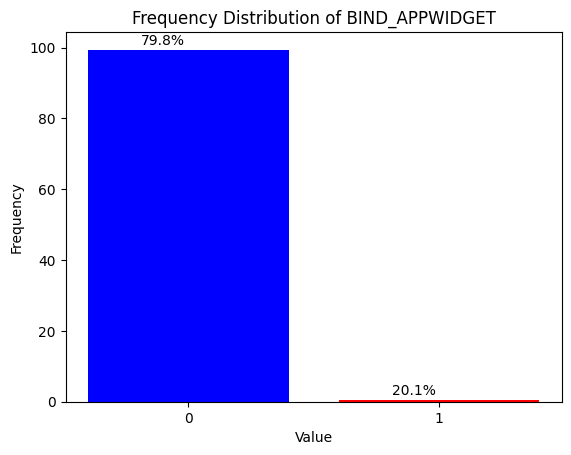

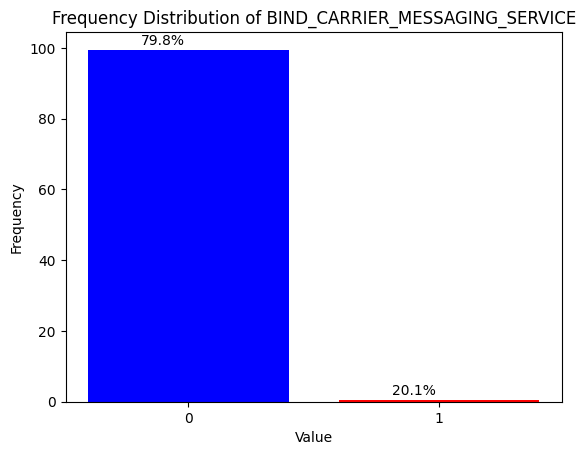

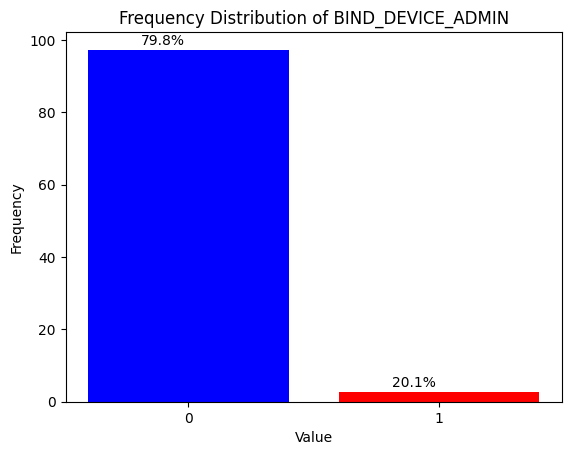

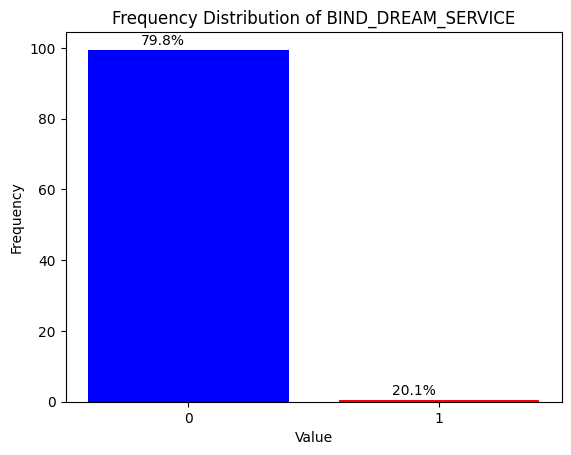

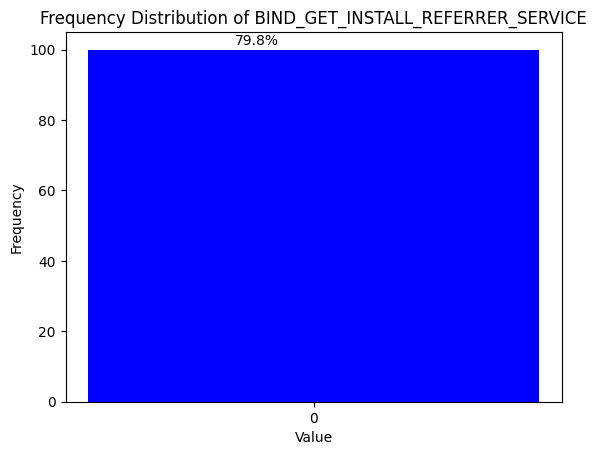

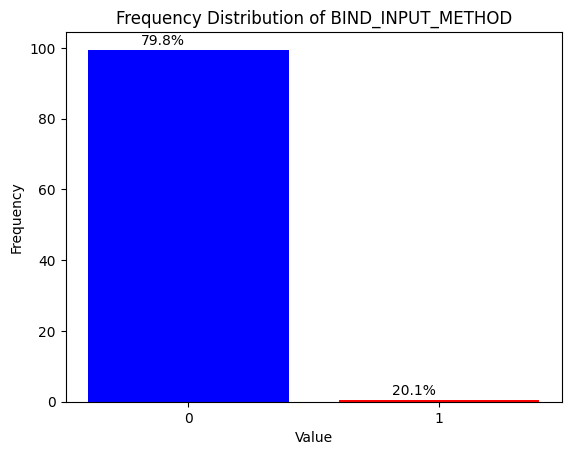

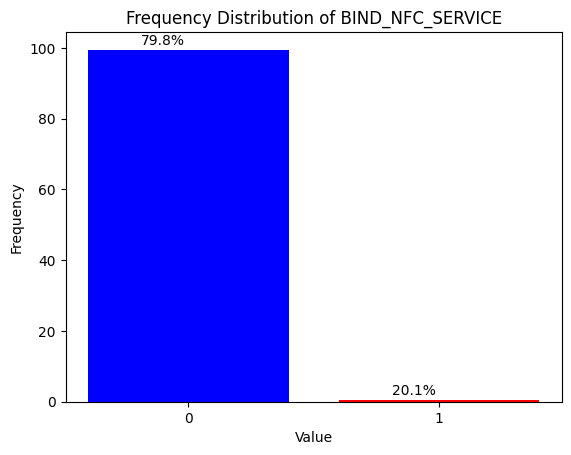

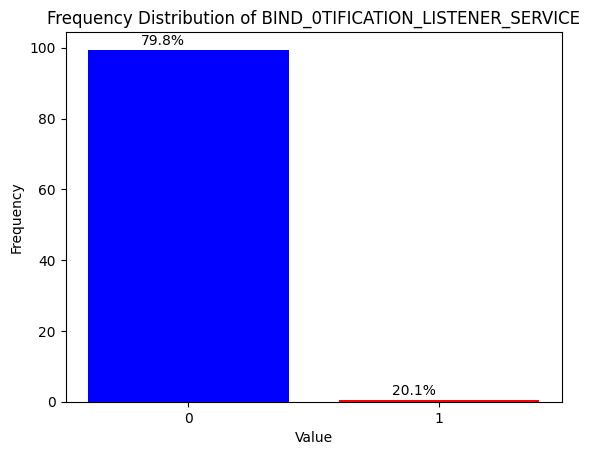

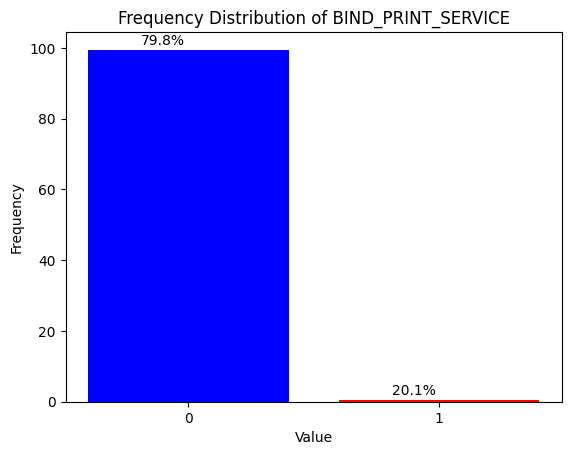

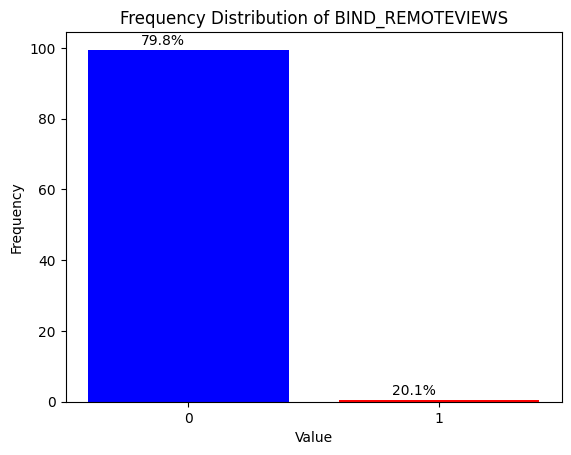

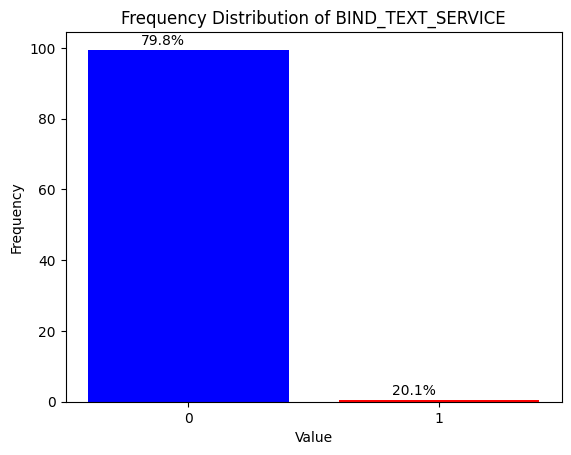

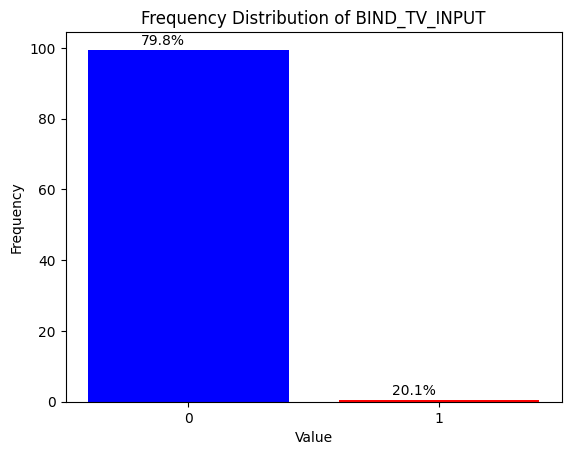

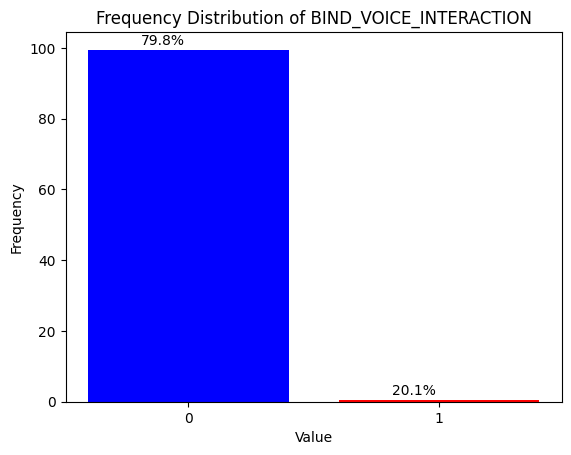

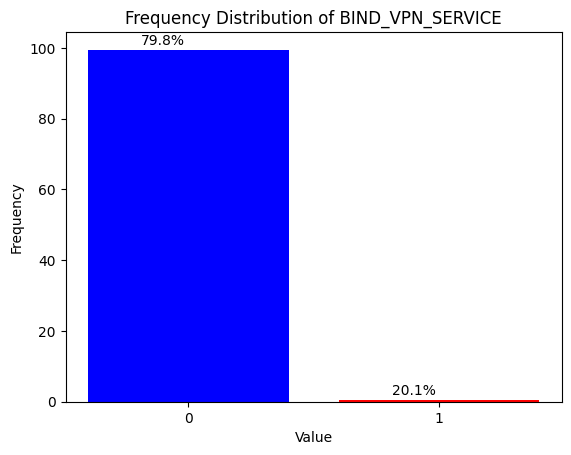

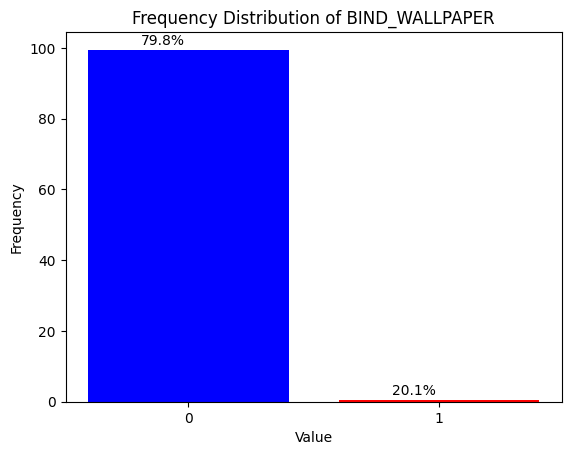

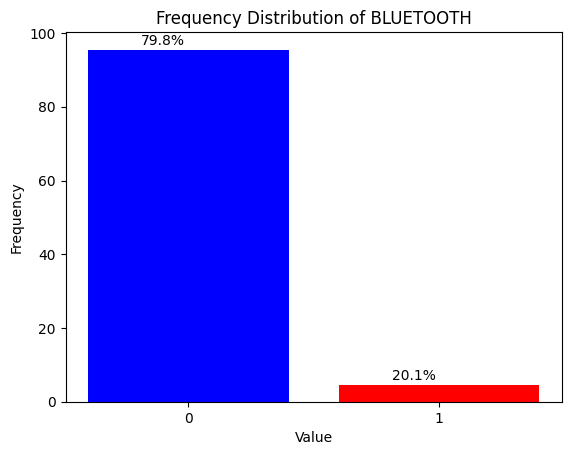

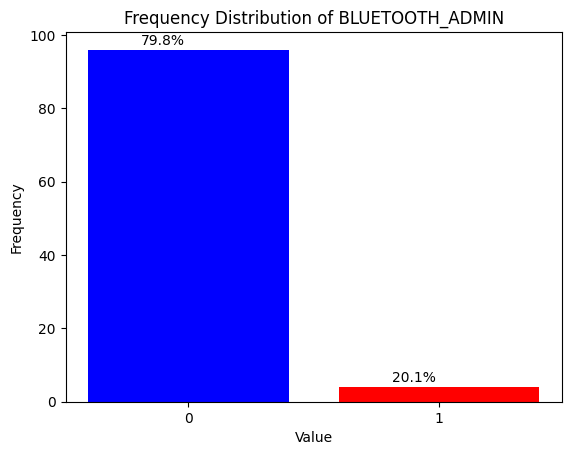

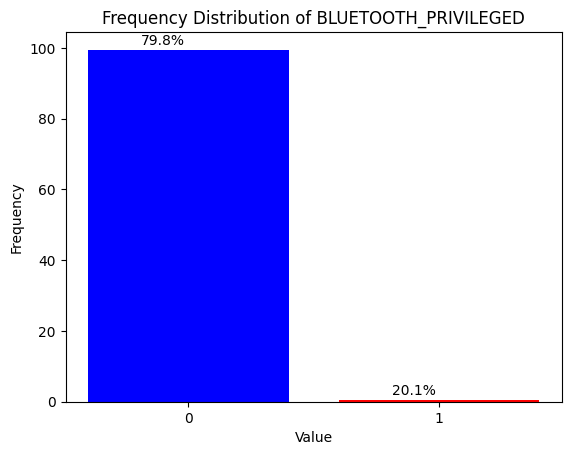

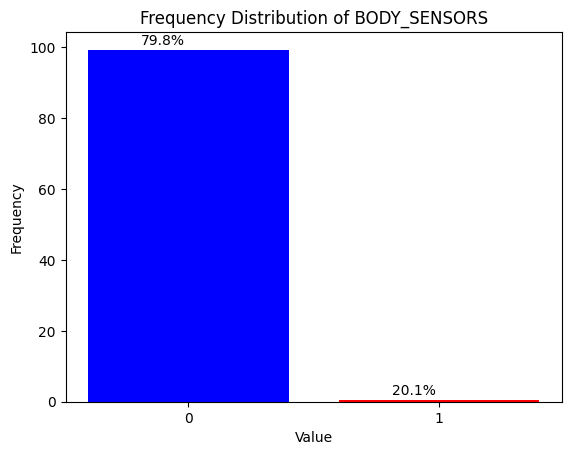

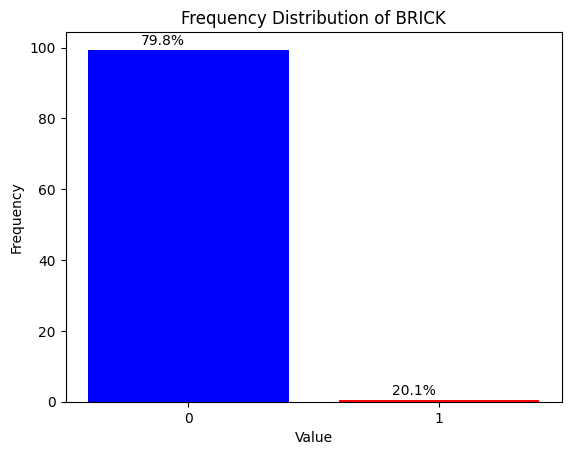

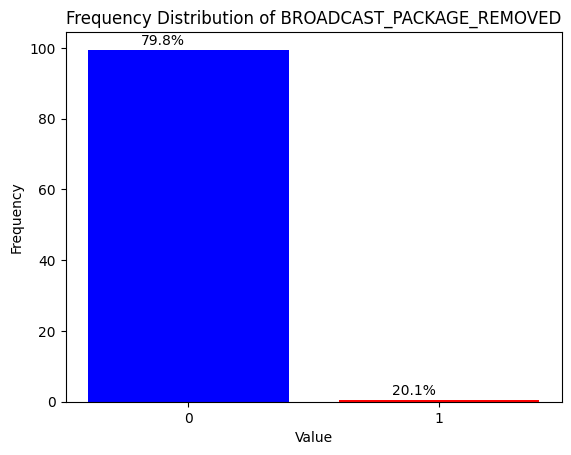

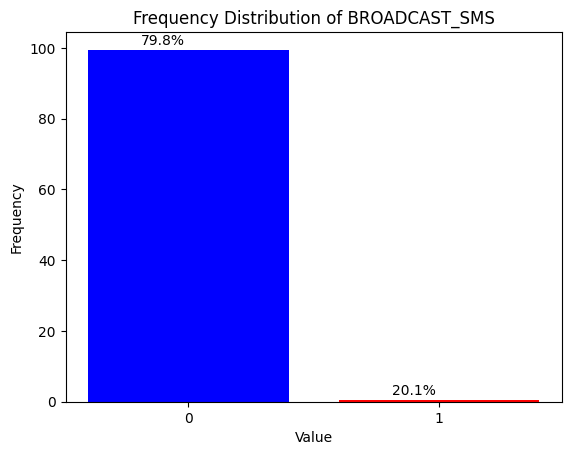

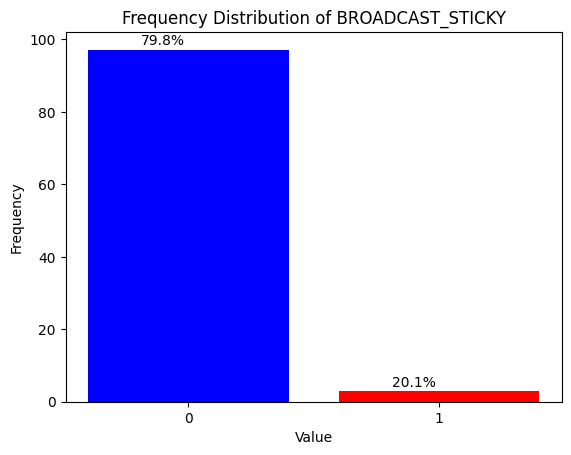

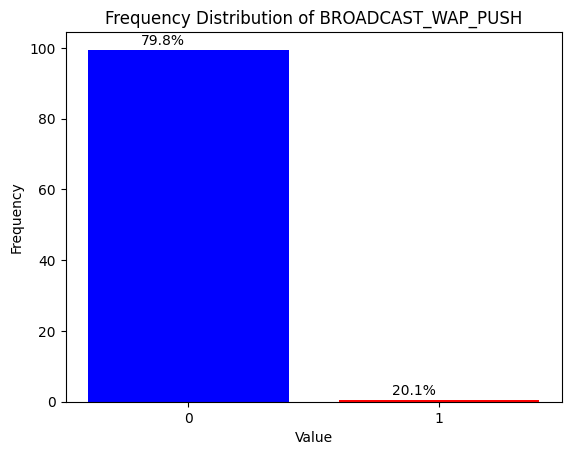

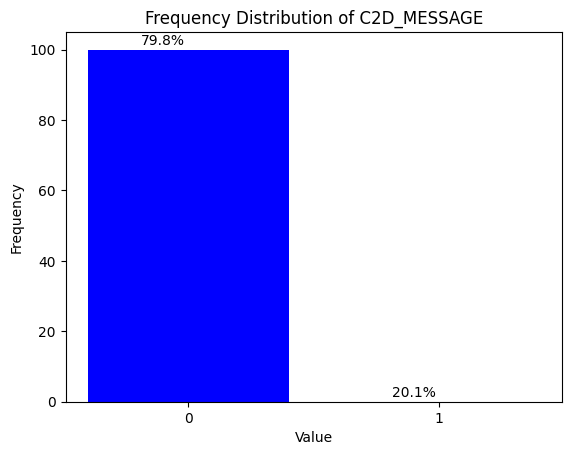

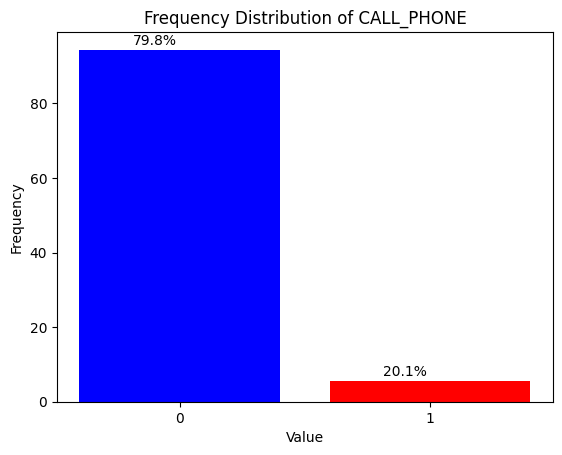

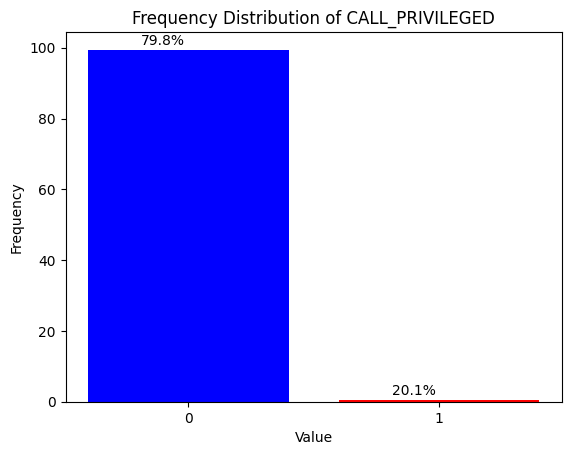

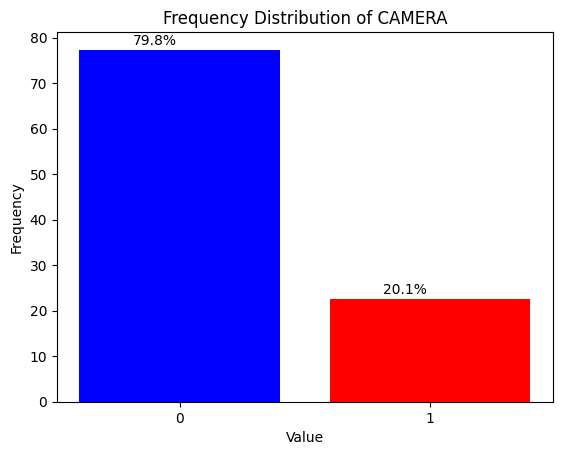

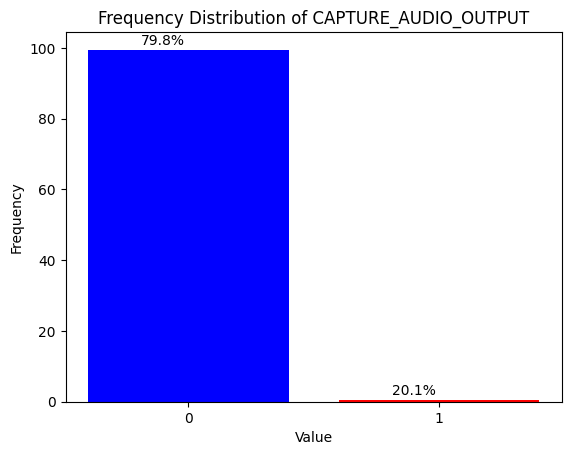

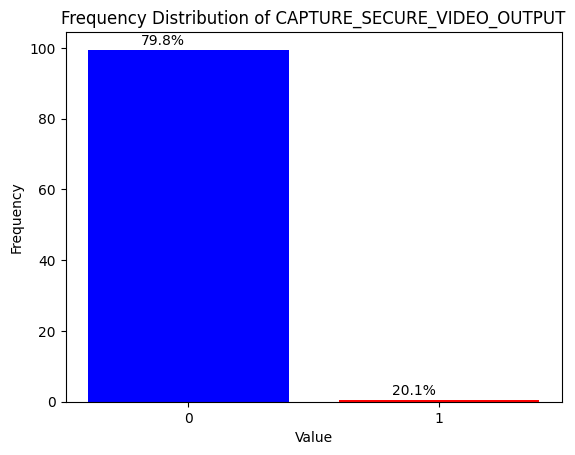

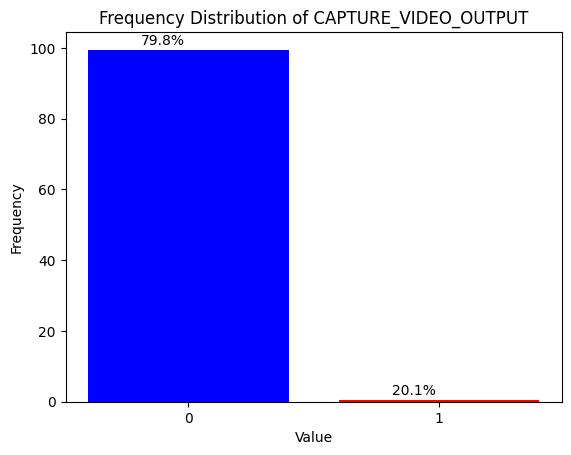

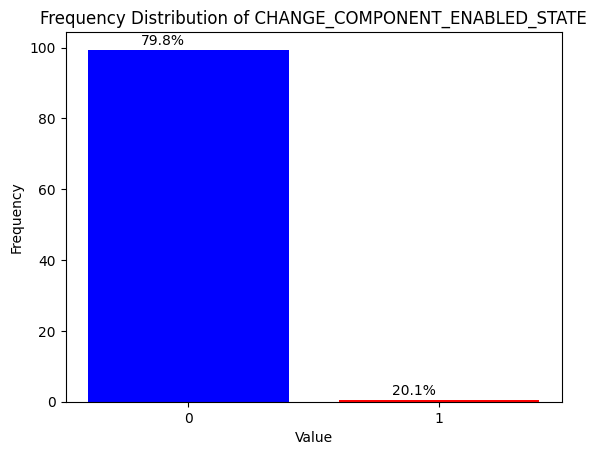

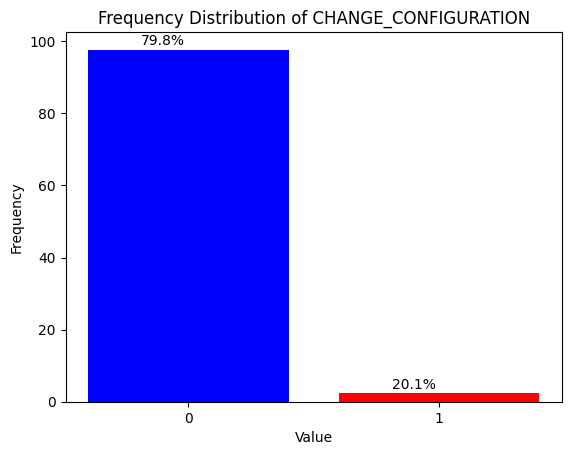

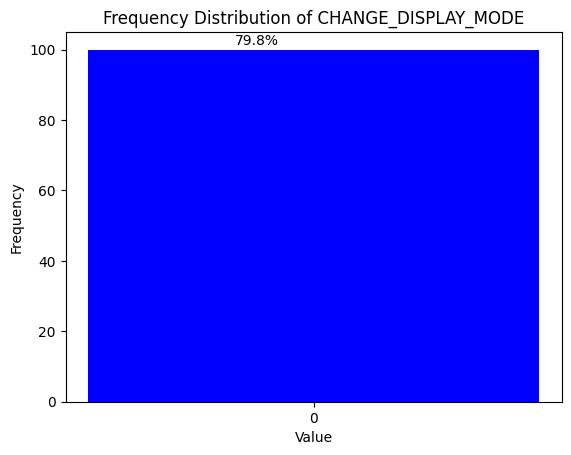

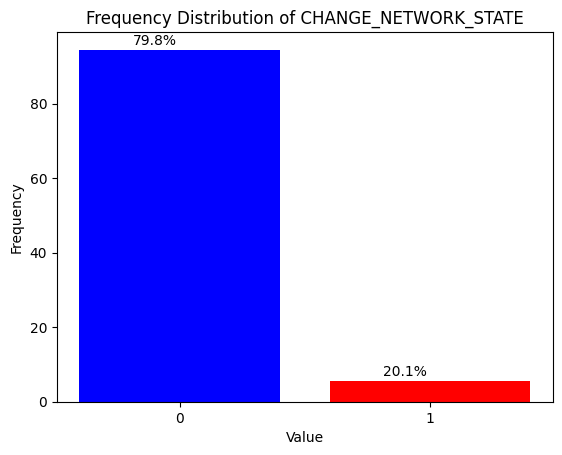

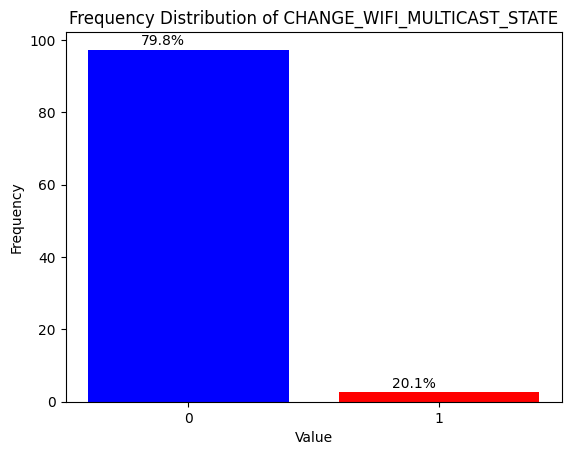

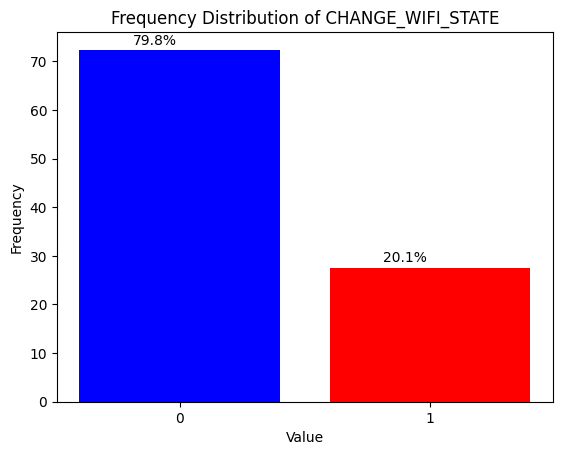

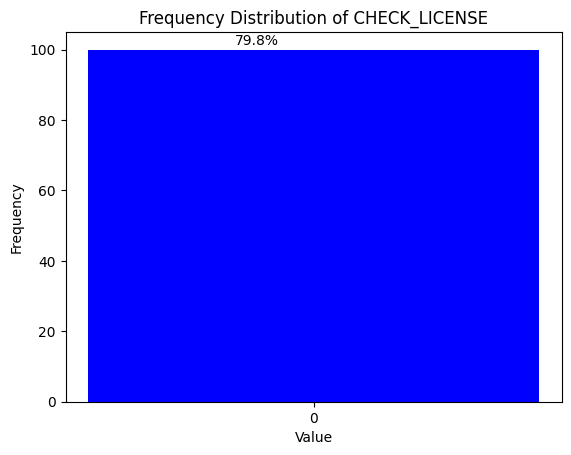

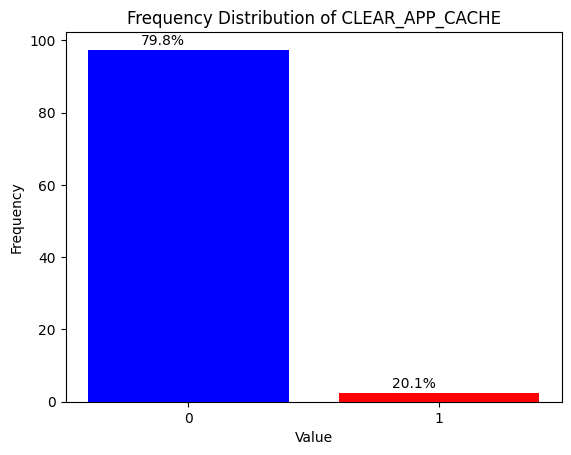

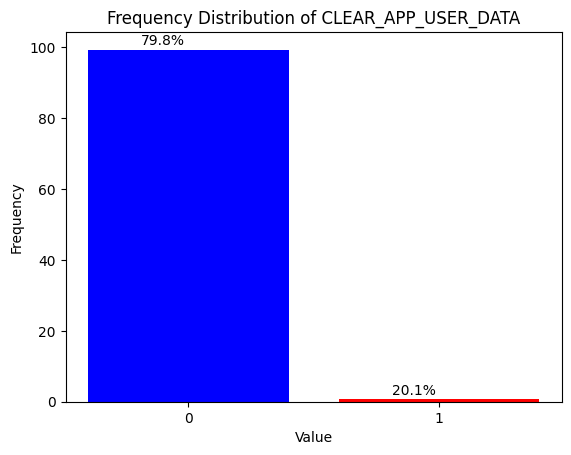

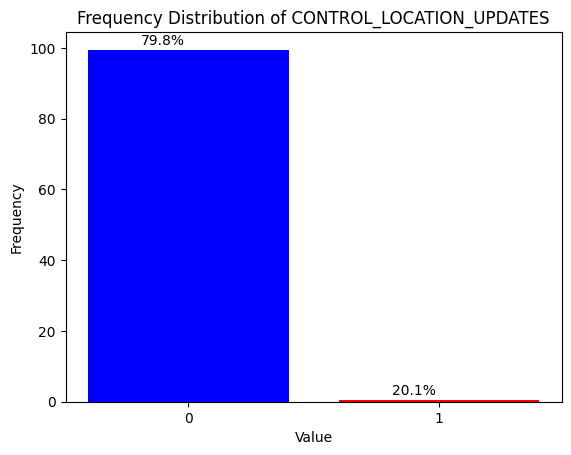

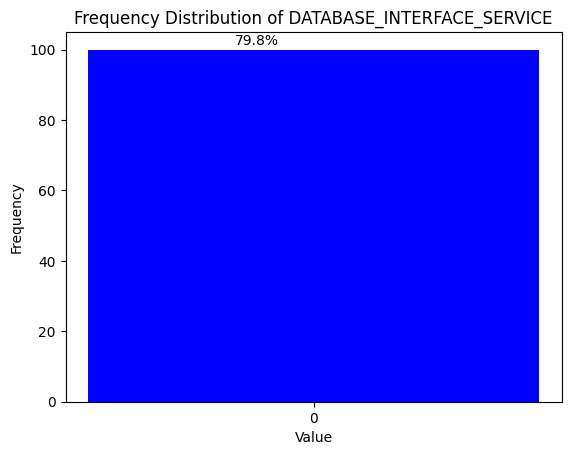

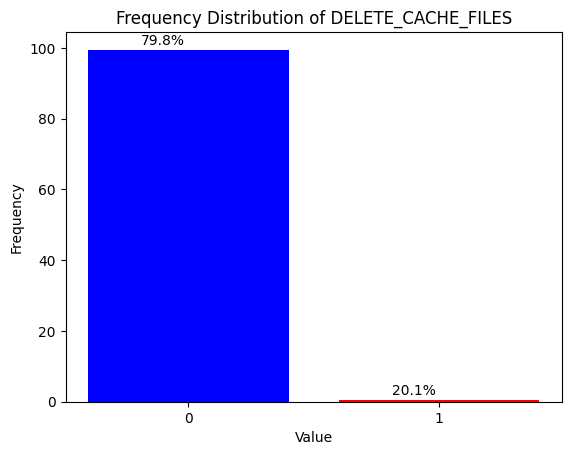

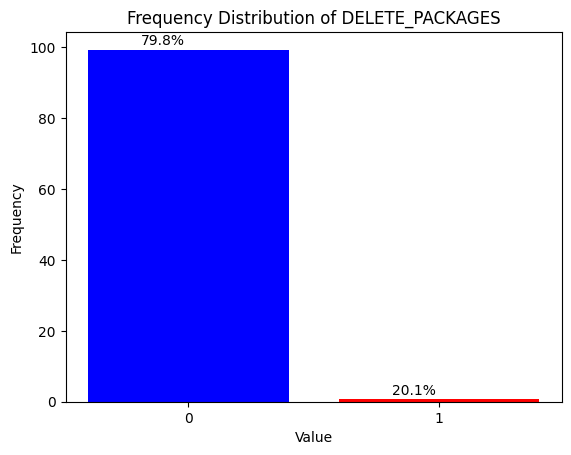

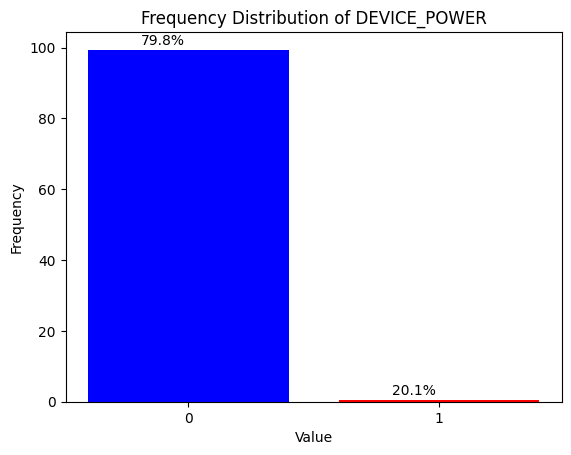

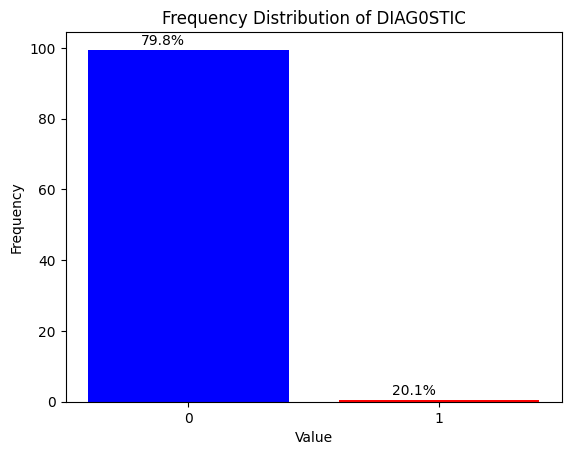

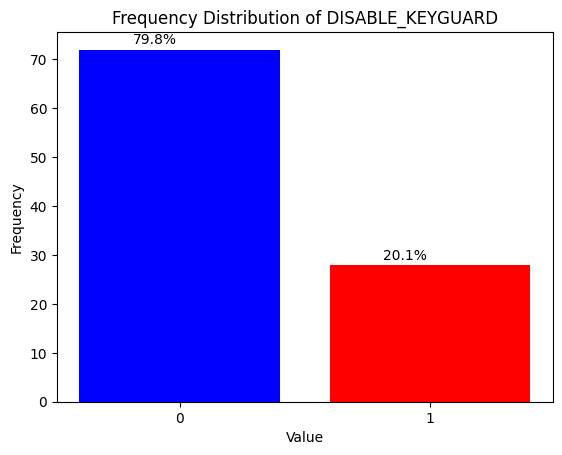

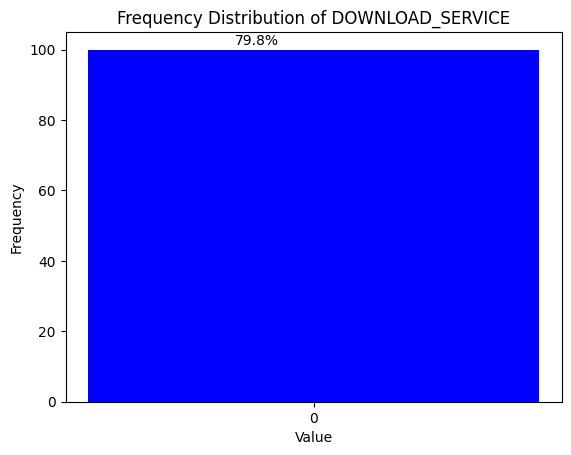

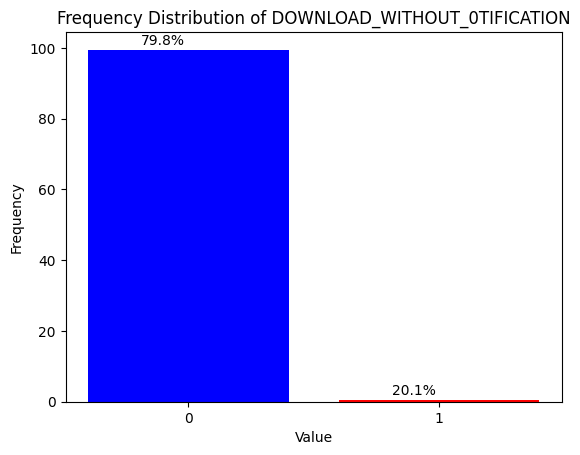

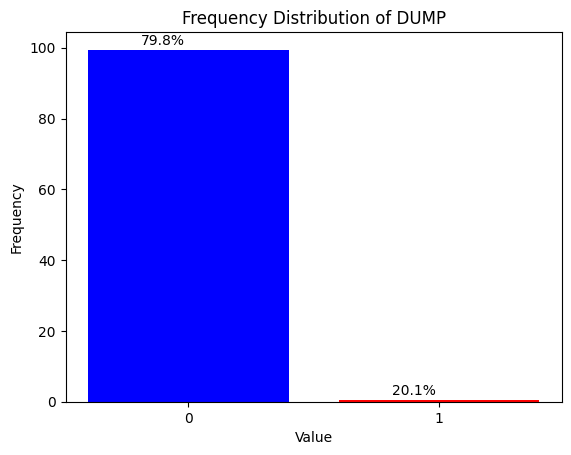

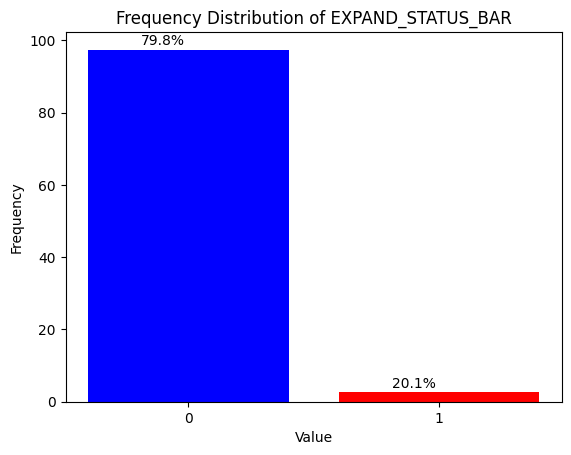

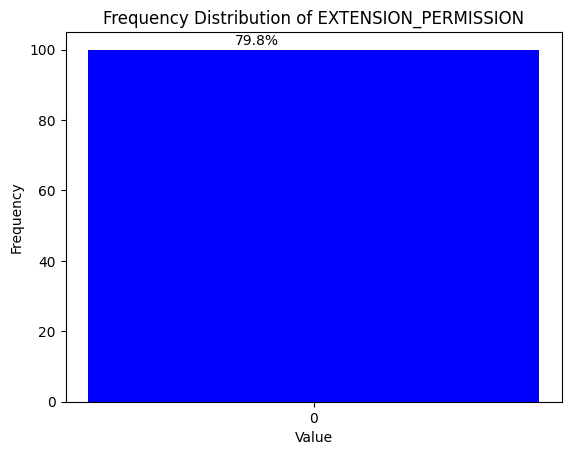

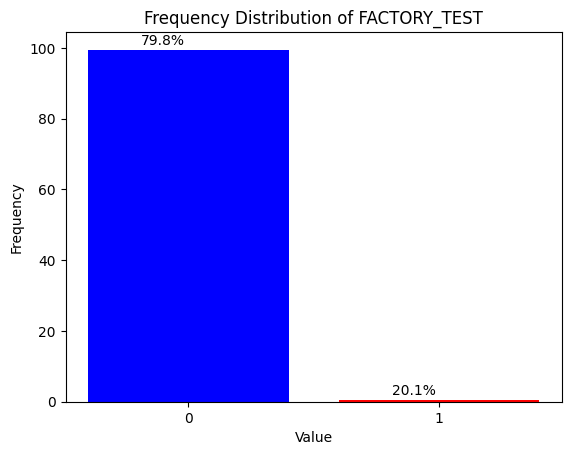

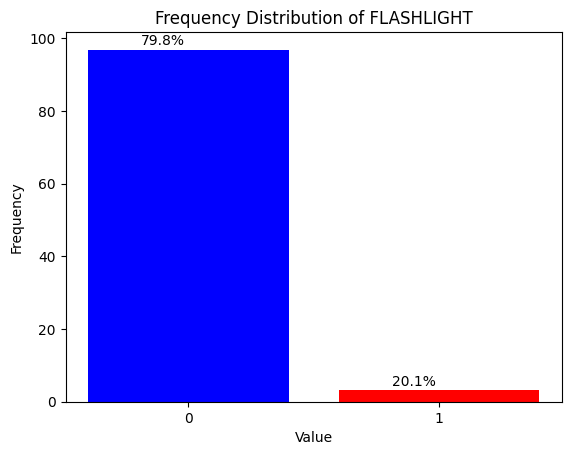

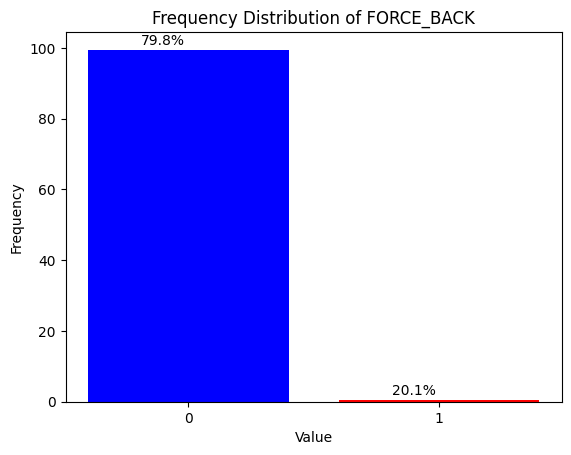

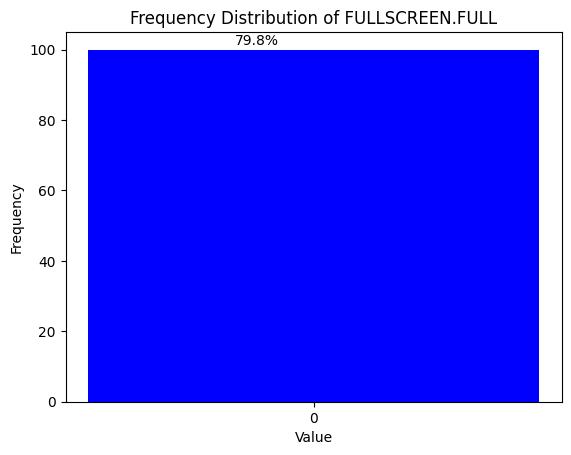

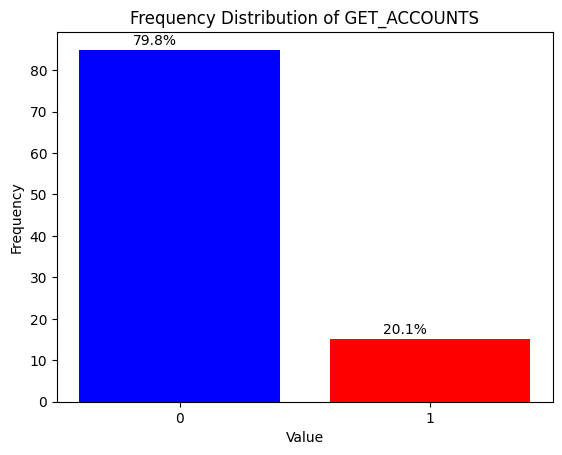

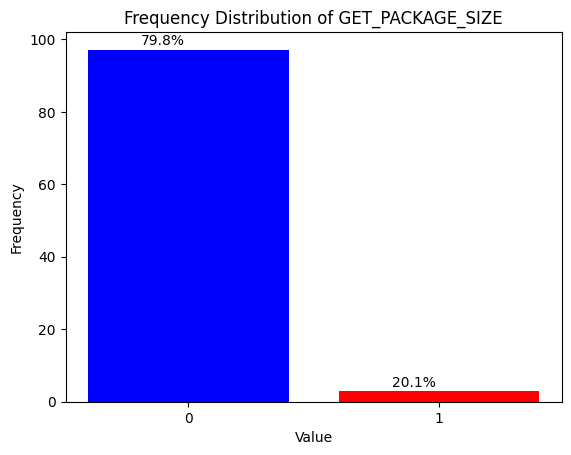

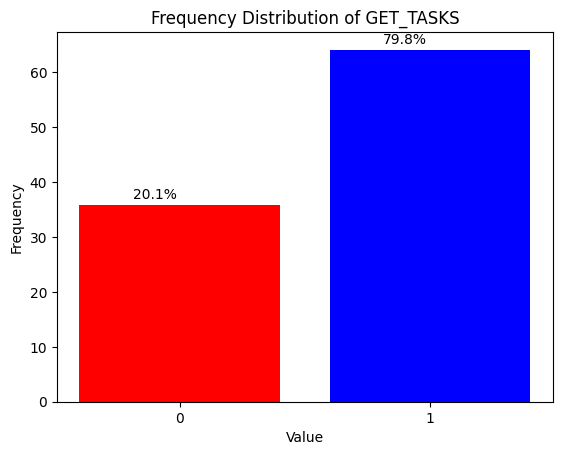

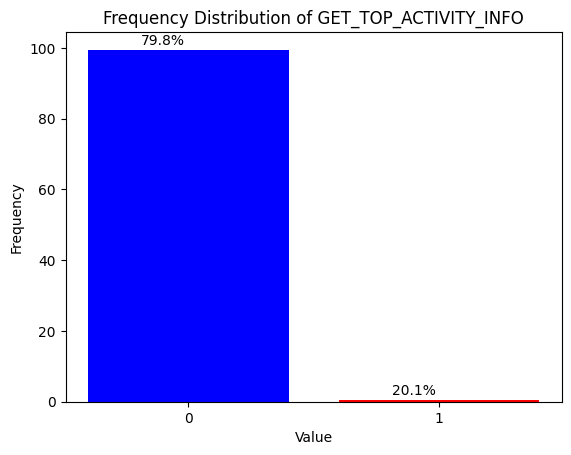

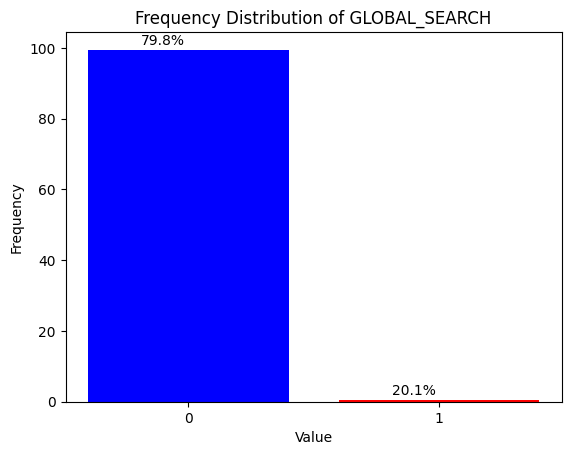

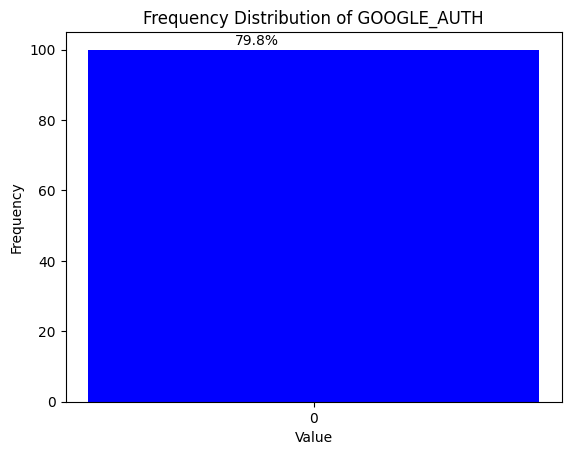

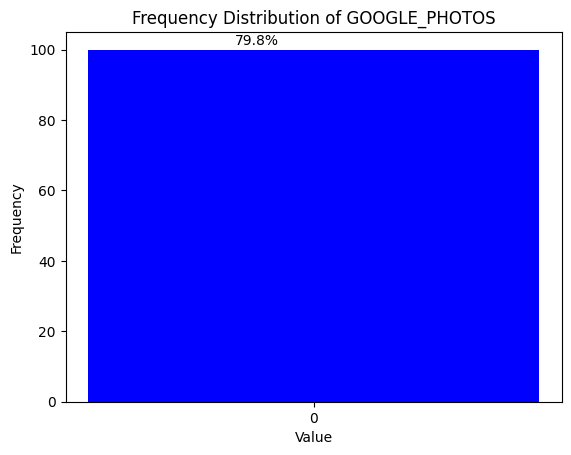

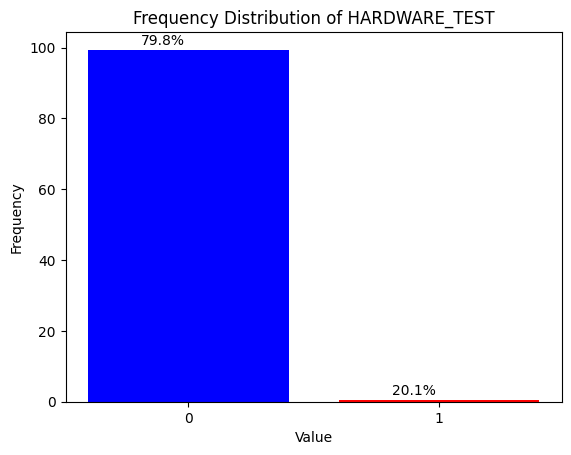

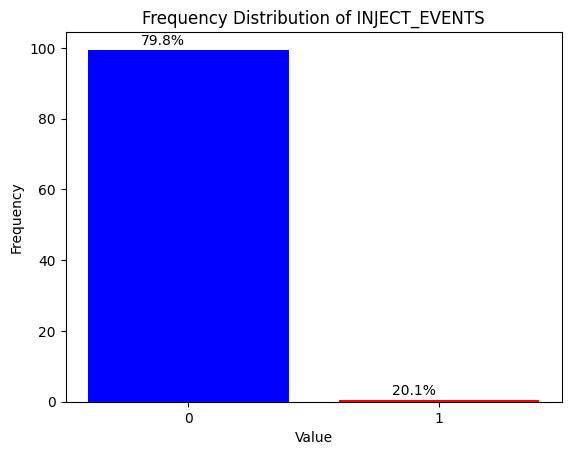

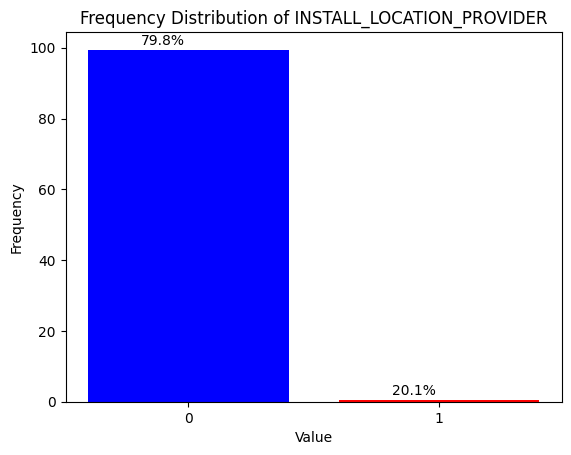

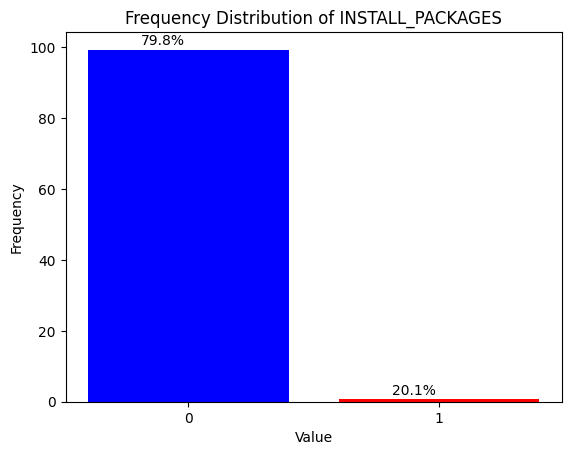

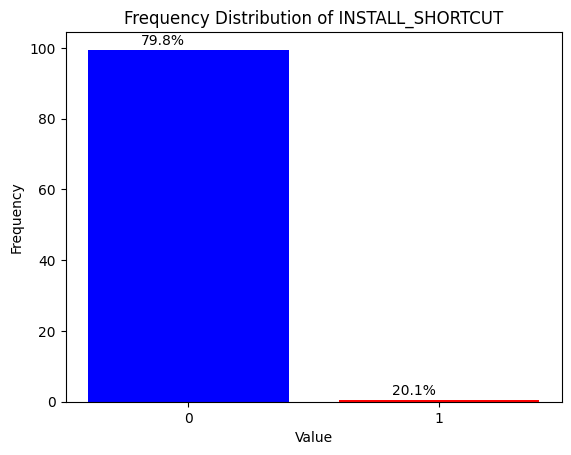

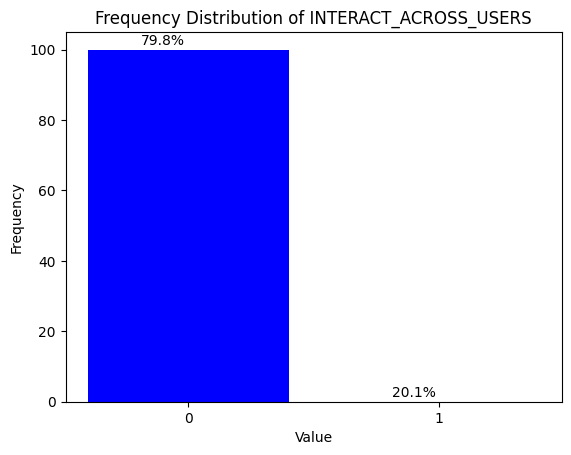

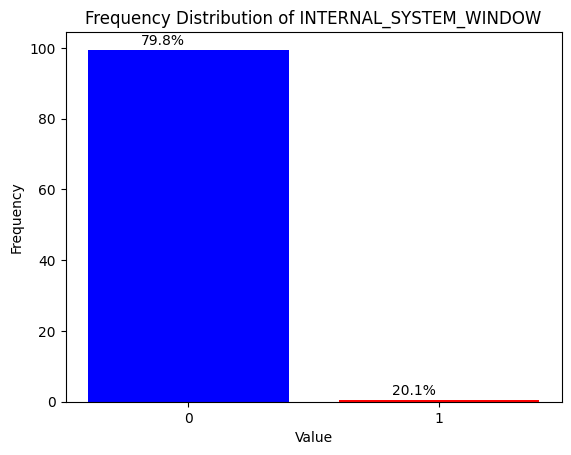

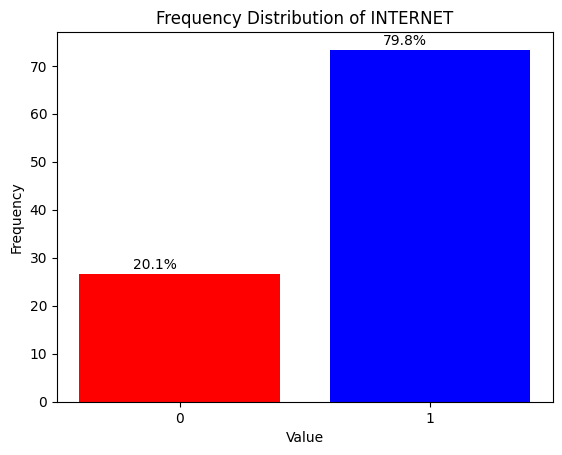

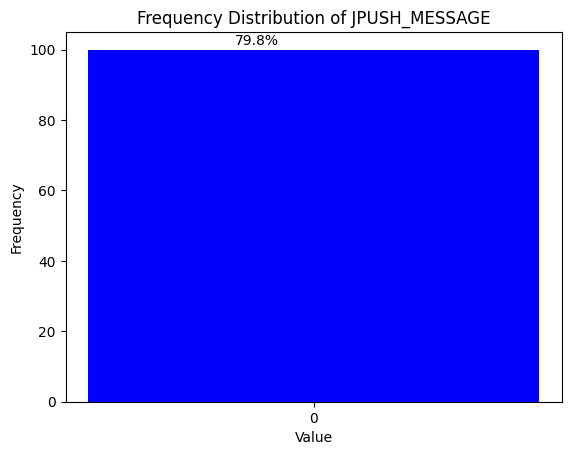

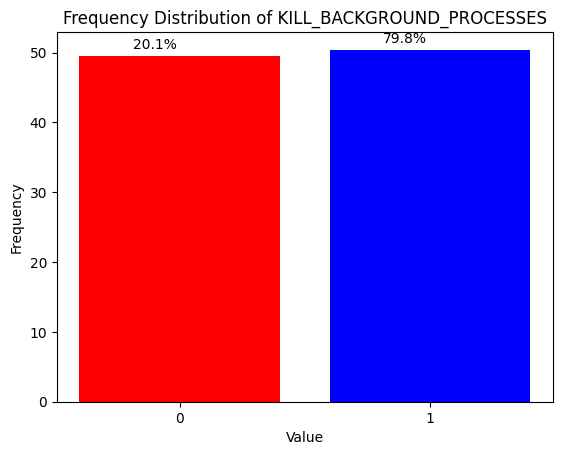

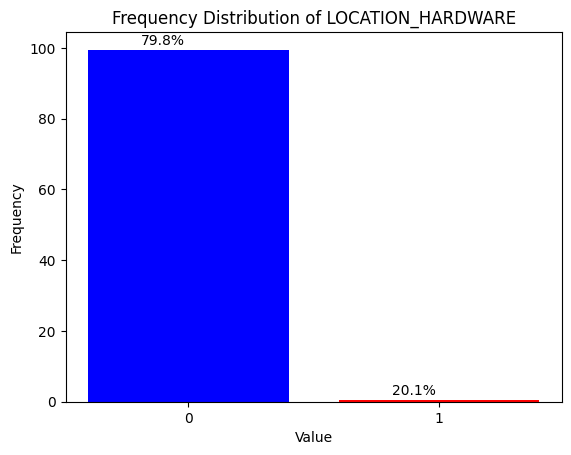

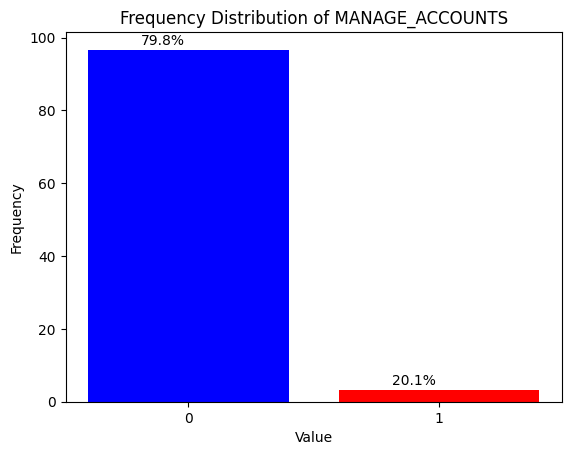

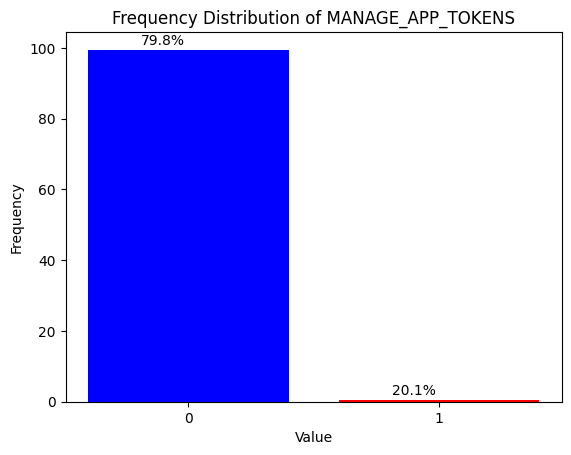

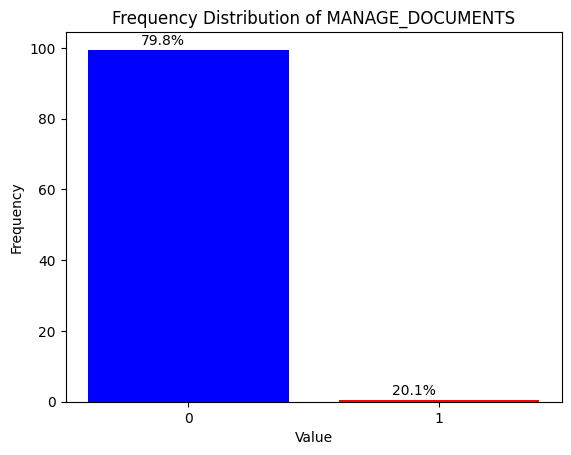

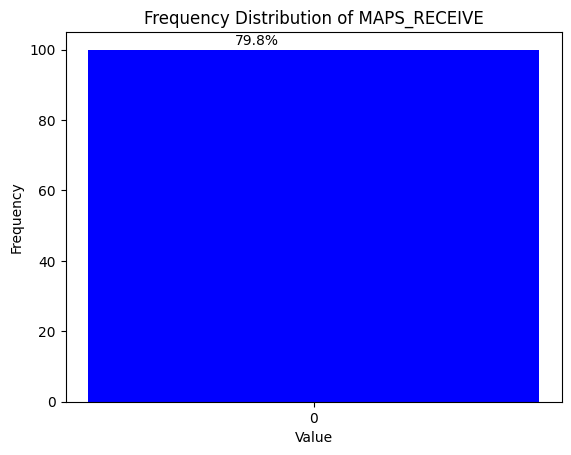

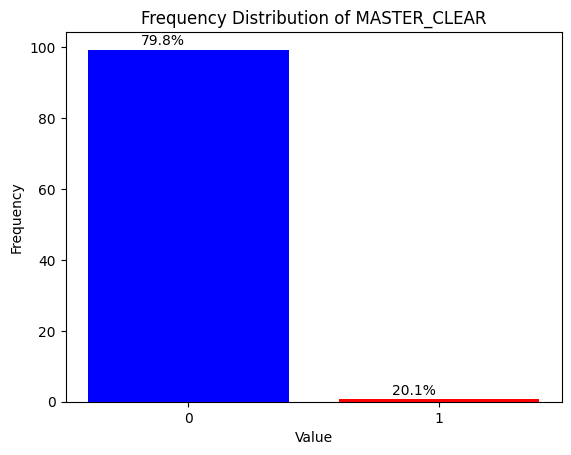

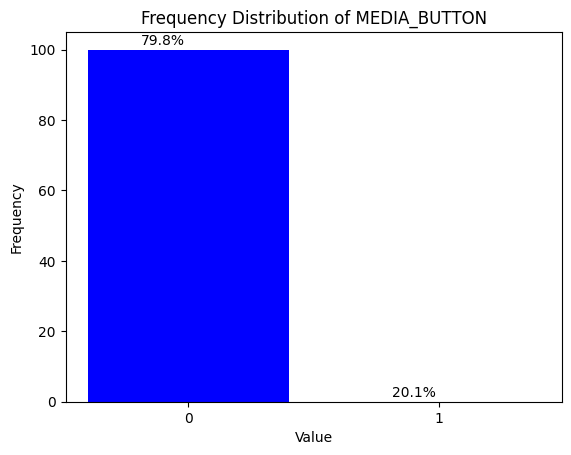

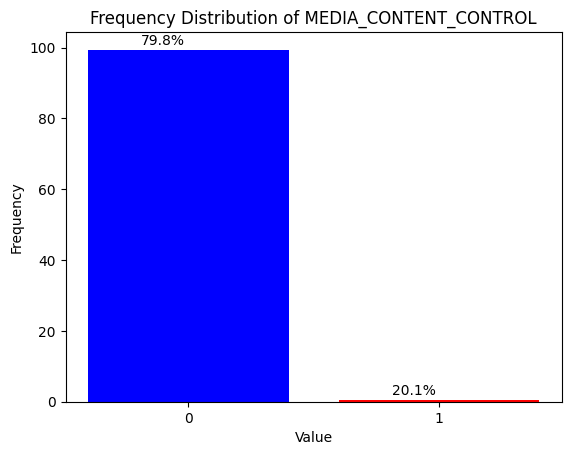

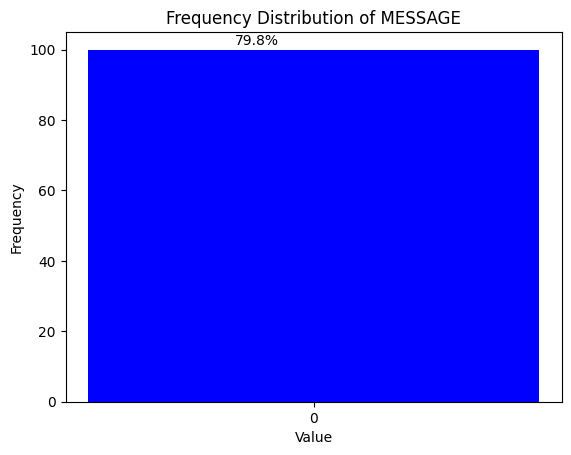

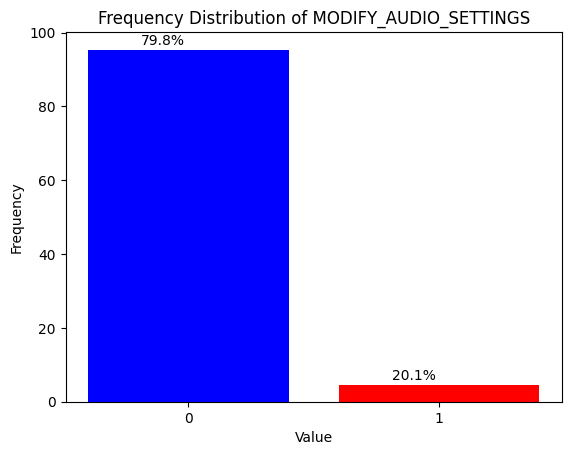

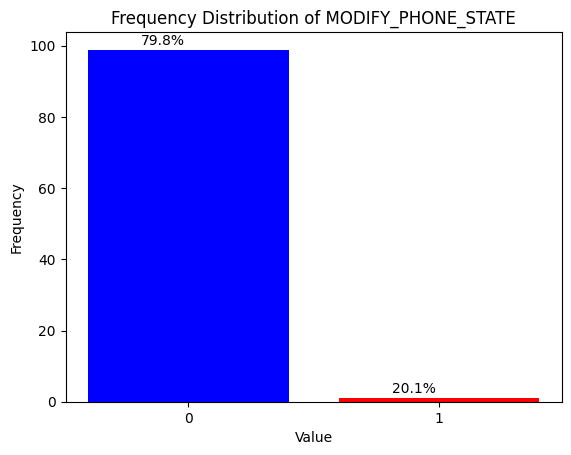

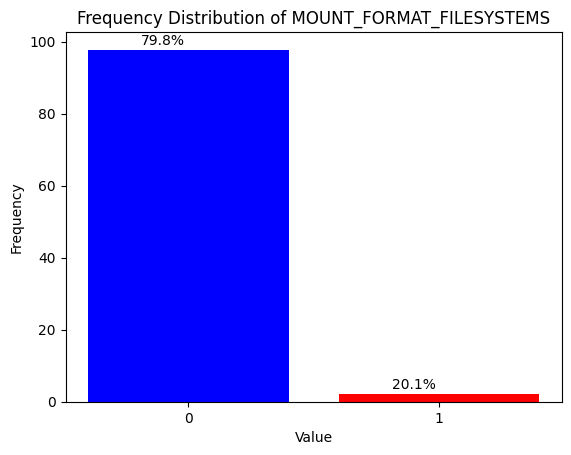

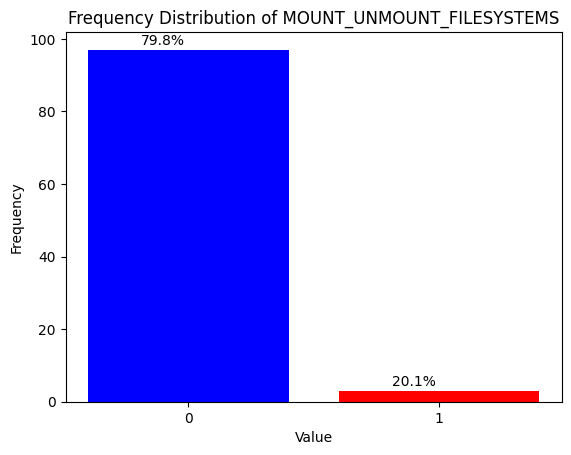

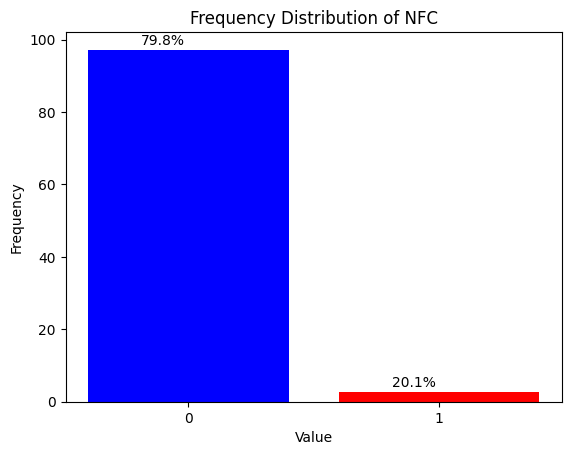

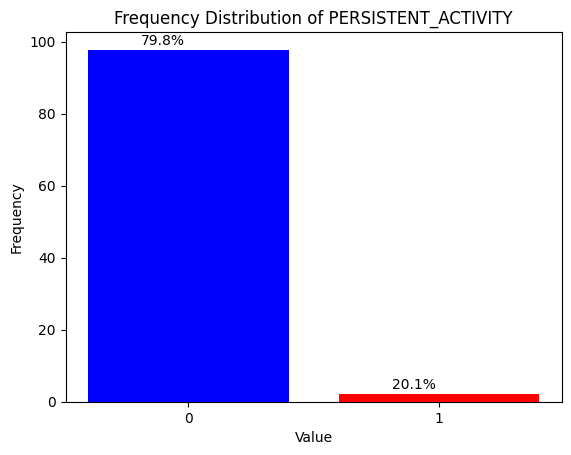

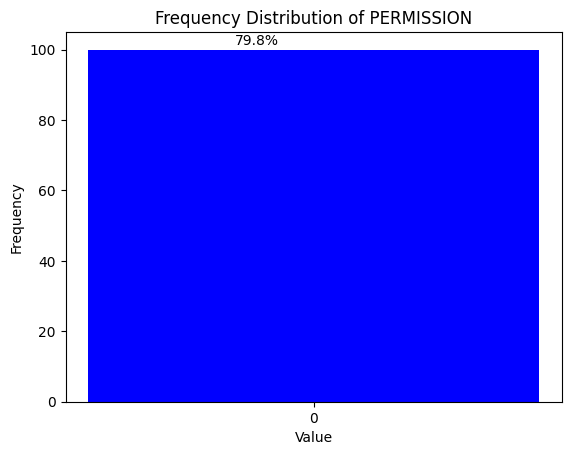

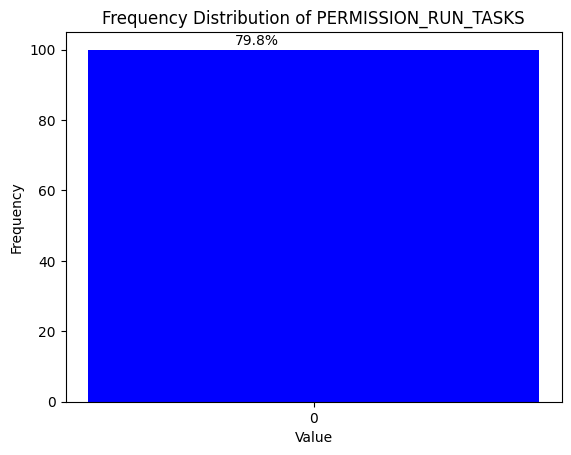

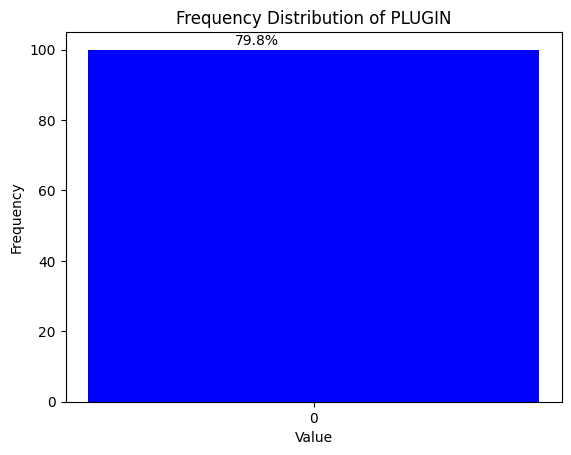

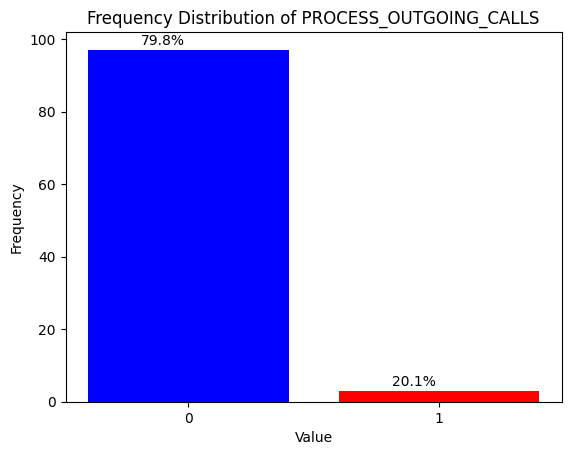

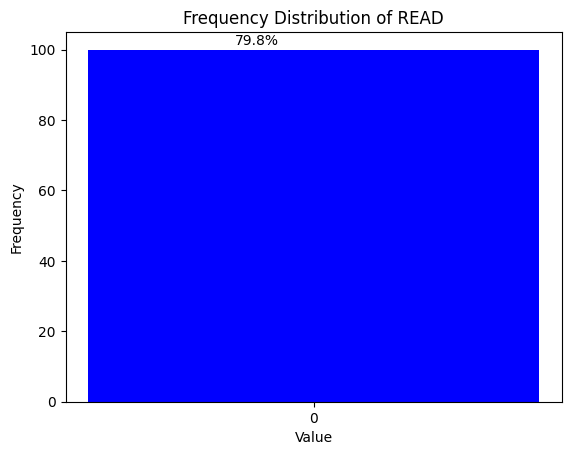

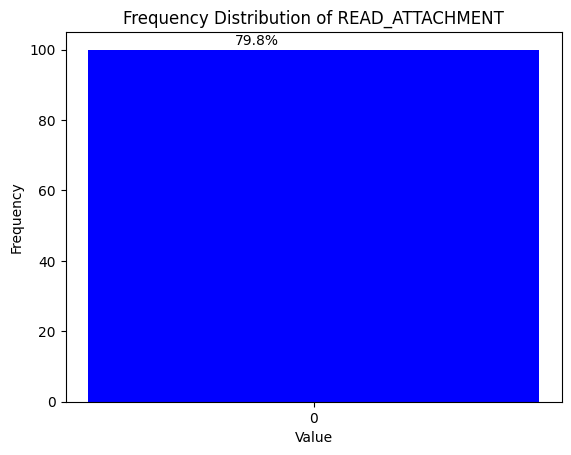

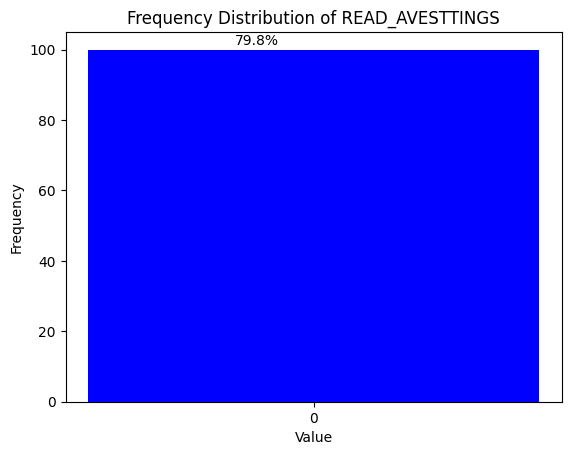

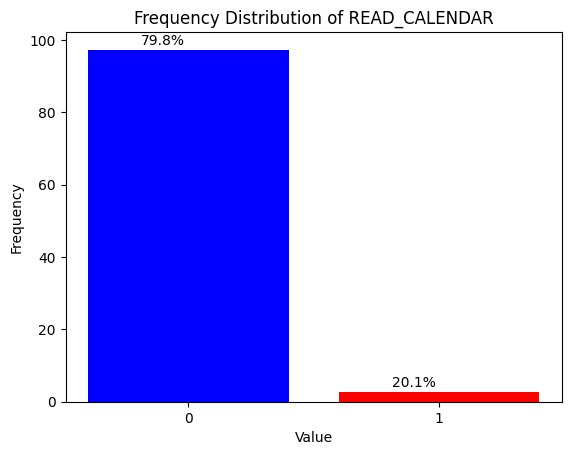

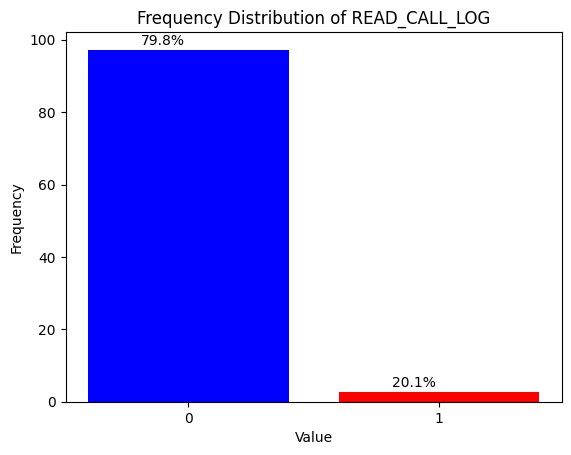

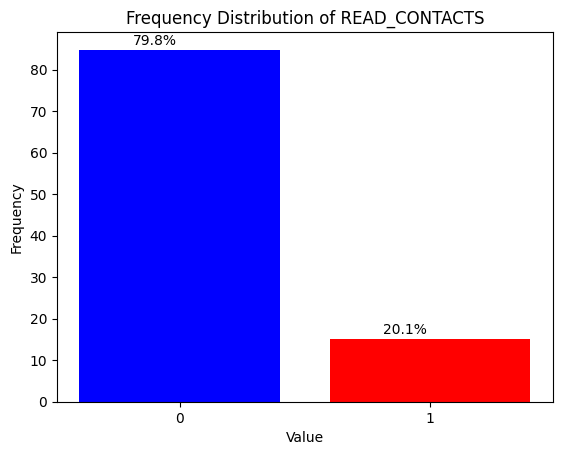

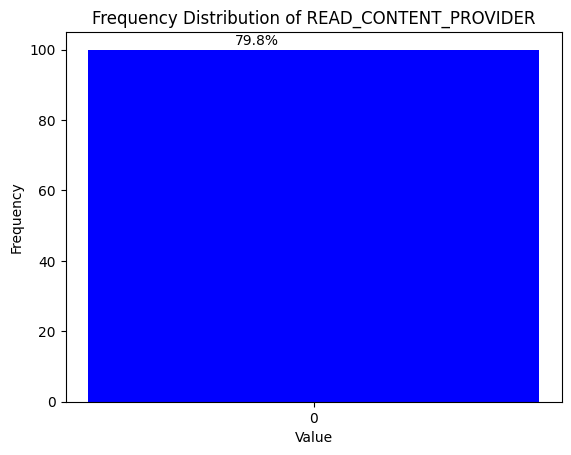

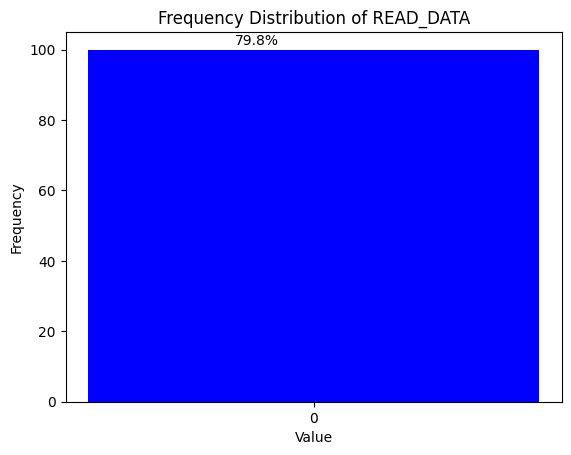

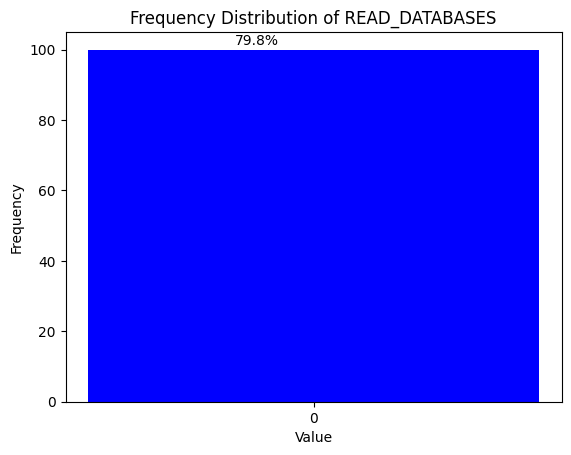

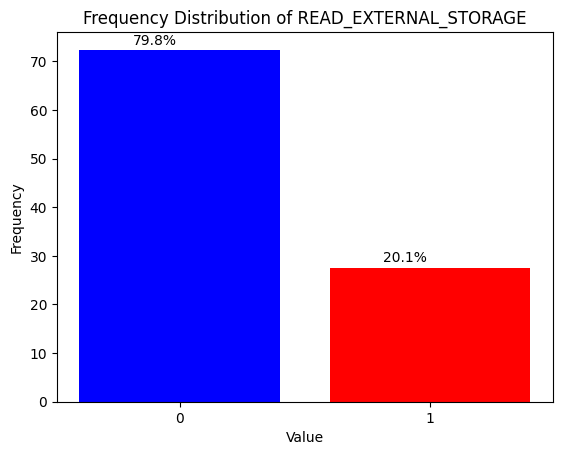

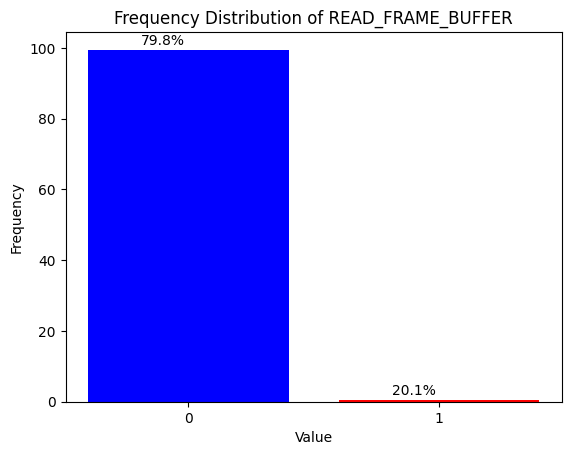

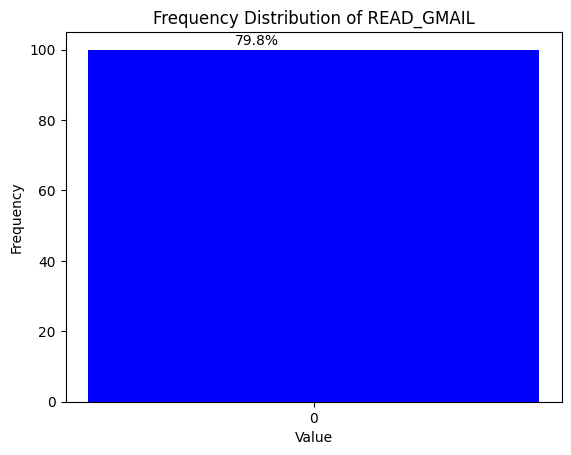

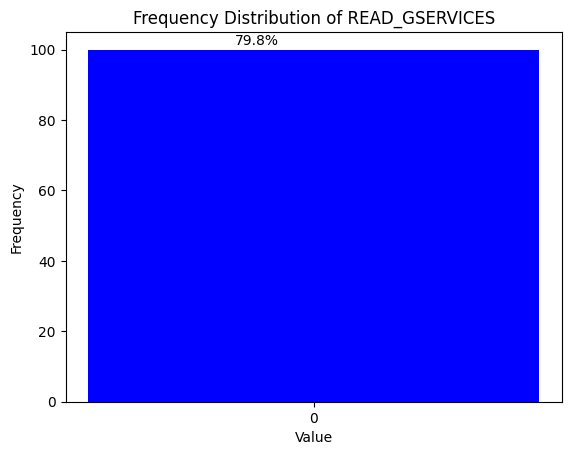

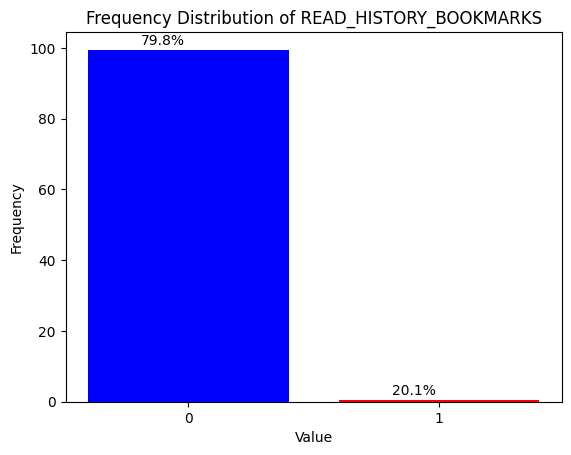

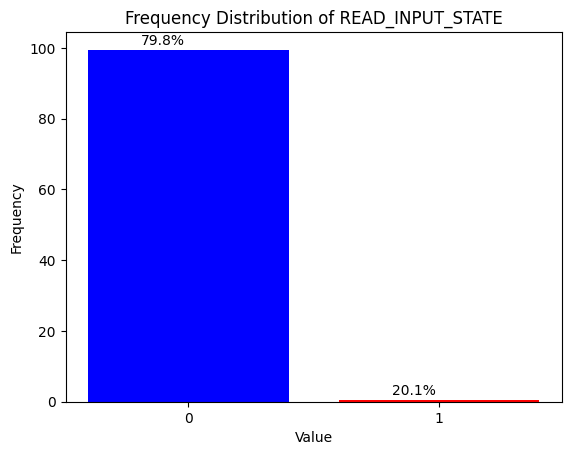

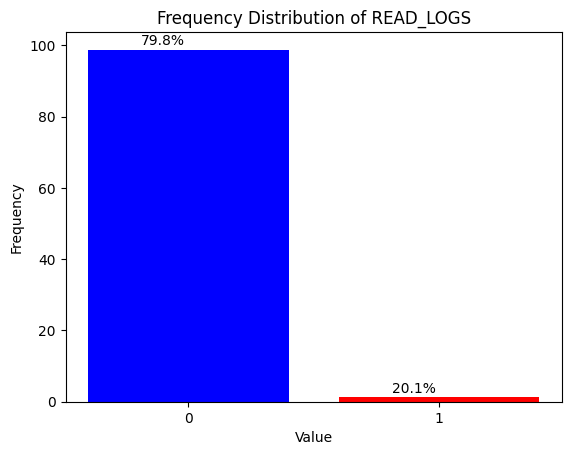

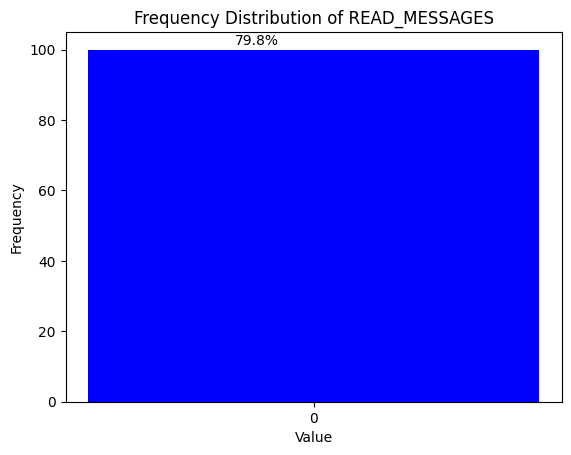

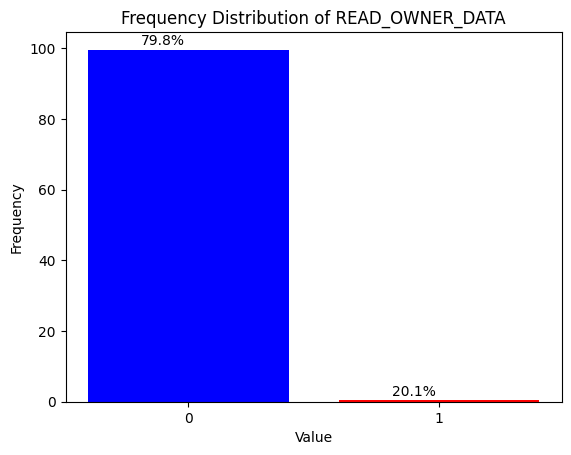

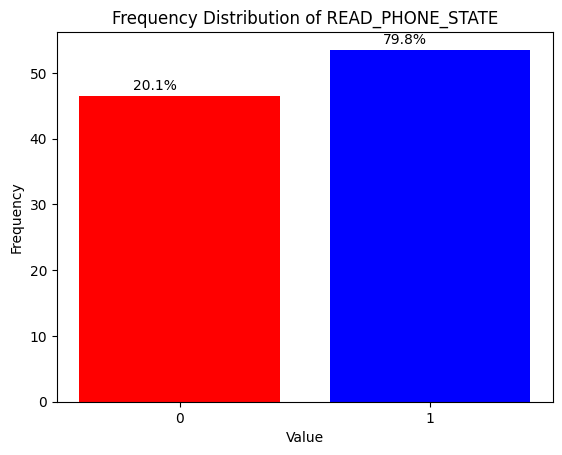

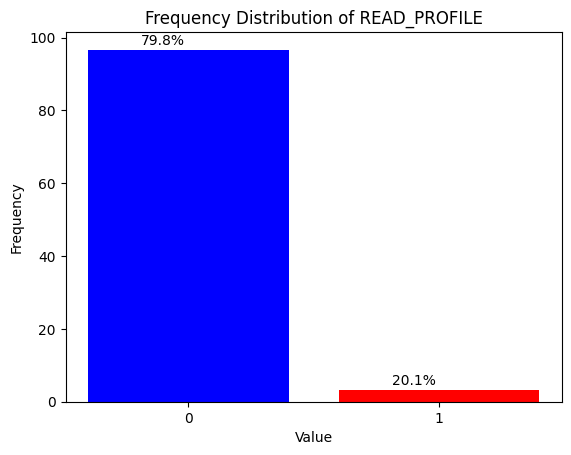

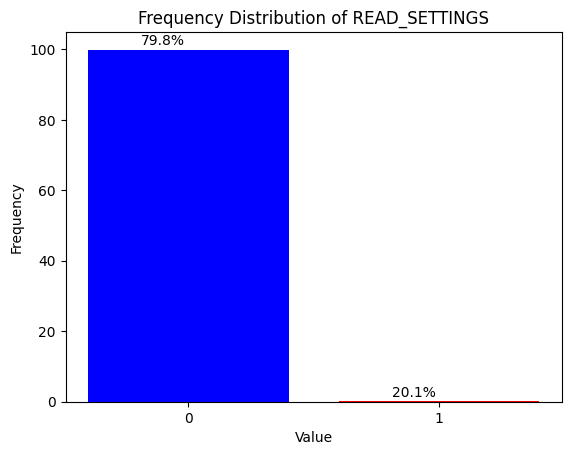

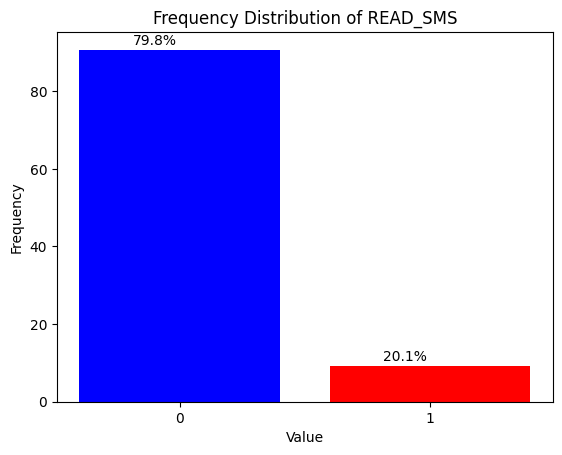

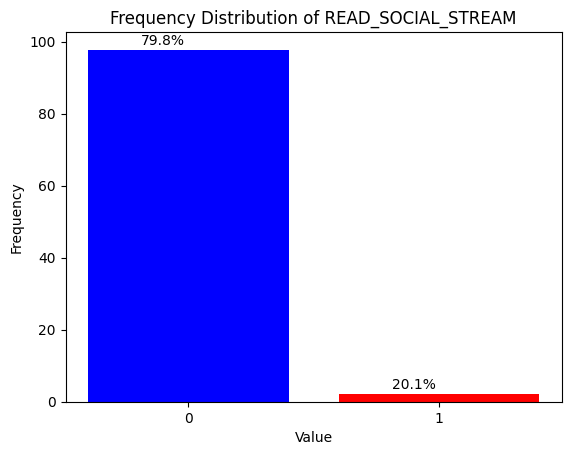

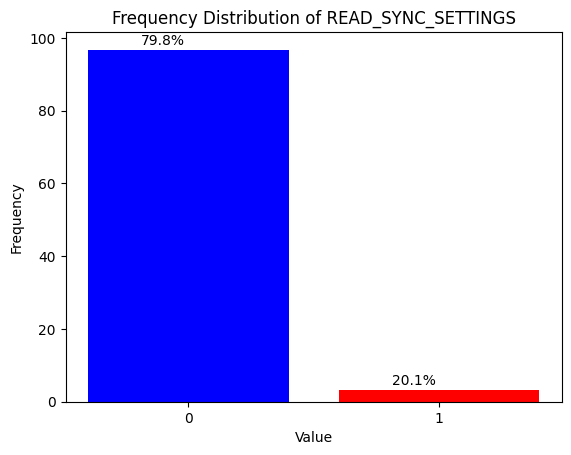

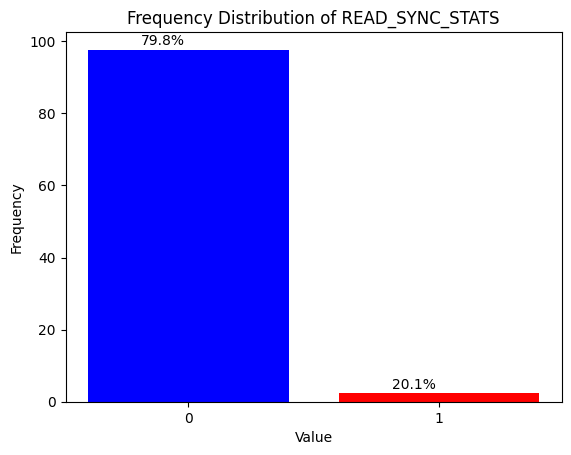

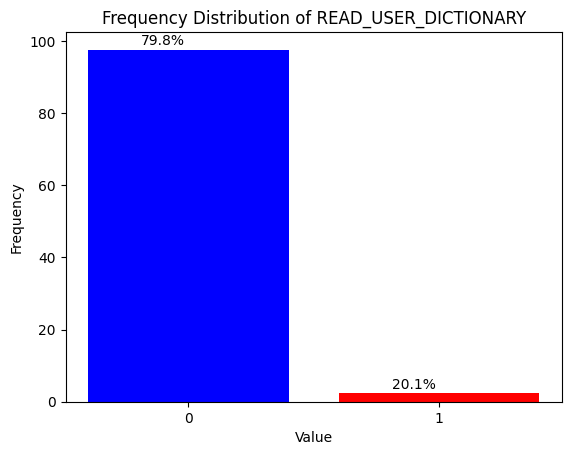

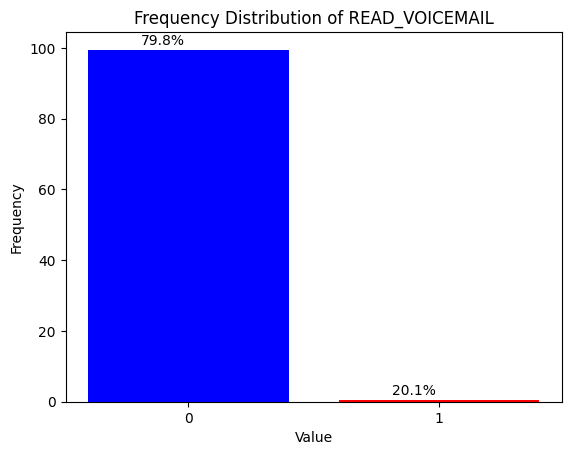

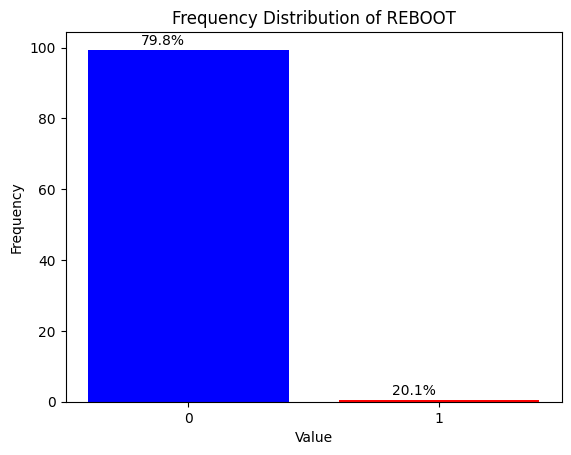

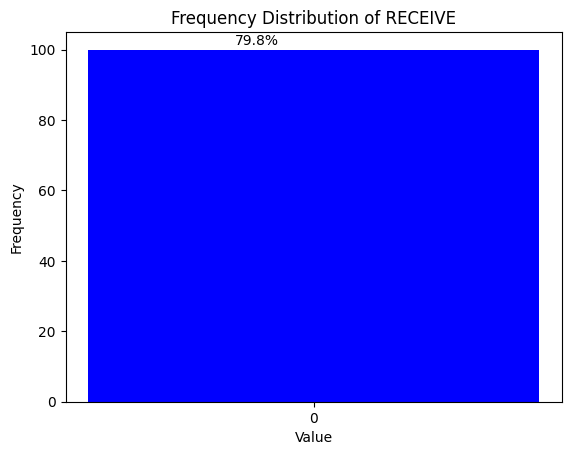

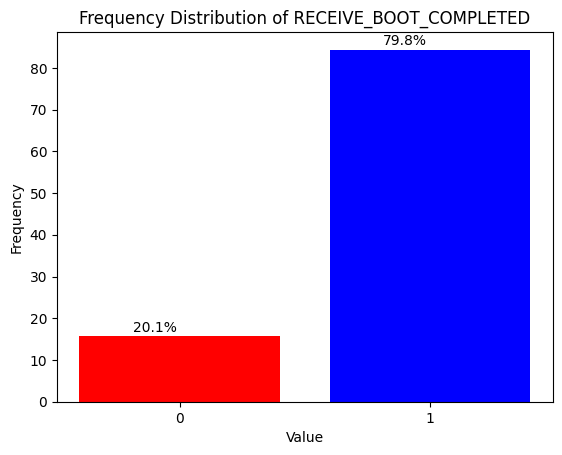

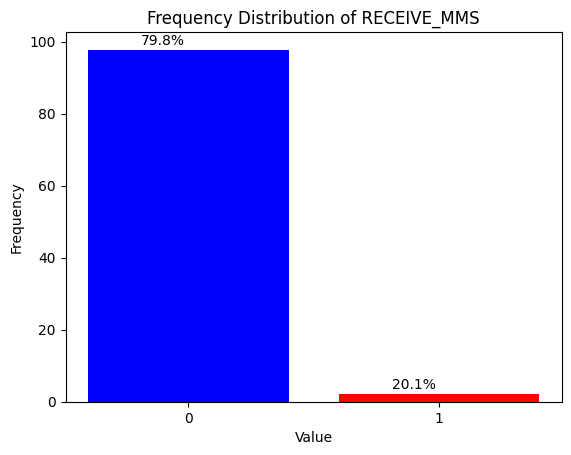

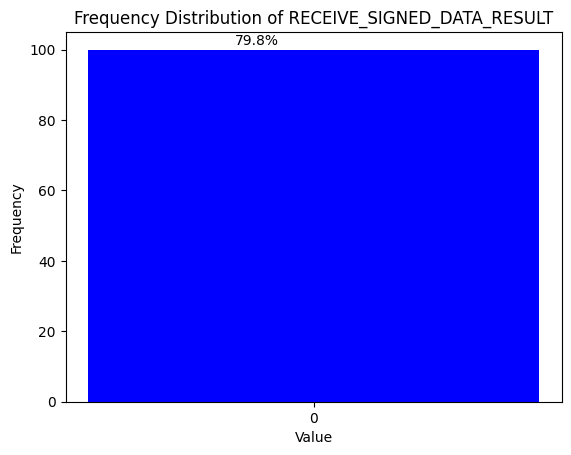

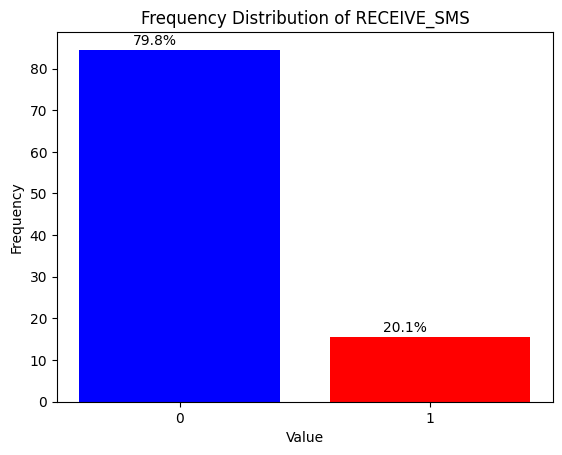

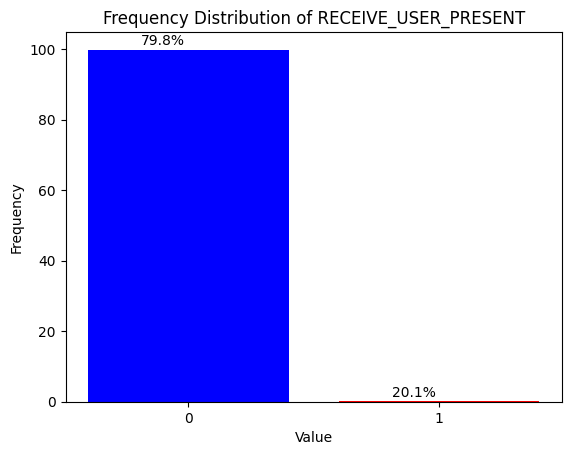

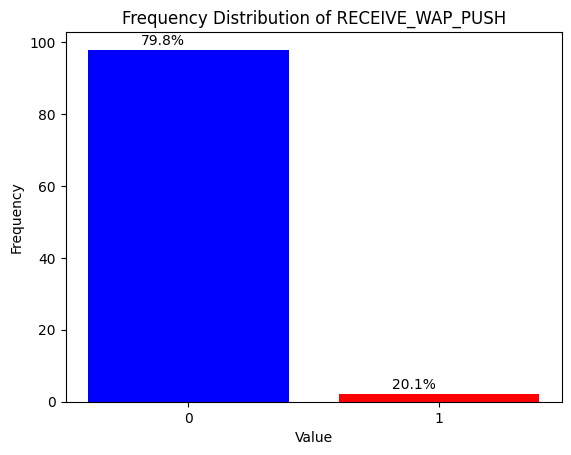

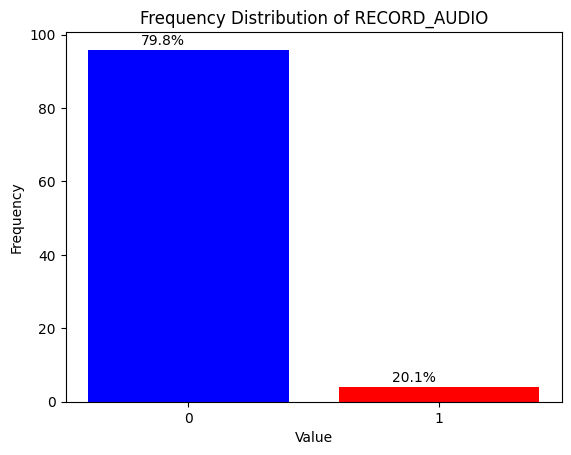

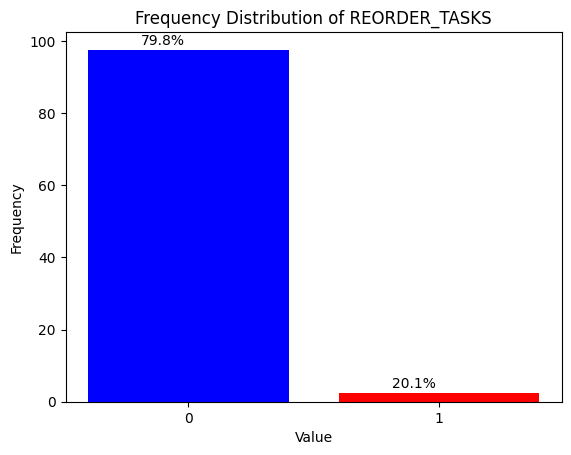

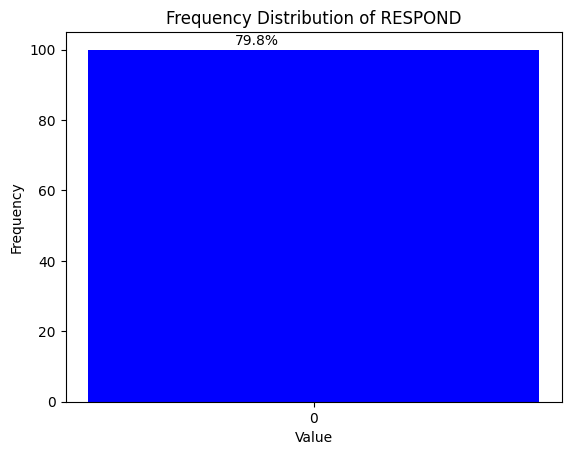

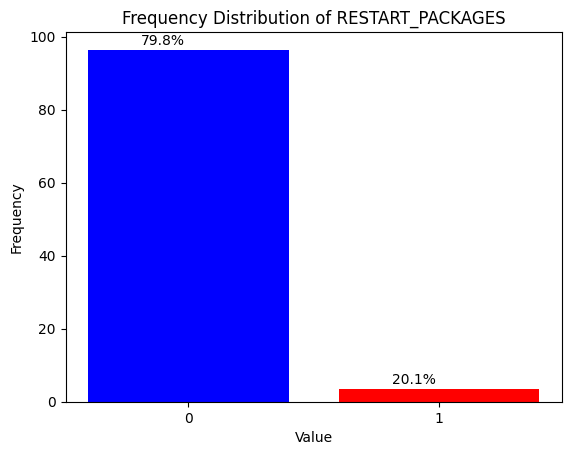

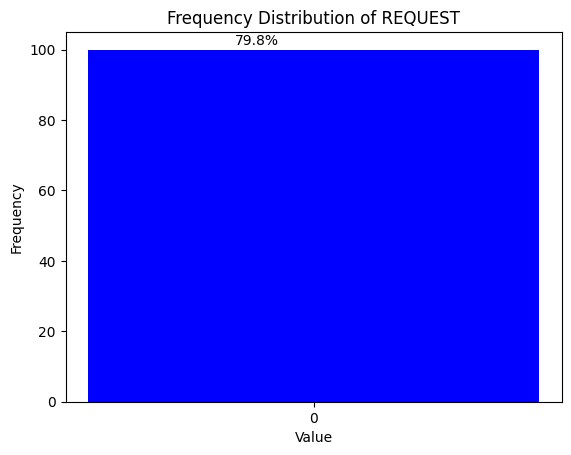

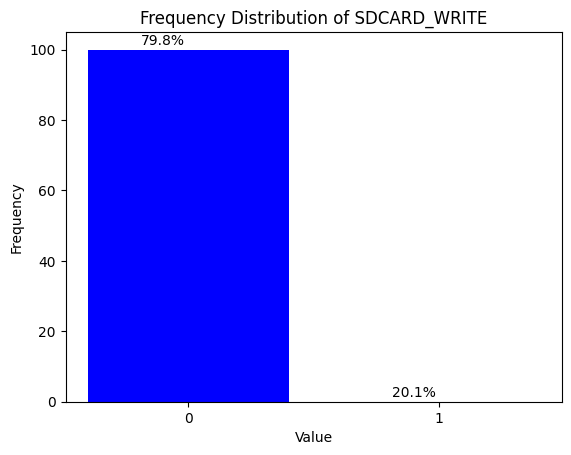

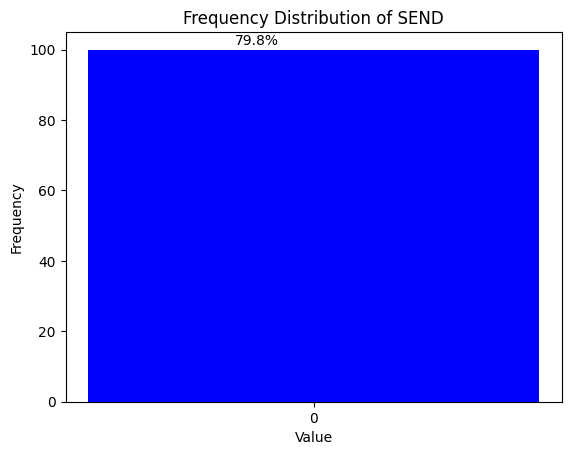

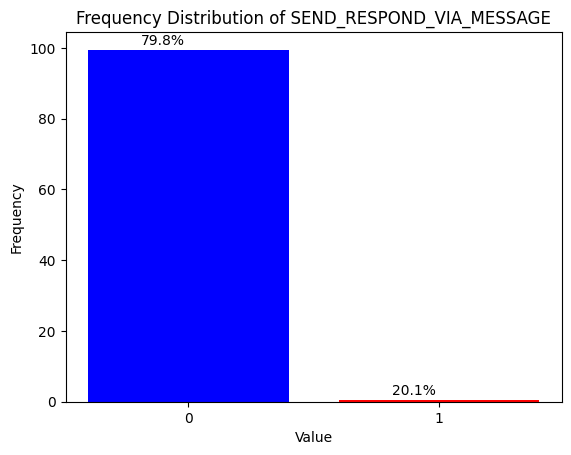

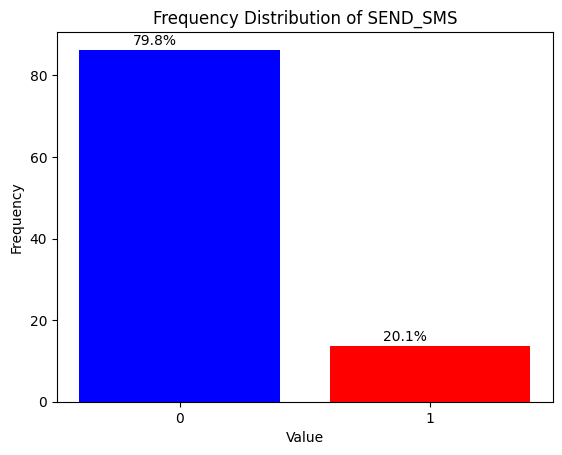

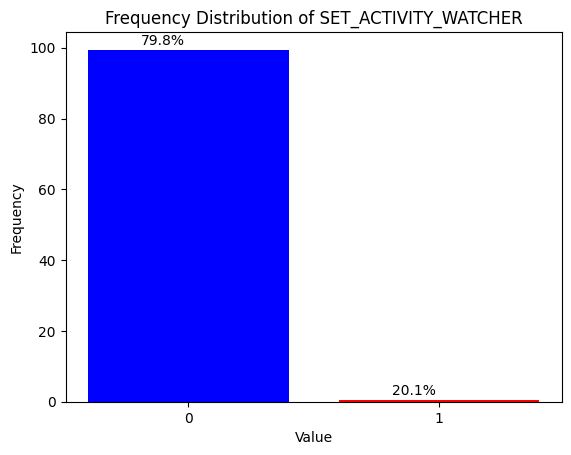

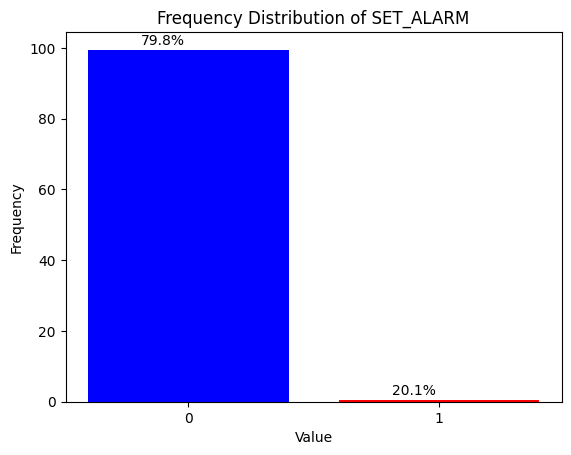

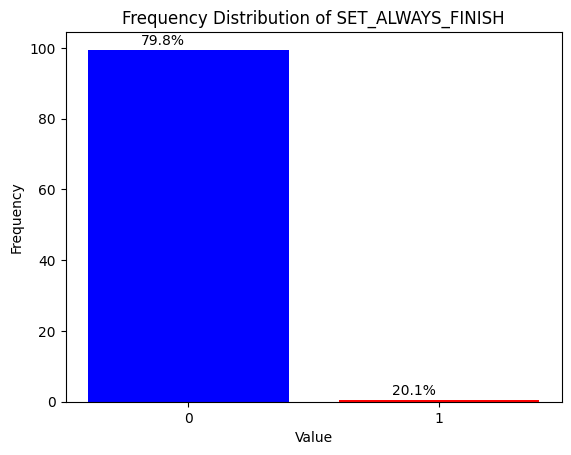

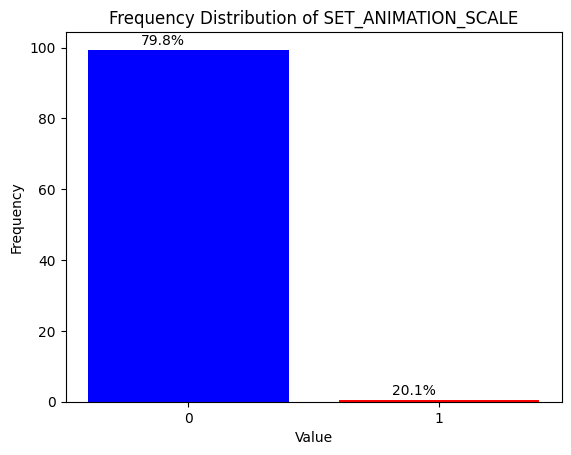

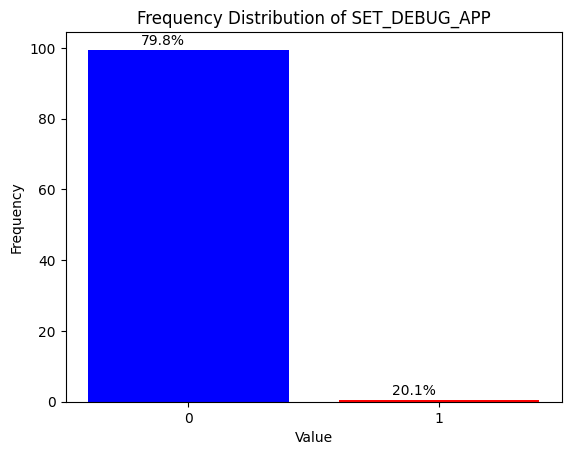

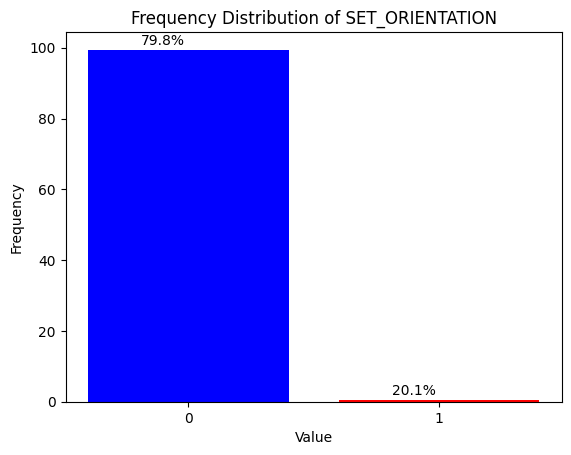

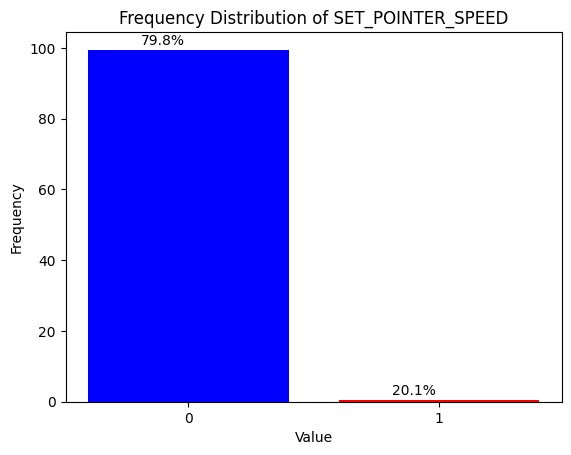

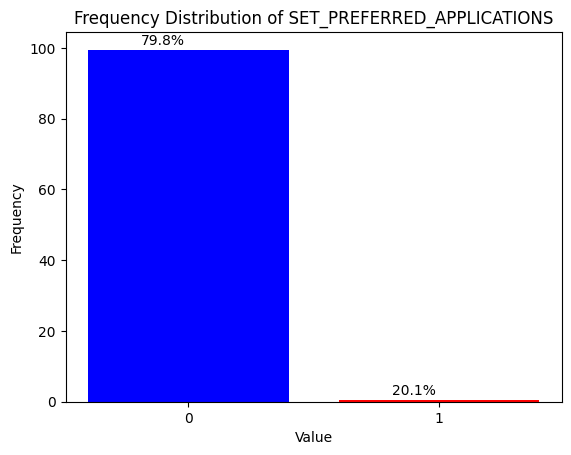

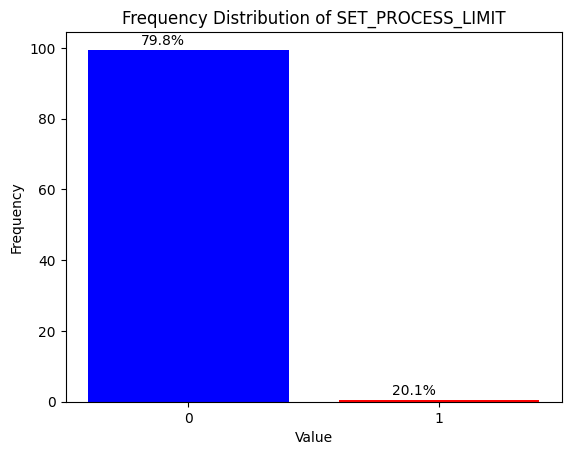

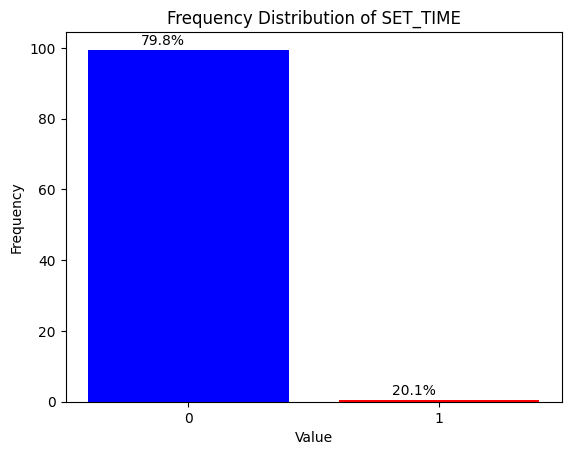

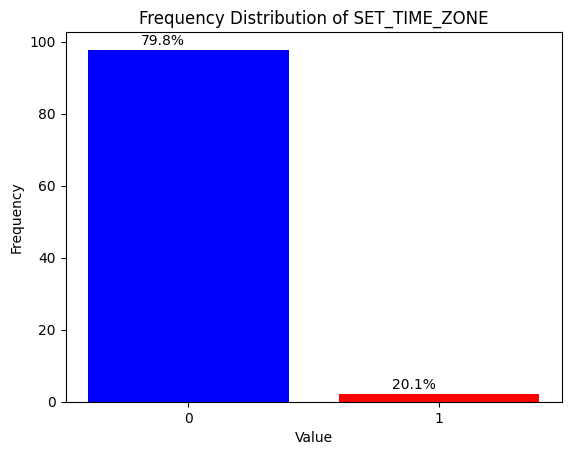

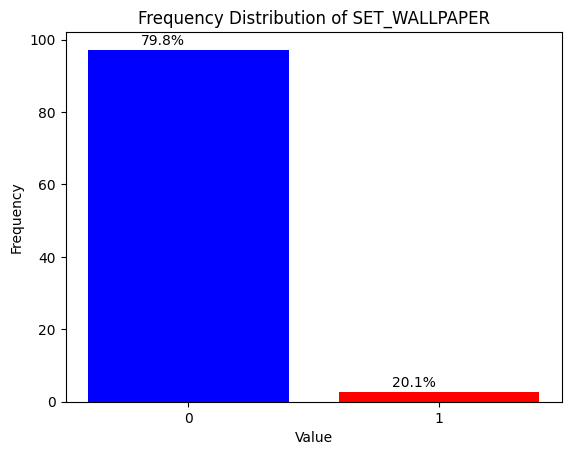

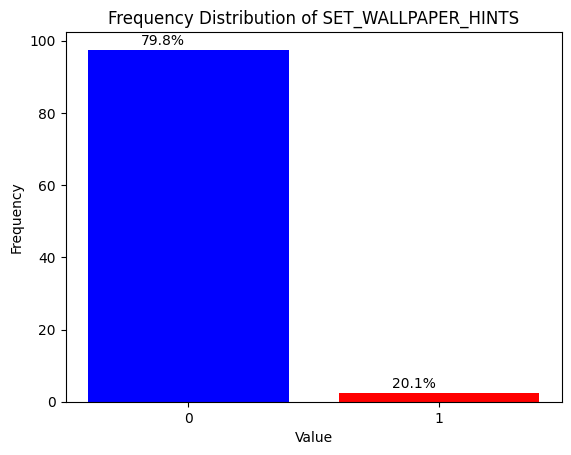

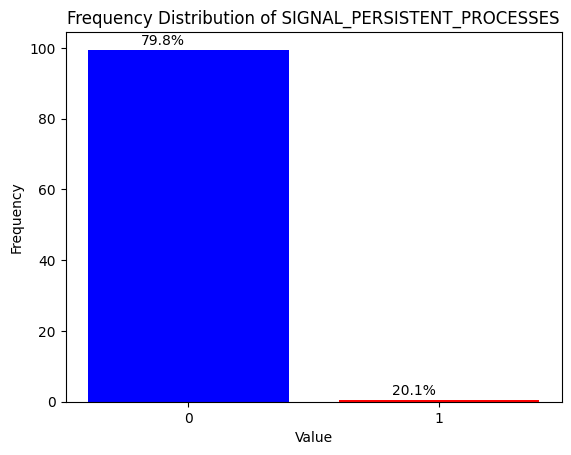

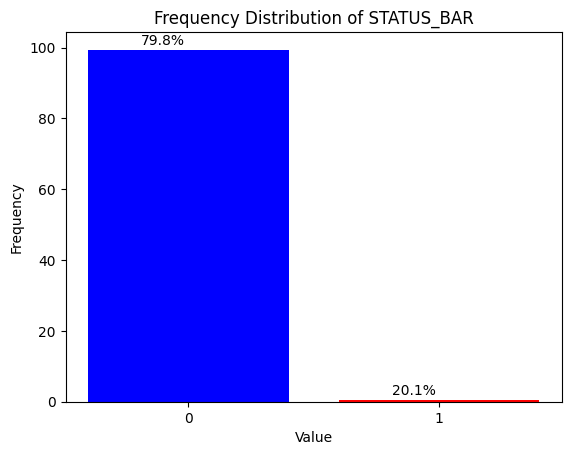

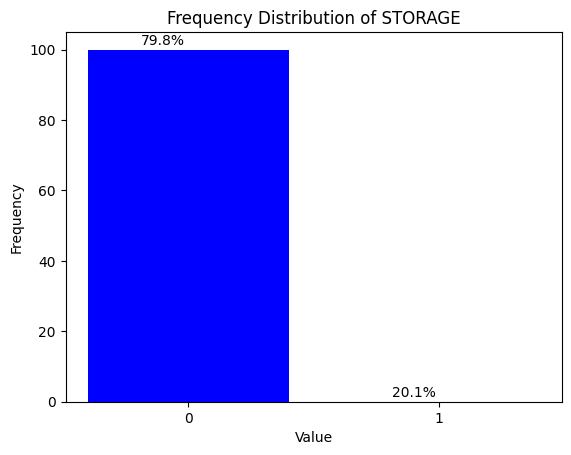

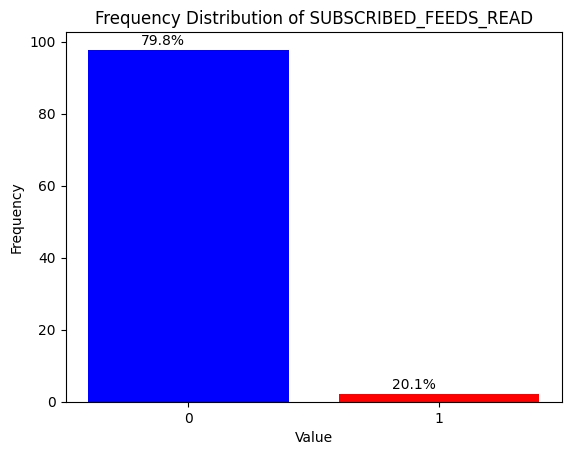

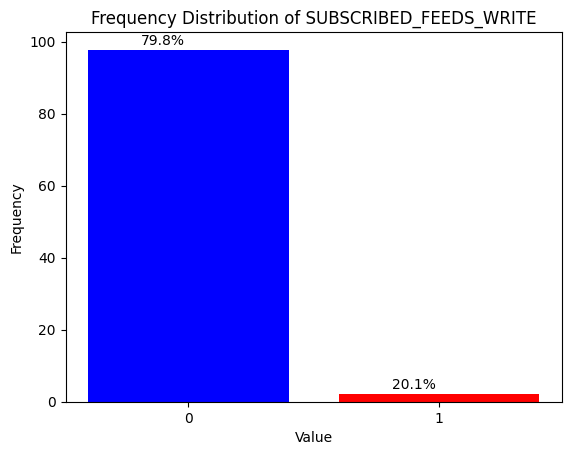

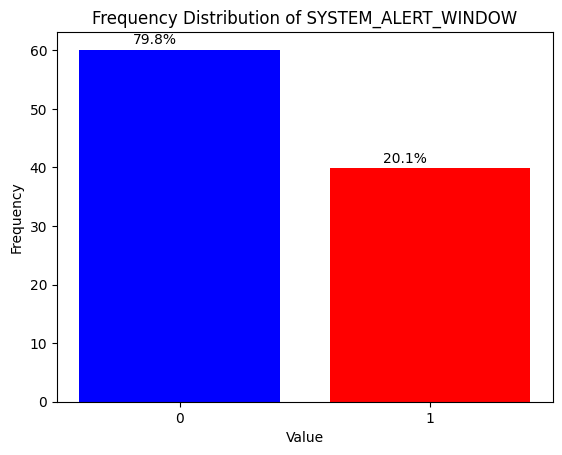

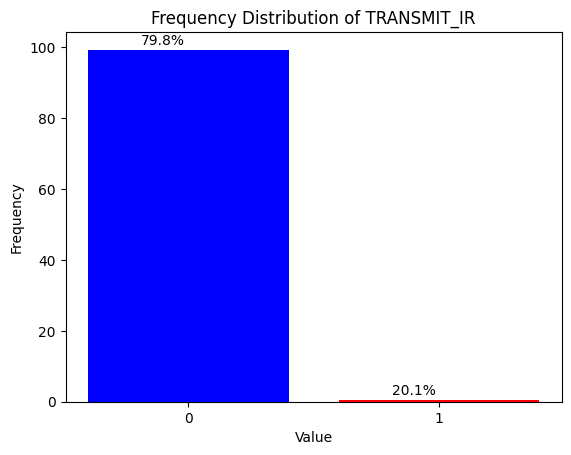

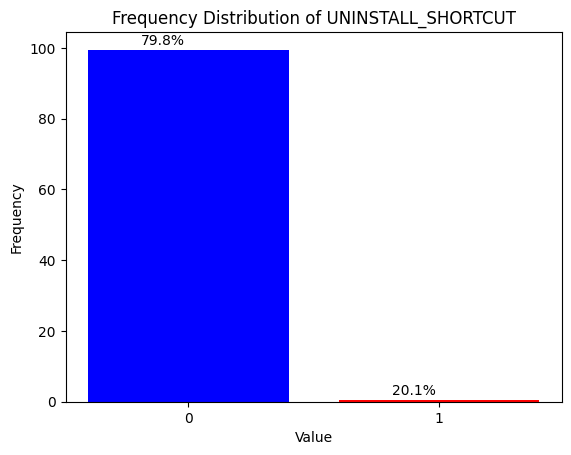

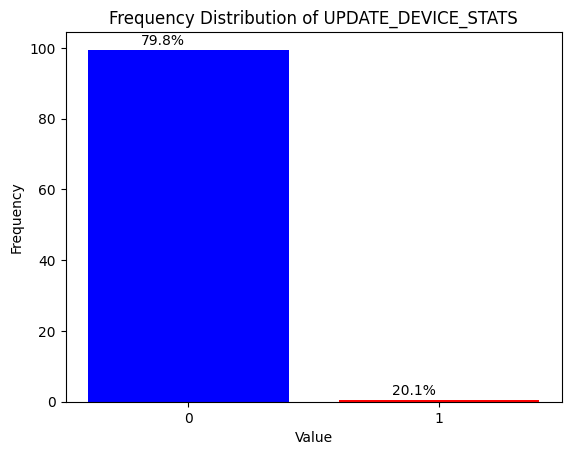

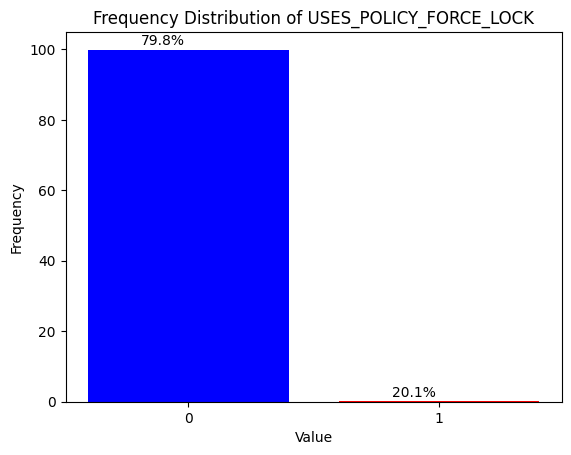

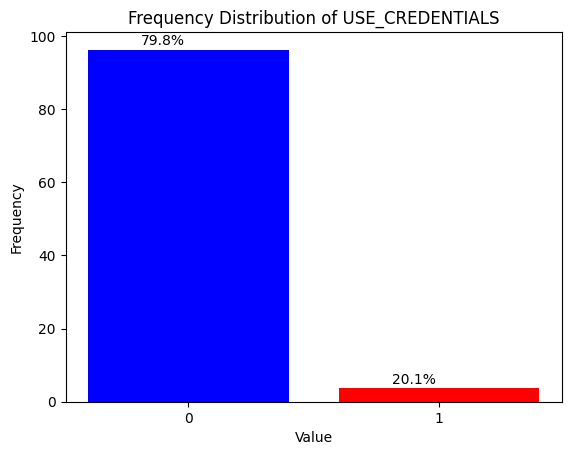

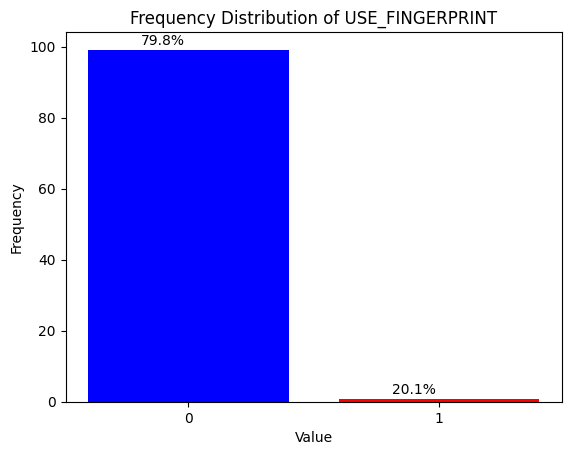

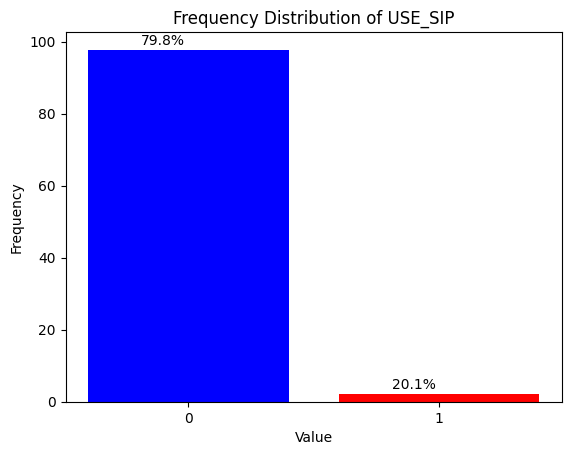

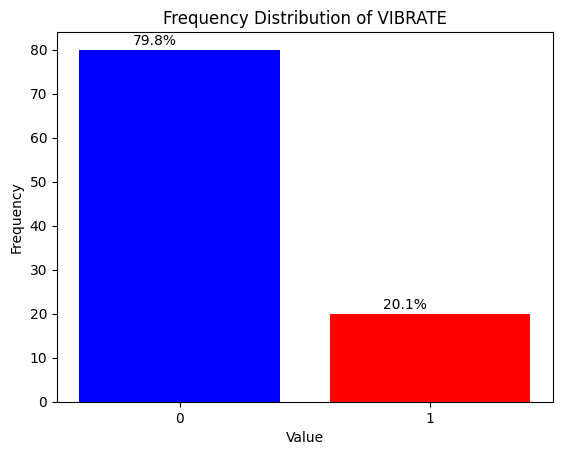

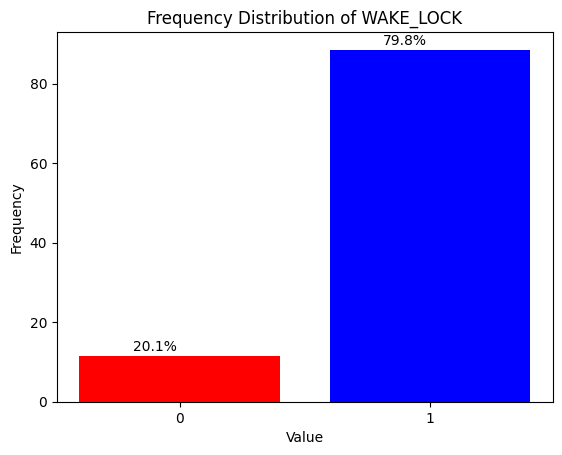

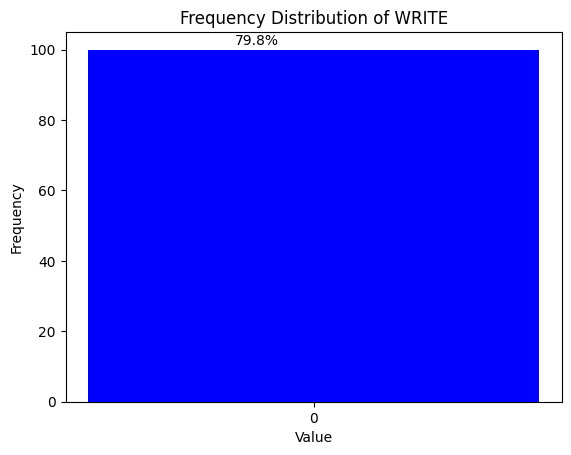

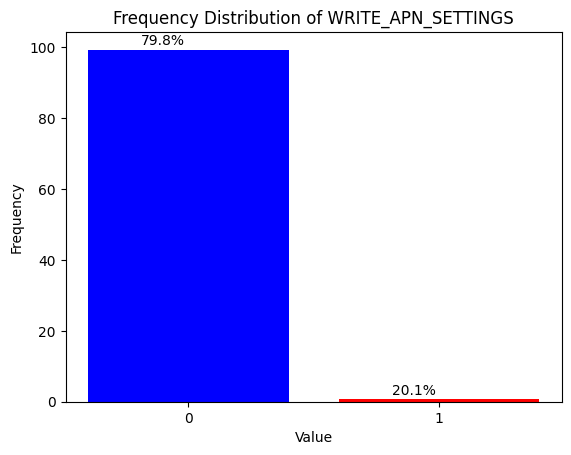

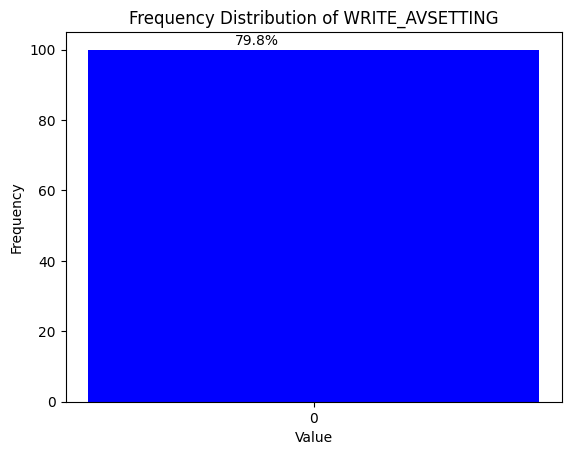

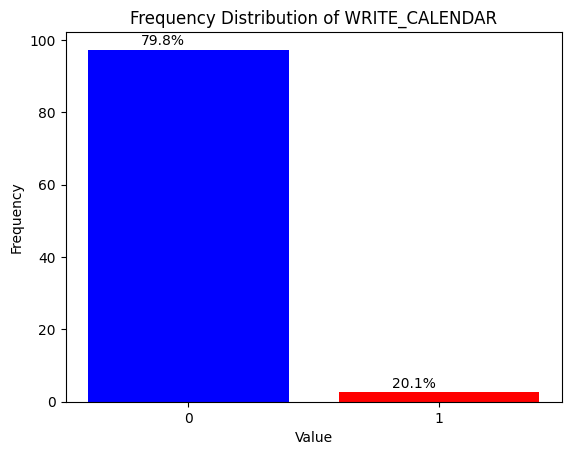

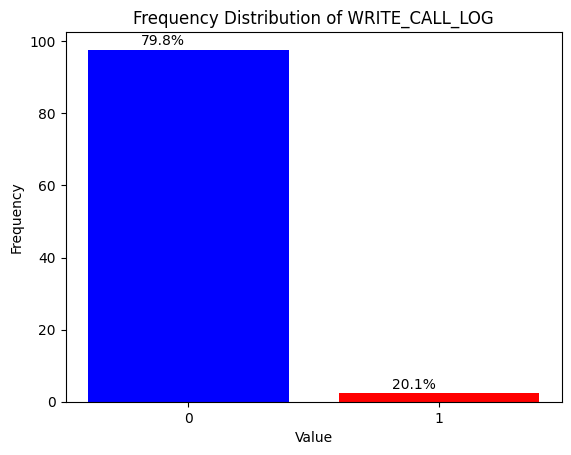

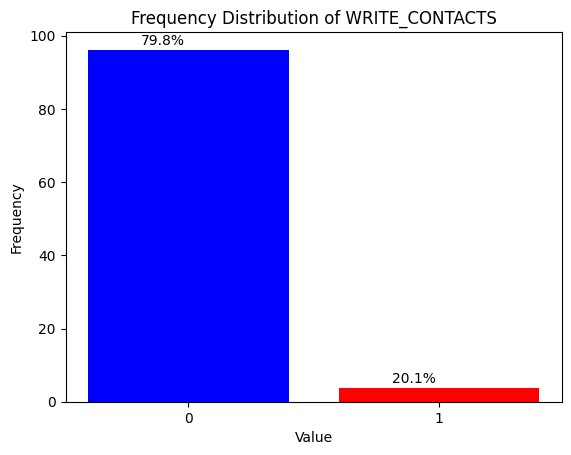

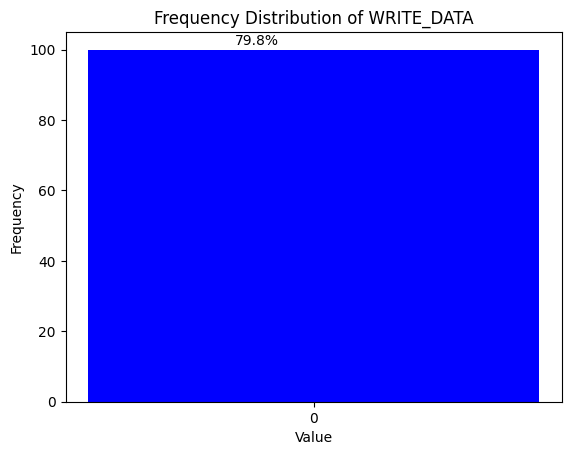

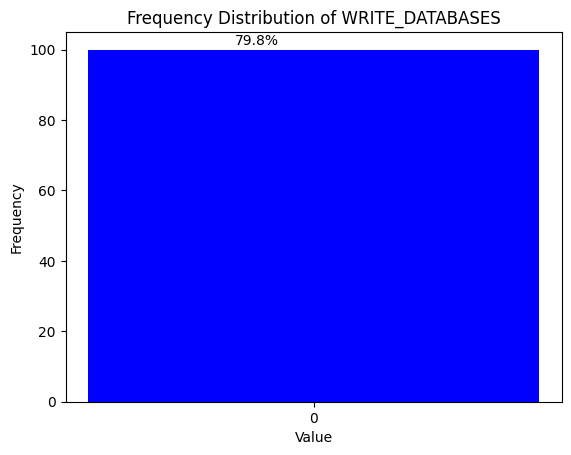

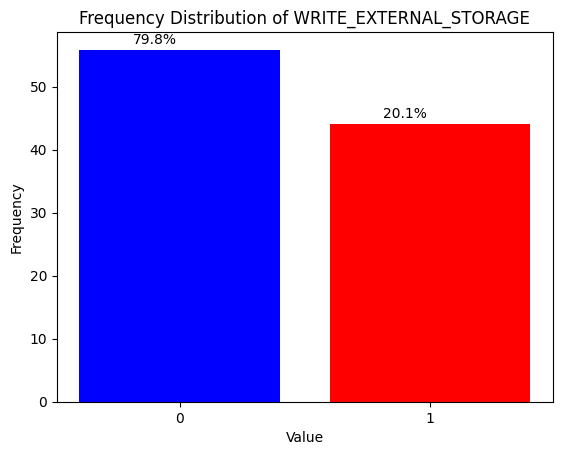

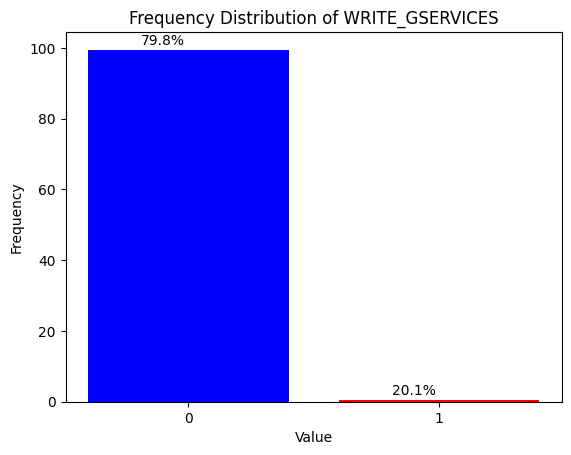

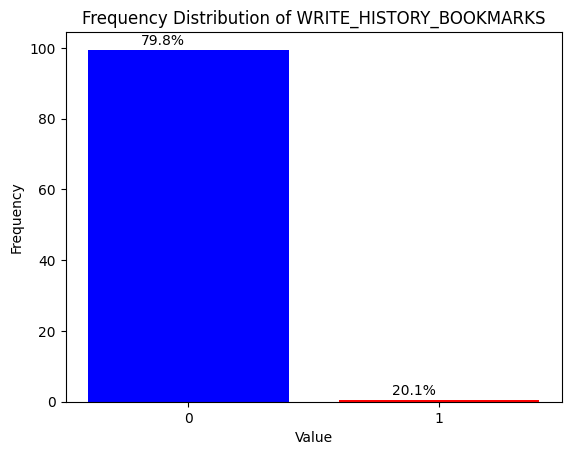

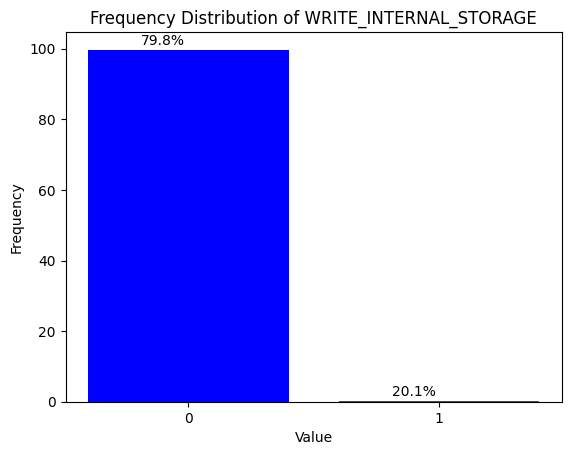

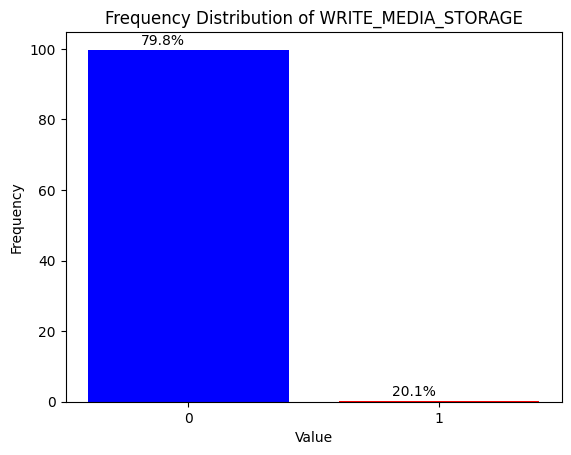

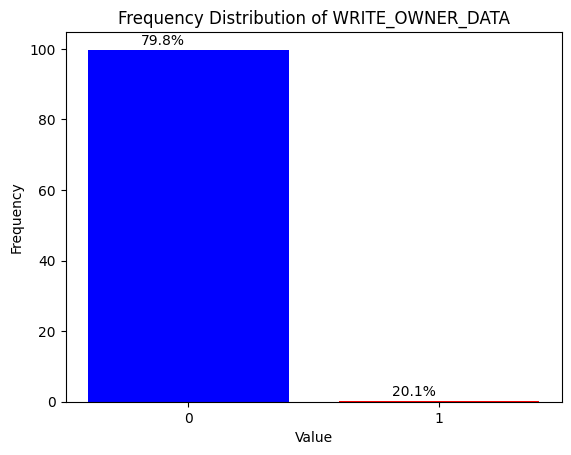

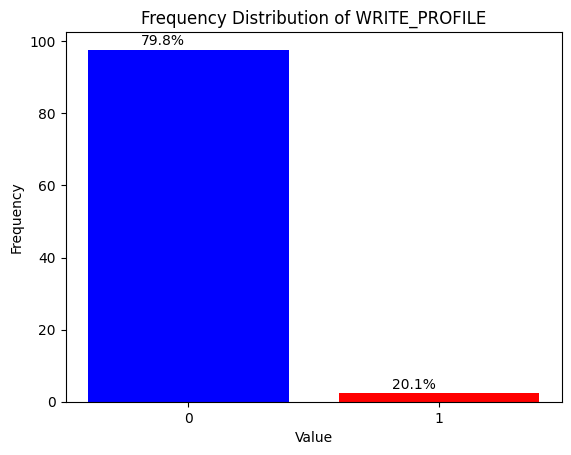

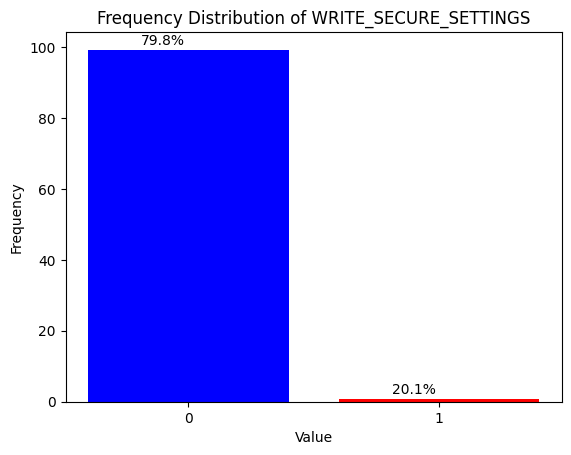

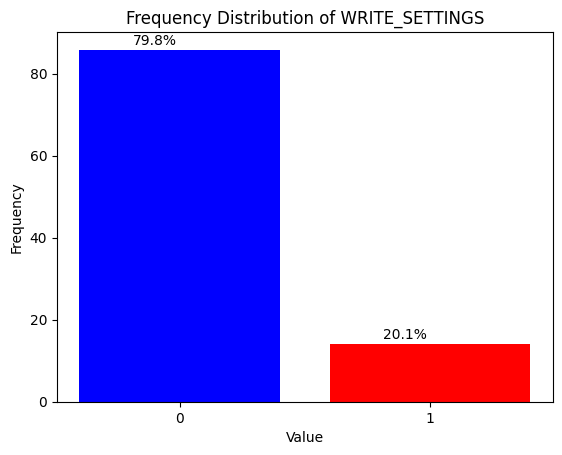

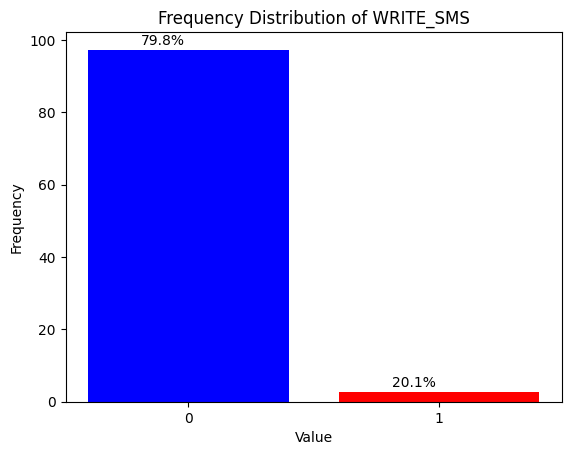

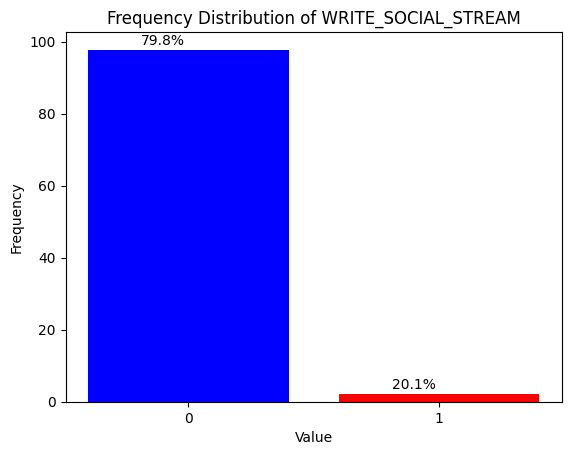

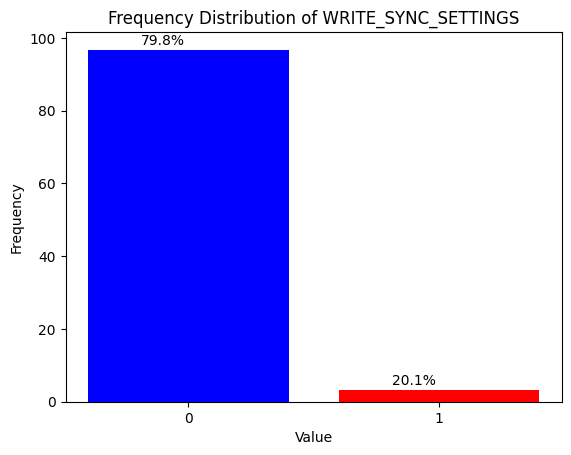

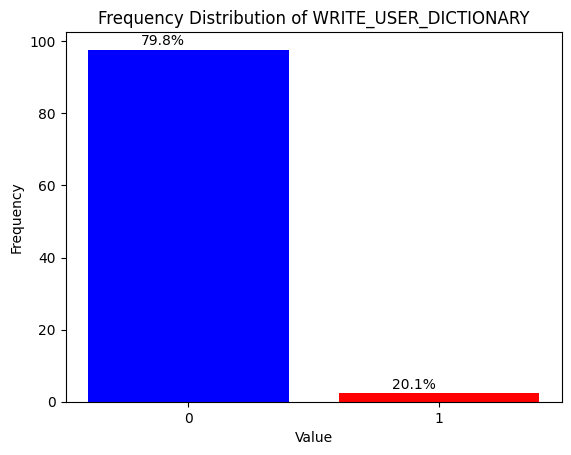

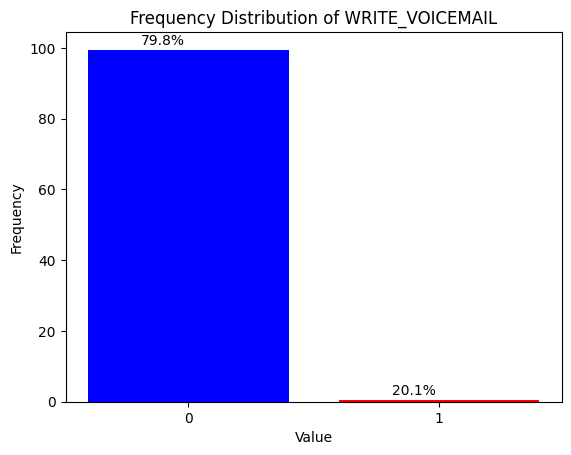

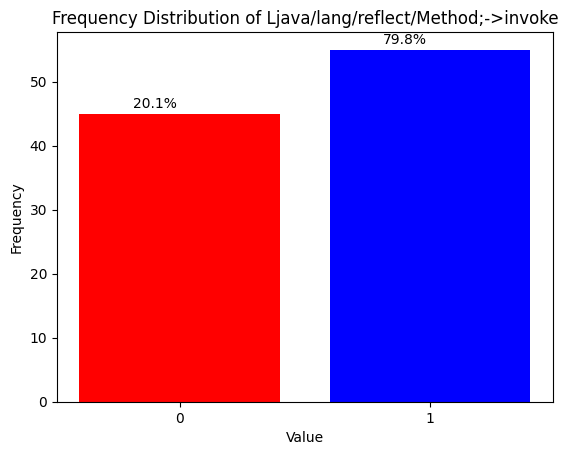

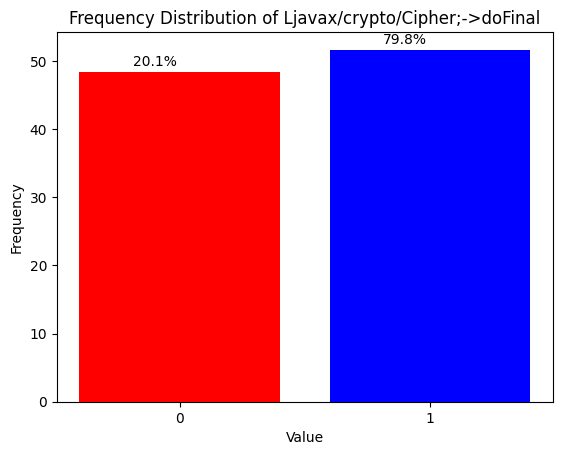

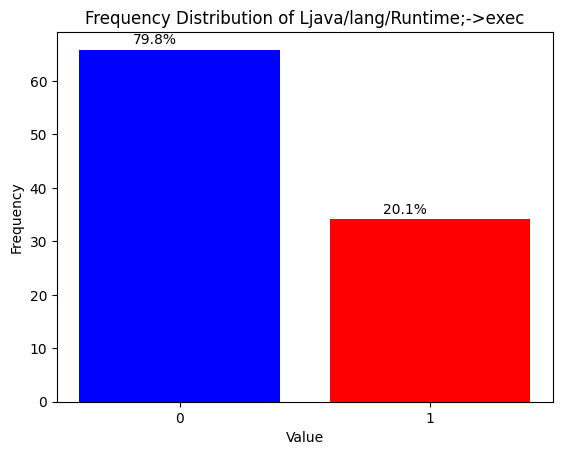

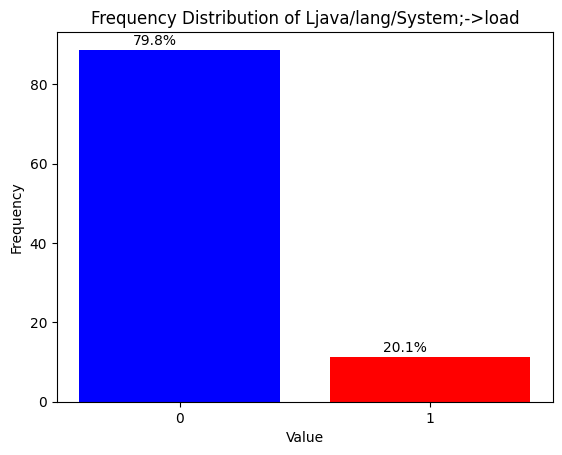

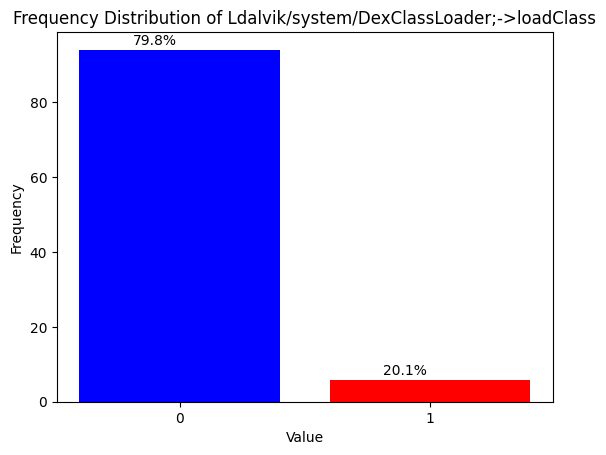

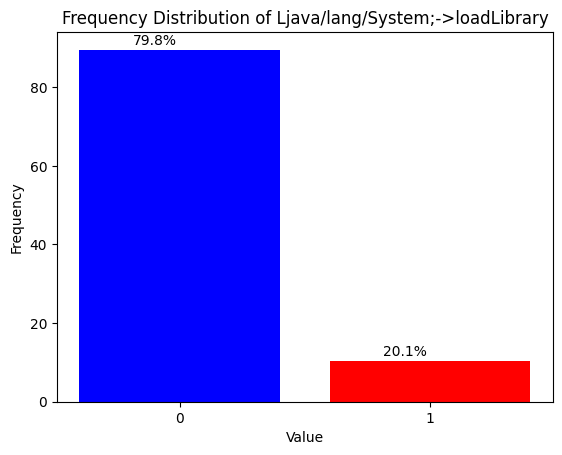

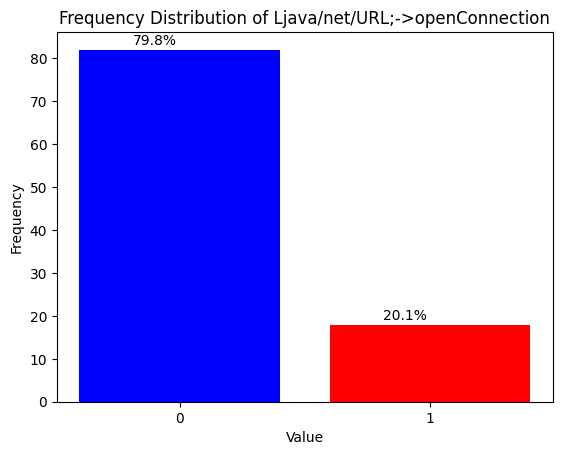

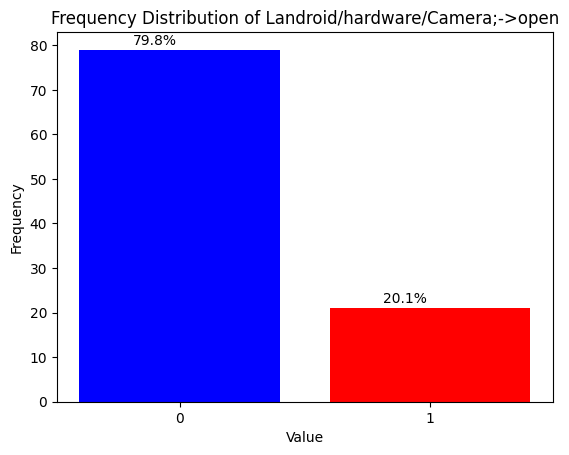

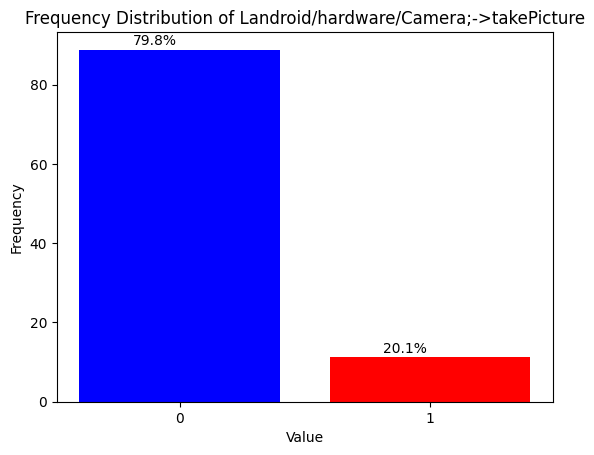

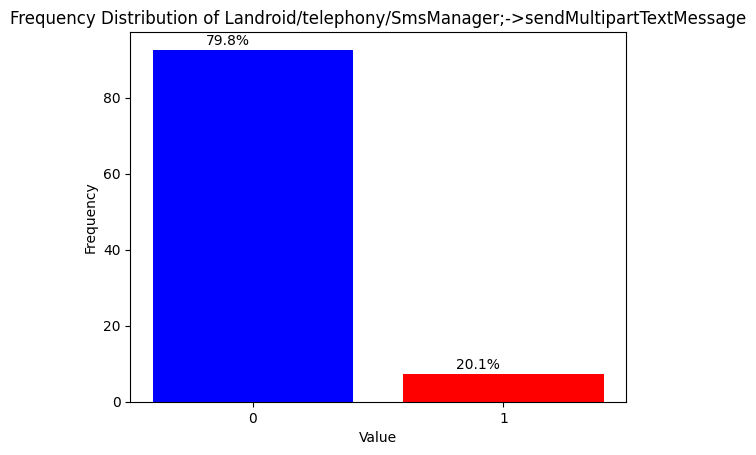

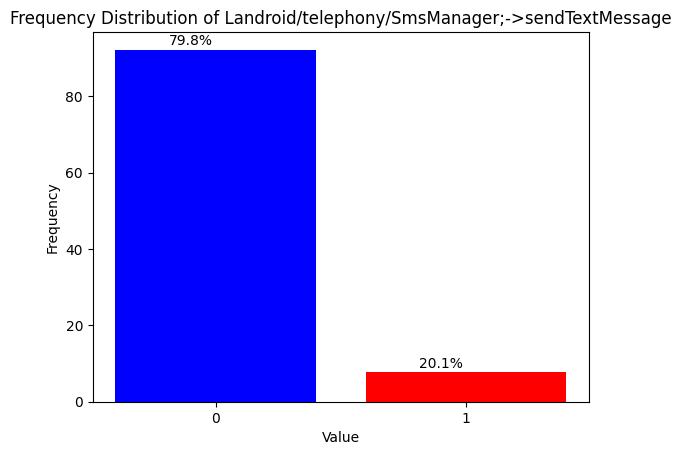

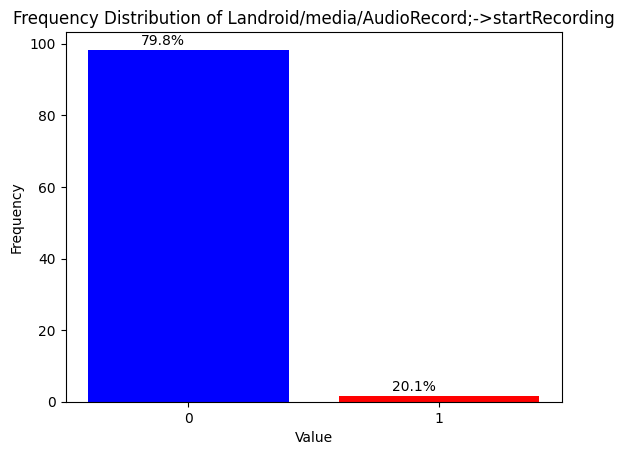

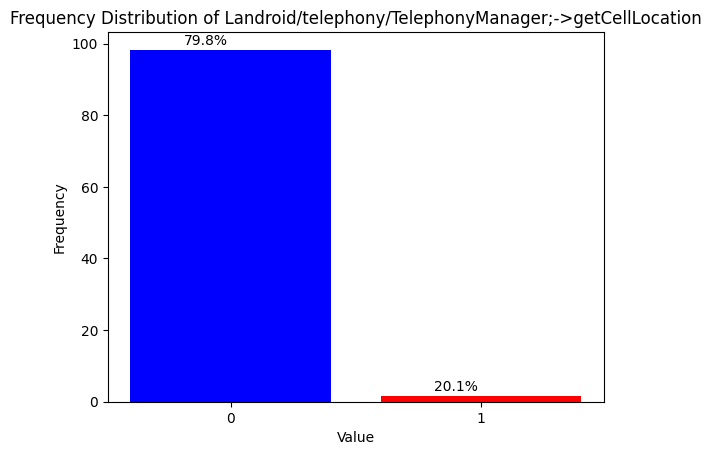

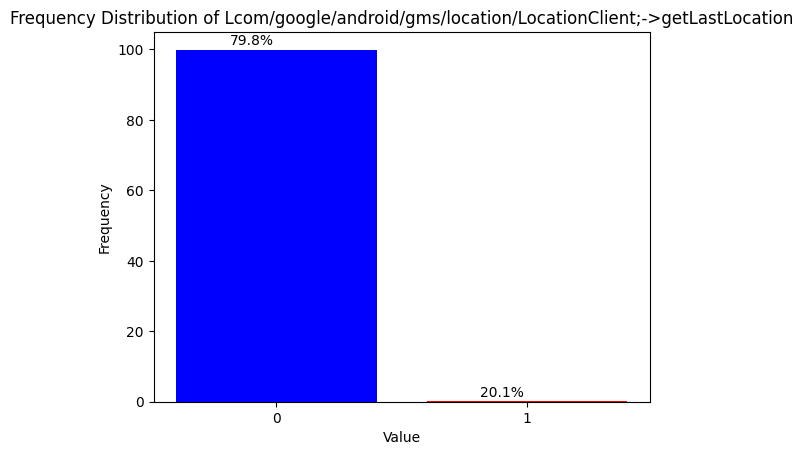

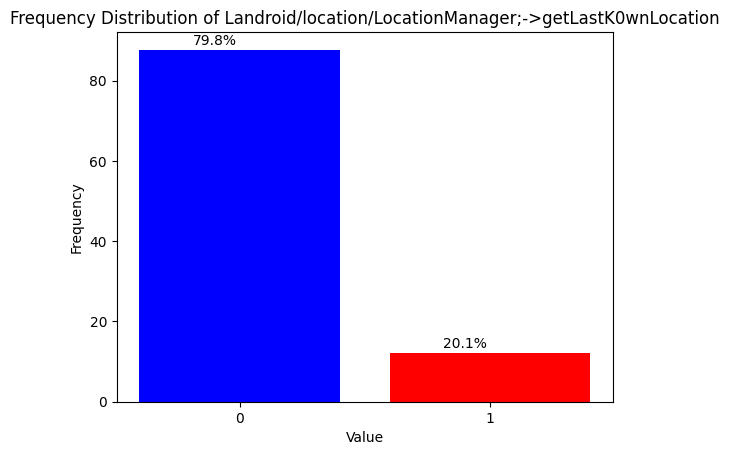

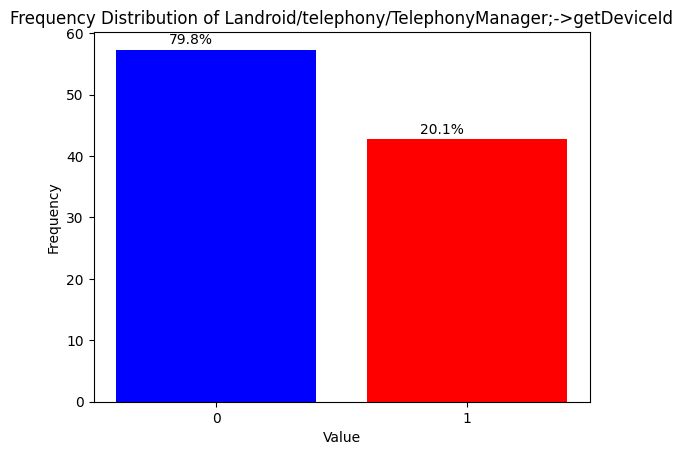

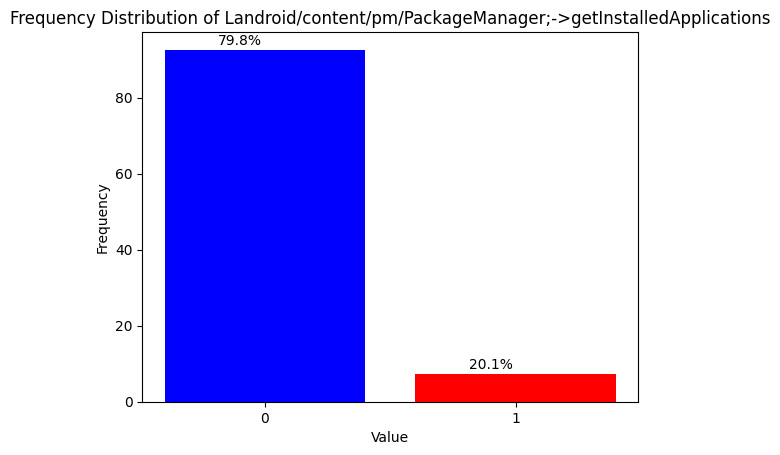

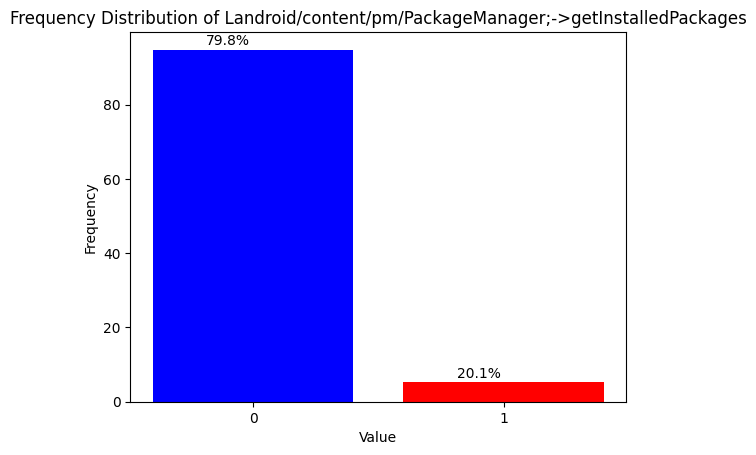

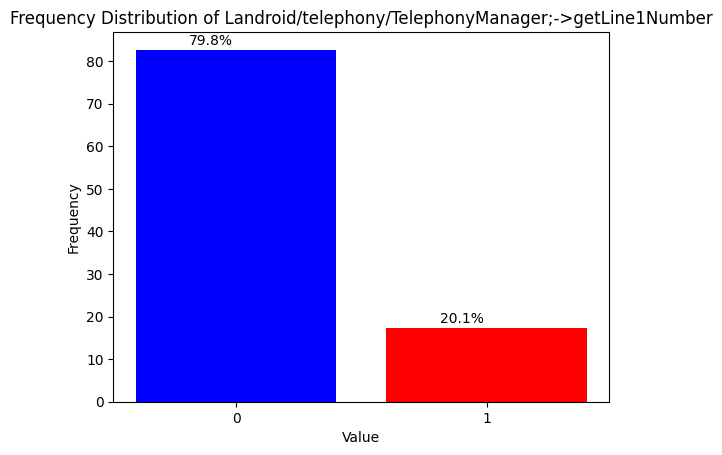

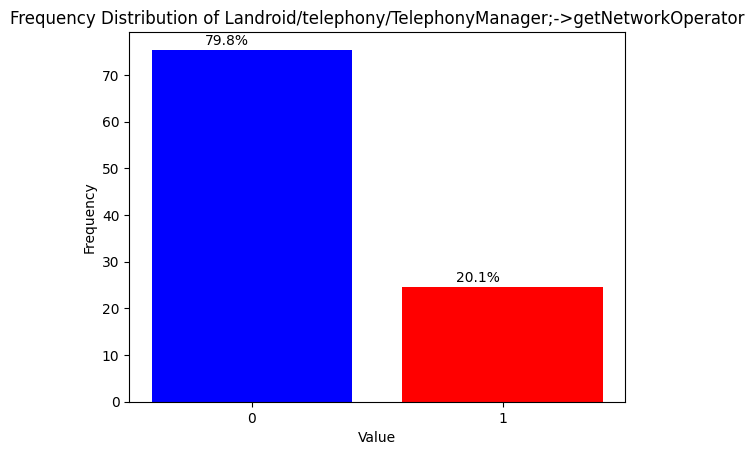

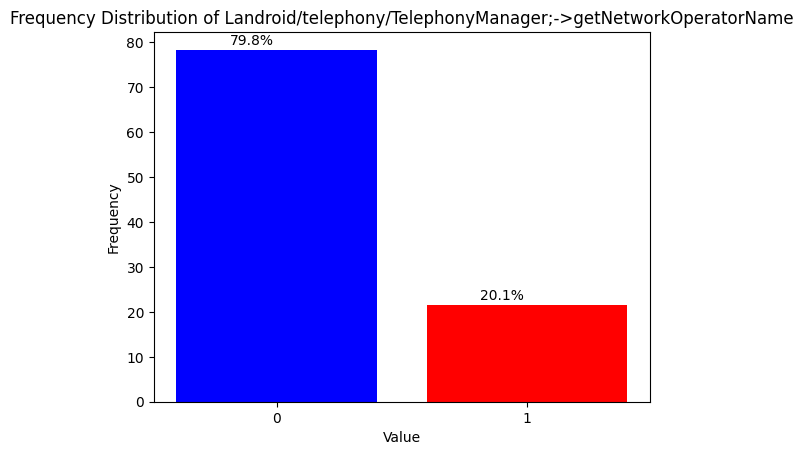

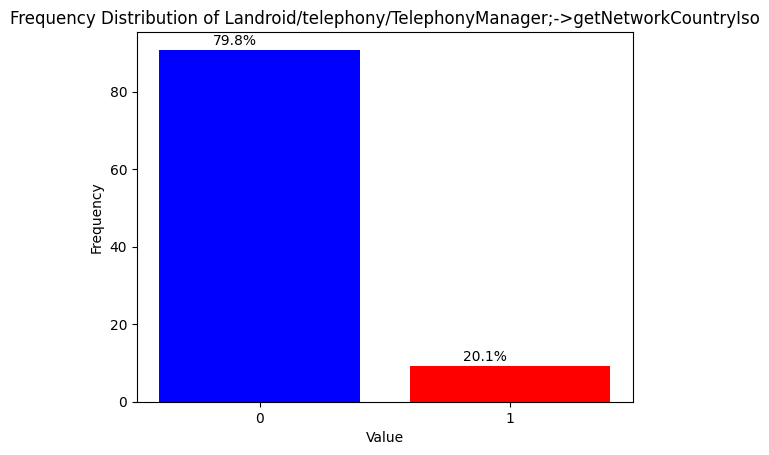

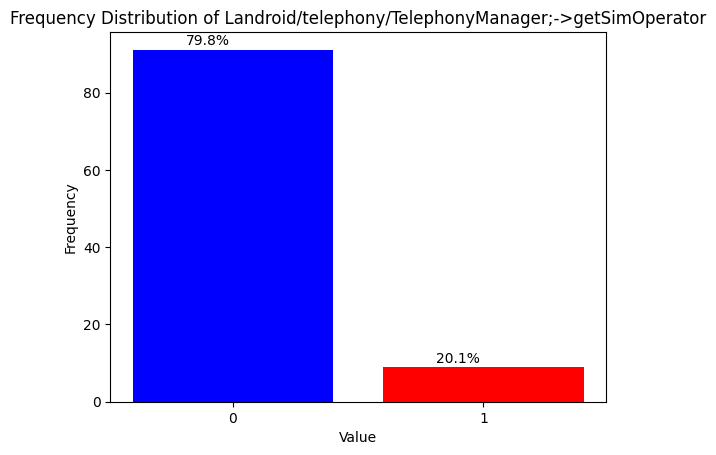

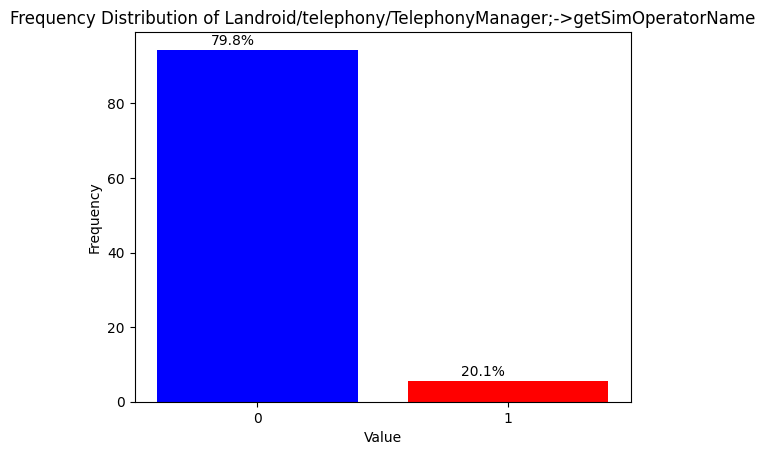

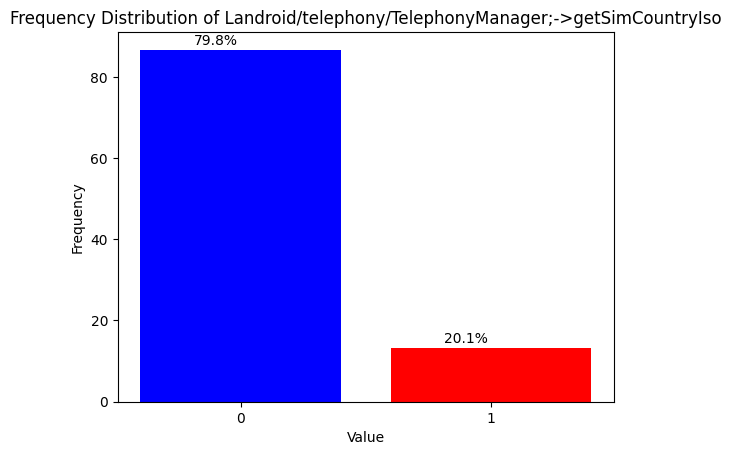

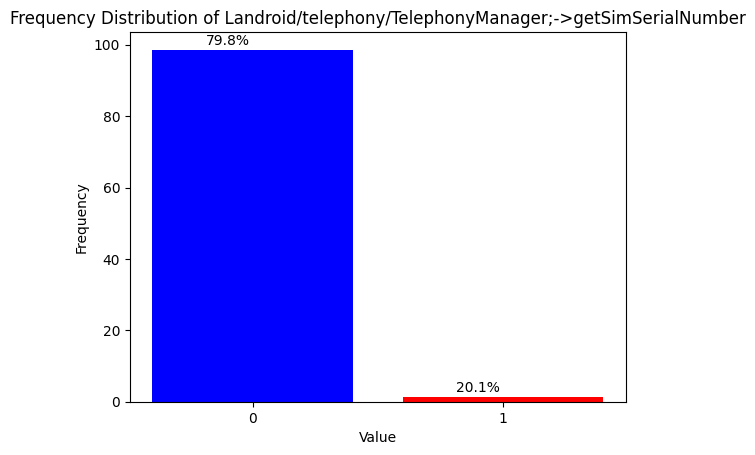

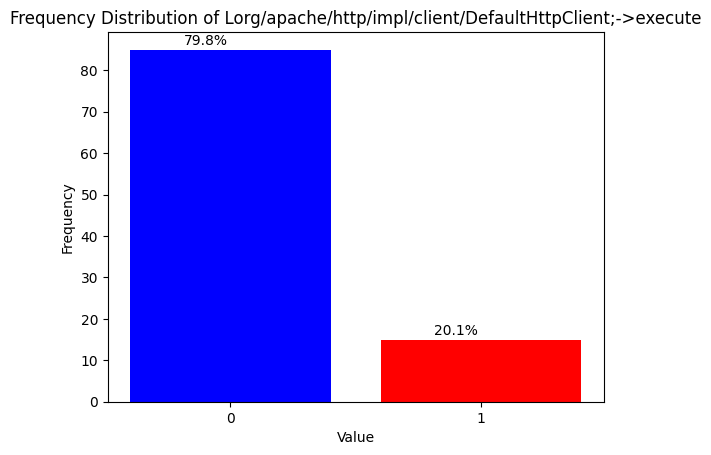

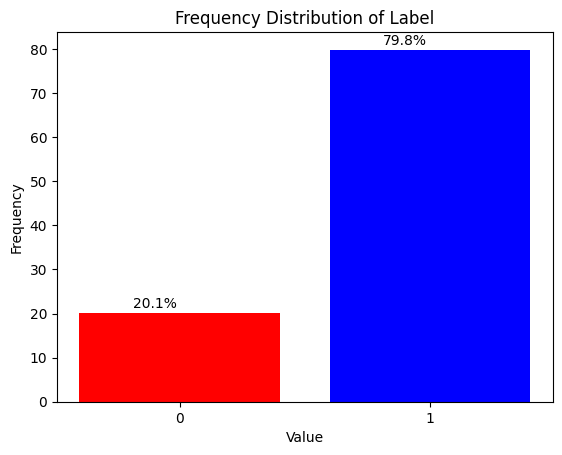

In [14]:
# The imbalance can also be seen on each column of the dataset 
# Function to create frequency distribution graph for a column
def plot_frequency_distribution(column_name):
    counts = df[column_name].value_counts()
    percentages = counts / len(df) * 100
    colors = ['blue', 'red']
    bars = plt.bar(percentages.index, percentages, color=colors)
    for bars, percentages in zip(bars, label_percentages):
        plt.text(bars.get_x() + bar.get_width() / 2 - 0.1, bars.get_height() + 0.5,
                f'{percentages:.1f}%', ha='center', va='bottom', color='black')
    plt.xticks(counts.index)
    plt.title(f'Frequency Distribution of {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Iterate through each column in the DataFrame
for column in df.columns:
    plot_frequency_distribution(column)

## **PART 3: DATA PREPARATION**

In [15]:
# Deleting a record with missing data

df = df.dropna()
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} features after deleting rows")

Dataset has 4464 rows and 242 features after deleting rows


In [16]:
#Train/Test split on a 80: 20 ratio
X = df.drop(columns=["Label"])
y = df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Check the percentage of "pass/fail" in the original data and the training/testing sets
print("Original data:")
print(y.value_counts(normalize=True))
print("Training data:")
print(y_train.value_counts(normalize=True))
print("Test data:")
print(y_test.value_counts(normalize=True))

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Original data:
Label
1.0    0.798611
0.0    0.201389
Name: proportion, dtype: float64
Training data:
Label
1.0    0.798656
0.0    0.201344
Name: proportion, dtype: float64
Test data:
Label
1.0    0.798432
0.0    0.201568
Name: proportion, dtype: float64
Training set size: 3571
Test set size: 893


## **PART 4: BUILD BASELINE MODEL: LOGISTICS REGRESSION - LASSO & ROSE**

In [21]:
# Define the model evaluation function

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate precision score
    precision = precision_score(y_test, y_pred)

    # Calculate recall score
    recall = recall_score(y_test, y_pred)

    # Calculate true negatives (TN)
    TN = cm[0, 0]

    # Calculate false positives (FP)
    FP = cm[0, 1]

    # Calculate false negatives (FN)
    FN = cm[1, 0]

    # Calculate true positives (TP)
    TP = cm[1, 1]

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Calculate F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)

    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred)

    # Generate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Set x-axis and y-axis tick labels
    plt.xticks([0.5, 1.5], ['Pass', 'Fail'])
    plt.yticks([0.5, 1.5], ['Pass', 'Fail'])

    plt.show()

    # Return evaluation results
    evaluation_results = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F2 Score': f2,
        'AUC Score': auc,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'TP': TP
    }
    print(evaluation_results)

In [20]:
# Concatenating the feature matrix (X_train) and the target variable (y_train) along the columns
df_training = pd.concat([X_train,y_train], axis=1)
df_training

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
3992                   0.0                      0.0   
2891                   0.0                      0.0   
2951                   0.0                      0.0   
2367                   0.0                      0.0   
3027                   0.0                      0.0   
...                    ...                      ...   
2752                   0.0                      0.0   
1057                   0.0                      0.0   
3493                   0.0                      0.0   
1348                   0.0                      0.0   
2238                   0.0                      0.0   

      ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
3992                        0.0                     0.0   
2891                        0.0                     1.0   
2951                        0.0                     0.0   
2367                        0.0                     0.0   
3027                        0.0                     0.0   
...                         ...                     ...   
2752                        0.0                     0.0   
1057                        0.0                     0.0   
3493                        0.0                     0.0   
1348                        0.0                     0.0   
2238                        0.0                     0.0   

      ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
3992                    0.0                   0.0   
2891                    0.0                   1.0   
2951                    0.0                   0.0   
2367                    0.0                   0.0   
3027                    0.0                   0.0   
...                     ...                   ...   
2752                    0.0                   0.0   
1057                    0.0                   0.0   
3493                    0.0                   0.0   
1348                    0.0                   0.0   
2238                    0.0                   0.0   

      ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
3992                             0.0                   0.0              0.0   
2891                             1.0                   1.0              0.0   
2951                             0.0                   0.0              0.0   
2367                             0.0                   0.0              0.0   
3027                             0.0                   0.0              0.0   
...                              ...                   ...              ...   
2752                             0.0                   0.0              0.0   
1057                             0.0                   0.0              0.0   
3493                             0.0                   0.0              0.0   
1348                             0.0                   0.0              0.0   
2238                             0.0                   0.0              0.0   

      ACCESS_NETWORK_STATE  ...  \
3992                   1.0  ...   
2891                   1.0  ...   
2951                   0.0  ...   
2367                   0.0  ...   
3027                   1.0  ...   
...                    ...  ...   
2752                   1.0  ...   
1057                   1.0  ...   
3493                   1.0  ...   
1348                   1.0  ...   
2238                   1.0  ...   

      Landroid/telephony/TelephonyManager;->getLine1Number  \
3992                                                0.0      
2891                                                1.0      
2951                                                0.0      
2367                                                0.0      
3027                                                0.0      
...                                                 ...      
2752                                                0.0      
1057                                                0.0      
3493                                                0.0      
1348     

In [22]:
## Feature selection - Lasso
# Separate X (features) and y (target variable)
X = df_training.drop('Label', axis=1)
y = df_training['Label']

from sklearn.linear_model import LassoCV

# Create a LassoCV model
lasso_cv = LassoCV(cv=5)

# Fit the LassoCV model on the data
lasso_cv.fit(X, y)

# Get the selected features using the optimal alpha
coef_cv = lasso_cv.coef_
selected_features_cv = [i for i, c in enumerate(coef_cv) if c != 0]
selected_X = X.iloc[:, selected_features_cv]
selected_X

# Combine the selected features with y into the final dataframe
training_features = pd.concat([selected_X, y], axis=1)
training_features

ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
3992                     0.0                    0.0                   0.0   
2891                     1.0                    0.0                   1.0   
2951                     0.0                    0.0                   0.0   
2367                     0.0                    0.0                   0.0   
3027                     0.0                    0.0                   0.0   
...                      ...                    ...                   ...   
2752                     0.0                    0.0                   0.0   
1057                     0.0                    0.0                   0.0   
3493                     0.0                    0.0                   0.0   
1348                     0.0                    0.0                   0.0   
2238                     0.0                    0.0                   0.0   

      ACCESS_NETWORK_STATE  ACCESS_WIFI_STATE  AUTHENTICATE_ACCOUNTS  \
3992                   1.0                0.0                    0.0   
2891                   1.0                1.0                    1.0   
2951                   0.0                1.0                    0.0   
2367                   0.0                1.0                    0.0   
3027                   1.0                1.0                    0.0   
...                    ...                ...                    ...   
2752                   1.0                0.0                    0.0   
1057                   1.0                0.0                    0.0   
3493                   1.0                0.0                    0.0   
1348                   1.0                0.0                    0.0   
2238                   1.0                0.0                    0.0   

      BATTERY_STATS  BIND_APPWIDGET  BLUETOOTH  BLUETOOTH_ADMIN  ...  \
3992            1.0             0.0        0.0              0.0  ...   
2891            1.0             0.0        1.0              1.0  ...   
2951            0.0             0.0        0.0              0.0  ...   
2367            0.0             0.0        0.0              0.0  ...   
3027            0.0             0.0        0.0              0.0  ...   
...             ...             ...        ...              ...  ...   
2752            0.0             0.0        0.0              0.0  ...   
1057            0.0             0.0        0.0              0.0  ...   
3493            0.0             0.0        0.0              0.0  ...   
1348            0.0             0.0        0.0              0.0  ...   
2238            0.0             0.0        0.0              0.0  ...   

      Landroid/content/pm/PackageManager;->getInstalledPackages  \
3992                                                0.0           
2891                                                0.0           
2951                                                0.0           
2367                                                0.0           
3027                                                0.0           
...                                                 ...           
2752                                                0.0           
1057                                                0.0           
3493                                                0.0           
1348                                                0.0           
2238                                                0.0           

      Landroid/telephony/TelephonyManager;->getLine1Number  \
3992                                                0.0      
2891                                                1.0      
2951                                                0.0      
2367                                                0.0      
3027                                                0.0      
...                                                 ...      
2752                                                0.0      
1057                                              

In [23]:
# Balancing - ROSE
# Define x & y
X = training_features.drop('Label',axis=1)
y = training_features['Label']

# Define desired sampling strategy / parameters
rose = RandomOverSampler(sampling_strategy='auto', random_state = 11)

# Fit
Rose_X, Rose_y = rose.fit_resample(X, y)

# Join X and y to see the "Label" ratio in the balanced dataset
training_final = pd.concat([Rose_X, Rose_y], axis=1)

balancing_ratio = training_final['Label'].value_counts(normalize=True)* 100
print(balancing_ratio)

Label
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


In [24]:
# Slice same features for test set
selected_y = np.array(selected_X.columns)
test_features = X_test[selected_y]
test_features

ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
4268                     0.0                    0.0                   0.0   
11                       0.0                    0.0                   0.0   
735                      0.0                    0.0                   0.0   
1464                     0.0                    0.0                   0.0   
2896                     0.0                    0.0                   0.0   
...                      ...                    ...                   ...   
2058                     0.0                    0.0                   0.0   
1605                     0.0                    0.0                   0.0   
2704                     0.0                    0.0                   0.0   
2317                     0.0                    0.0                   0.0   
1804                     0.0                    0.0                   0.0   

      ACCESS_NETWORK_STATE  ACCESS_WIFI_STATE  AUTHENTICATE_ACCOUNTS  \
4268                   1.0                0.0                    0.0   
11                     1.0                0.0                    0.0   
735                    1.0                0.0                    0.0   
1464                   1.0                0.0                    0.0   
2896                   0.0                1.0                    0.0   
...                    ...                ...                    ...   
2058                   1.0                0.0                    0.0   
1605                   0.0                0.0                    0.0   
2704                   1.0                0.0                    0.0   
2317                   1.0                0.0                    0.0   
1804                   0.0                0.0                    0.0   

      BATTERY_STATS  BIND_APPWIDGET  BLUETOOTH  BLUETOOTH_ADMIN  ...  \
4268            0.0             0.0        0.0              0.0  ...   
11              0.0             0.0        0.0              0.0  ...   
735             0.0             0.0        0.0              0.0  ...   
1464            0.0             0.0        0.0              0.0  ...   
2896            0.0             0.0        0.0              0.0  ...   
...             ...             ...        ...              ...  ...   
2058            1.0             0.0        0.0              0.0  ...   
1605            0.0             0.0        0.0              0.0  ...   
2704            0.0             0.0        0.0              0.0  ...   
2317            1.0             0.0        0.0              0.0  ...   
1804            0.0             0.0        0.0              0.0  ...   

      Landroid/content/pm/PackageManager;->getInstalledApplications  \
4268                                                0.0               
11                                                  0.0               
735                                                 0.0               
1464                                                0.0               
2896                                                0.0               
...                                                 ...               
2058                                                0.0               
1605                                                0.0               
2704                                                1.0               
2317                                                0.0               
1804                                                0.0               

      Landroid/content/pm/PackageManager;->getInstalledPackages  \
4268                                                0.0           
11                                                  0.0           
735                                                 0.0           
1464                                                0.0           
2896                                                0.0           
...                                                 ...           
2058                         

In [25]:
test_final = pd.concat([test_features,y_test],axis=1)
test_final

ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
4268                     0.0                    0.0                   0.0   
11                       0.0                    0.0                   0.0   
735                      0.0                    0.0                   0.0   
1464                     0.0                    0.0                   0.0   
2896                     0.0                    0.0                   0.0   
...                      ...                    ...                   ...   
2058                     0.0                    0.0                   0.0   
1605                     0.0                    0.0                   0.0   
2704                     0.0                    0.0                   0.0   
2317                     0.0                    0.0                   0.0   
1804                     0.0                    0.0                   0.0   

      ACCESS_NETWORK_STATE  ACCESS_WIFI_STATE  AUTHENTICATE_ACCOUNTS  \
4268                   1.0                0.0                    0.0   
11                     1.0                0.0                    0.0   
735                    1.0                0.0                    0.0   
1464                   1.0                0.0                    0.0   
2896                   0.0                1.0                    0.0   
...                    ...                ...                    ...   
2058                   1.0                0.0                    0.0   
1605                   0.0                0.0                    0.0   
2704                   1.0                0.0                    0.0   
2317                   1.0                0.0                    0.0   
1804                   0.0                0.0                    0.0   

      BATTERY_STATS  BIND_APPWIDGET  BLUETOOTH  BLUETOOTH_ADMIN  ...  \
4268            0.0             0.0        0.0              0.0  ...   
11              0.0             0.0        0.0              0.0  ...   
735             0.0             0.0        0.0              0.0  ...   
1464            0.0             0.0        0.0              0.0  ...   
2896            0.0             0.0        0.0              0.0  ...   
...             ...             ...        ...              ...  ...   
2058            1.0             0.0        0.0              0.0  ...   
1605            0.0             0.0        0.0              0.0  ...   
2704            0.0             0.0        0.0              0.0  ...   
2317            1.0             0.0        0.0              0.0  ...   
1804            0.0             0.0        0.0              0.0  ...   

      Landroid/content/pm/PackageManager;->getInstalledPackages  \
4268                                                0.0           
11                                                  0.0           
735                                                 0.0           
1464                                                0.0           
2896                                                0.0           
...                                                 ...           
2058                                                0.0           
1605                                                0.0           
2704                                                0.0           
2317                                                0.0           
1804                                                0.0           

      Landroid/telephony/TelephonyManager;->getLine1Number  \
4268                                                0.0      
11                                                  1.0      
735                                                 0.0      
1464                                                0.0      
2896                                                0.0      
...                                                 ...      
2058                                                0.0      
1605                                              

In [26]:
# Build the baseline logistics regression model

# Define variables
X_train1 = training_final.drop(['Label'], axis=1)
y_train1 = training_final['Label']

X_test1 = test_final.drop(['Label'], axis=1)
y_test1 = test_final['Label']

model = LogisticRegression()
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)

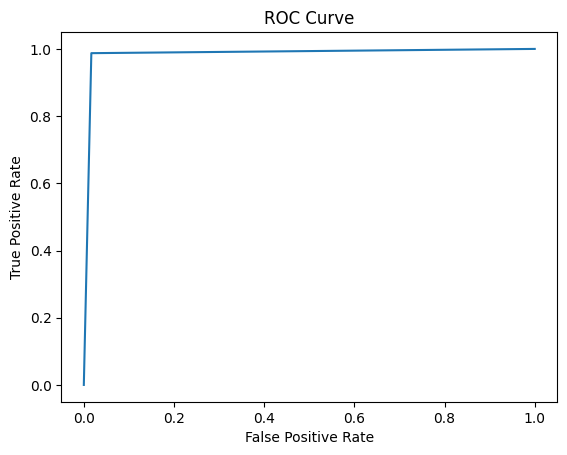

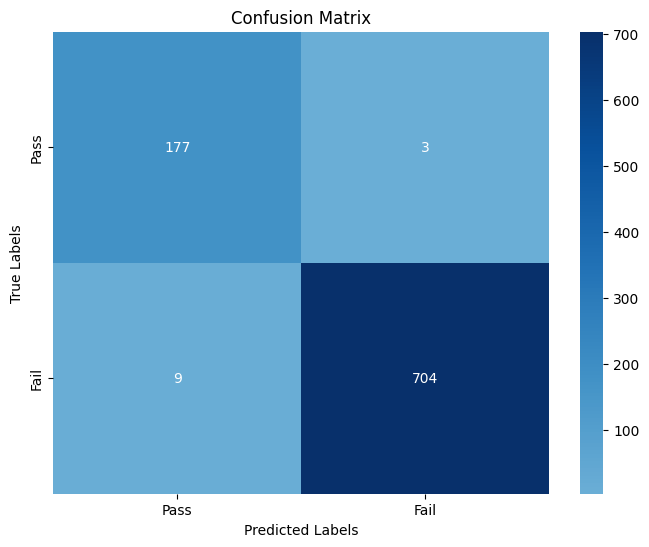

{'Accuracy': 0.986562150055991, 'Confusion Matrix': array([[177,   3],
       [  9, 704]]), 'Precision': 0.9957567185289957, 'Recall': 0.9873772791023843, 'F1 Score': 0.9915492957746479, 'F2 Score': 0.9890418656926101, 'AUC Score': 0.9853553062178588, 'TN': 177, 'FP': 3, 'FN': 9, 'TP': 704}


In [27]:
# Evaluate the baseline model

evaluate_model(LogisticRegression(), X_train1, y_train1, X_test1, y_test1)

# The model has a very high accuracy of approximately 98.66%. An AUC score of approximately 98.54% is quite good.
# The baseline classification model is performing very well, with high accuracy, precision, recall, and F1 score.

## **PART 4.1: BUILD OTHER MODELS**

In [28]:
# Create an array with different models
models = [
    SVC(),
    MLPClassifier(random_state=1, max_iter=300),
    AdaBoostClassifier(n_estimators=2000),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(n_estimators=2000),
    HistGradientBoostingClassifier(max_iter=100),
    GaussianNB(),
]

Model: SVC


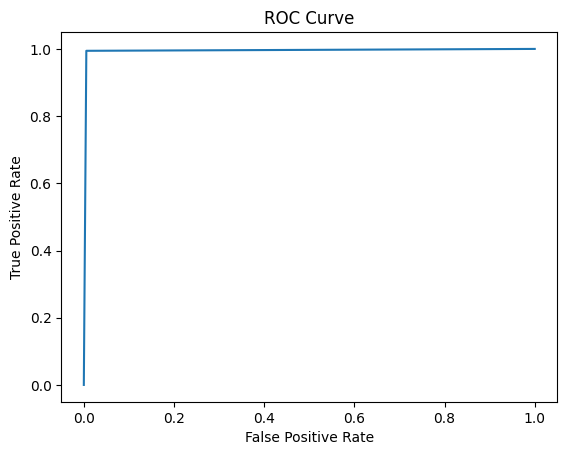

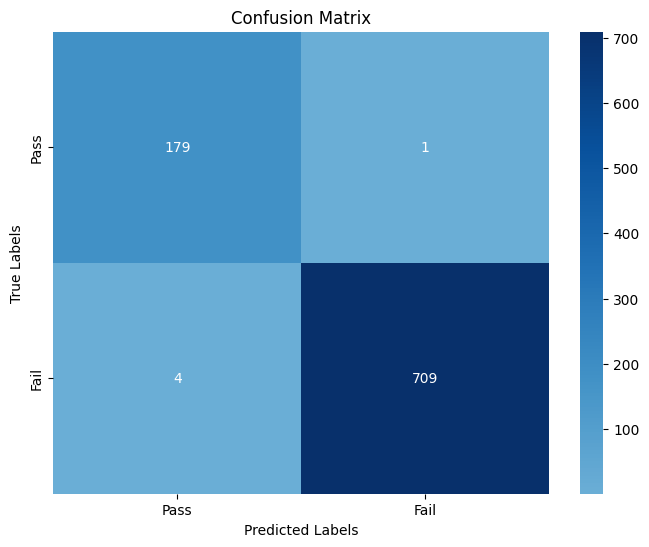

{'Accuracy': 0.9944008958566629, 'Confusion Matrix': array([[179,   1],
       [  4, 709]]), 'Precision': 0.9985915492957746, 'Recall': 0.9943899018232819, 'F1 Score': 0.9964862965565706, 'F2 Score': 0.9952274003368893, 'AUC Score': 0.9944171731338631, 'TN': 179, 'FP': 1, 'FN': 4, 'TP': 709}


Model: MLPClassifier


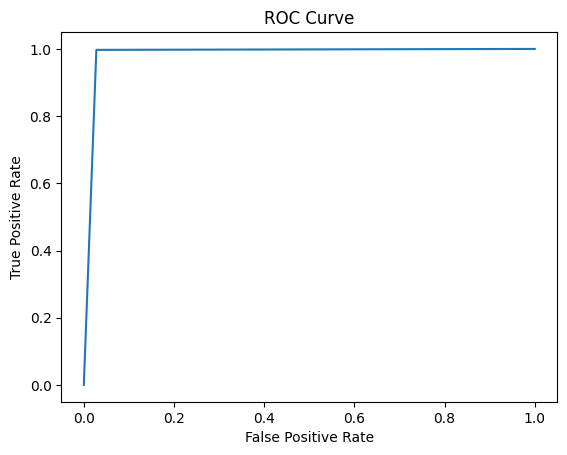

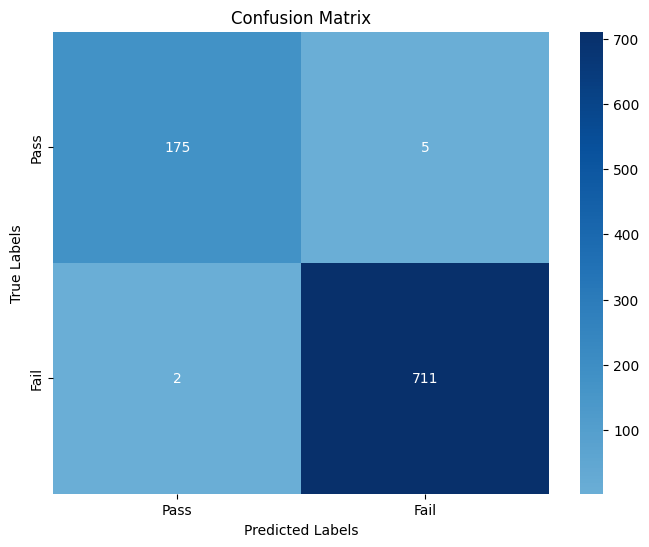

{'Accuracy': 0.9921612541993281, 'Confusion Matrix': array([[175,   5],
       [  2, 711]]), 'Precision': 0.9930167597765364, 'Recall': 0.9971949509116409, 'F1 Score': 0.9951014695591324, 'F2 Score': 0.9963565022421524, 'AUC Score': 0.9847085865669315, 'TN': 175, 'FP': 5, 'FN': 2, 'TP': 711}


Model: AdaBoostClassifier


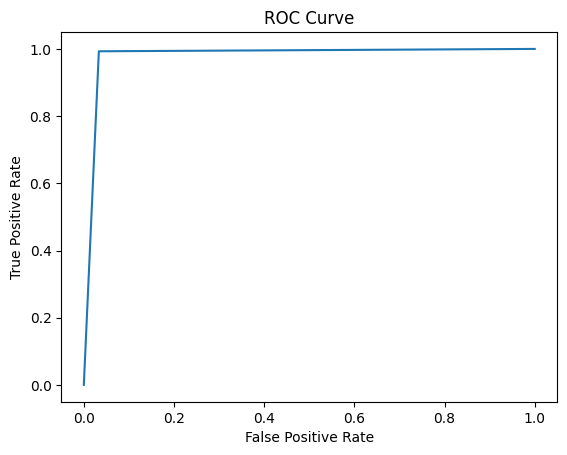

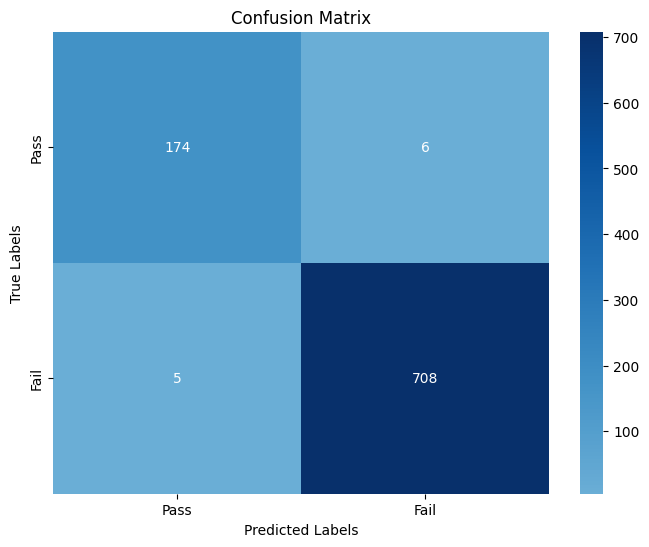

{'Accuracy': 0.9876819708846585, 'Confusion Matrix': array([[174,   6],
       [  5, 708]]), 'Precision': 0.9915966386554622, 'Recall': 0.9929873772791024, 'F1 Score': 0.99229152067274, 'F2 Score': 0.992708917554683, 'AUC Score': 0.9798270219728845, 'TN': 174, 'FP': 6, 'FN': 5, 'TP': 708}


Model: KNeighborsClassifier


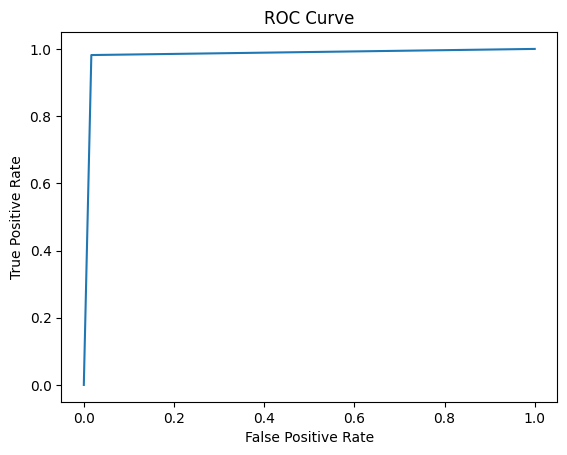

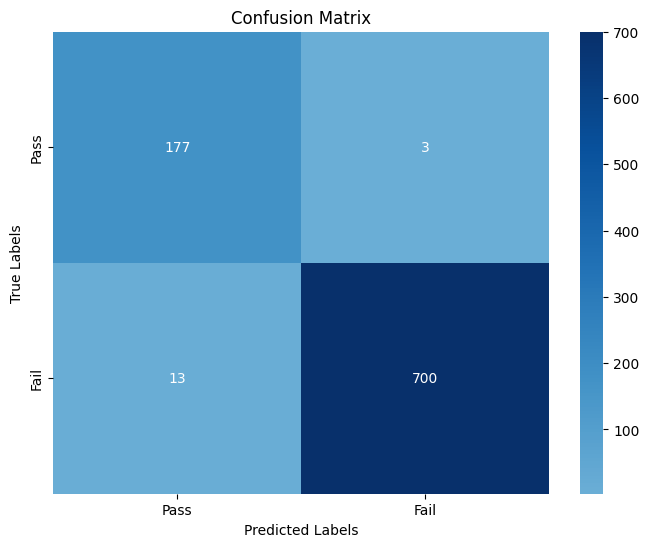

{'Accuracy': 0.9820828667413214, 'Confusion Matrix': array([[177,   3],
       [ 13, 700]]), 'Precision': 0.9957325746799431, 'Recall': 0.9817671809256662, 'F1 Score': 0.9887005649717514, 'F2 Score': 0.9845288326300985, 'AUC Score': 0.9825502571294997, 'TN': 177, 'FP': 3, 'FN': 13, 'TP': 700}


Model: RandomForestClassifier


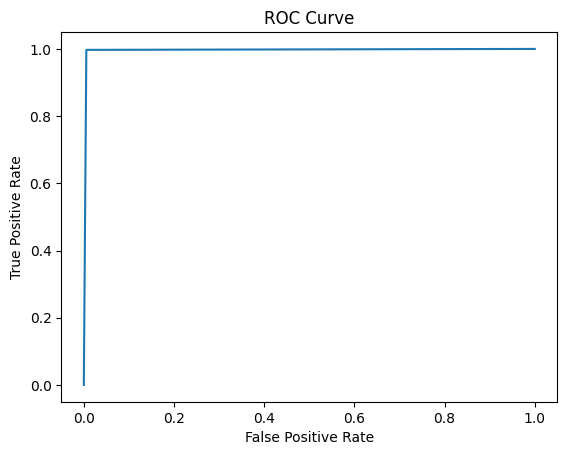

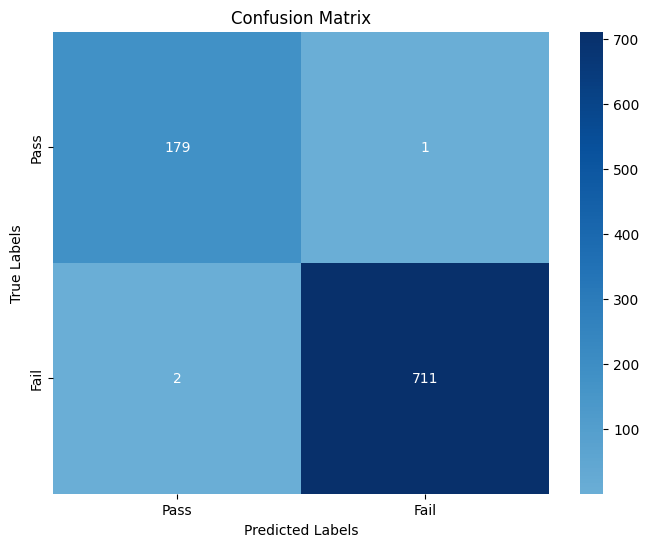

{'Accuracy': 0.9966405375139977, 'Confusion Matrix': array([[179,   1],
       [  2, 711]]), 'Precision': 0.9985955056179775, 'Recall': 0.9971949509116409, 'F1 Score': 0.9978947368421052, 'F2 Score': 0.9974747474747473, 'AUC Score': 0.9958196976780427, 'TN': 179, 'FP': 1, 'FN': 2, 'TP': 711}


Model: DecisionTreeClassifier


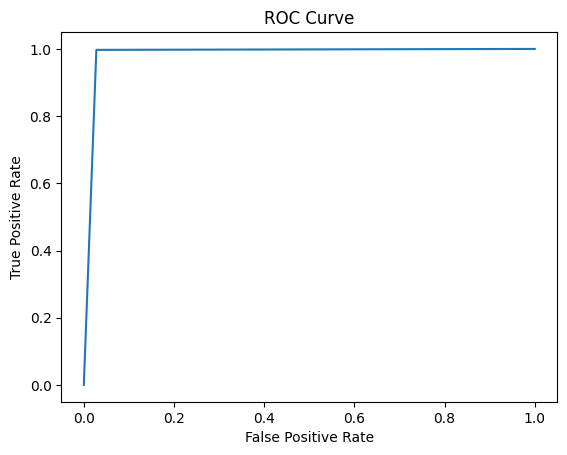

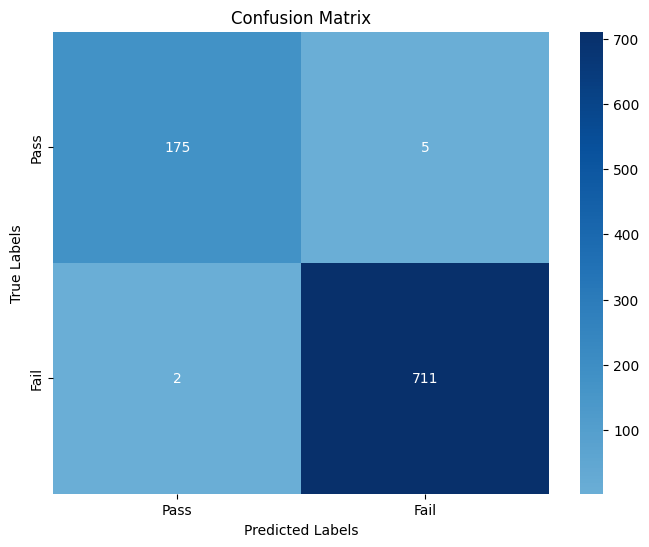

{'Accuracy': 0.9921612541993281, 'Confusion Matrix': array([[175,   5],
       [  2, 711]]), 'Precision': 0.9930167597765364, 'Recall': 0.9971949509116409, 'F1 Score': 0.9951014695591324, 'F2 Score': 0.9963565022421524, 'AUC Score': 0.9847085865669315, 'TN': 175, 'FP': 5, 'FN': 2, 'TP': 711}


Model: GaussianProcessClassifier


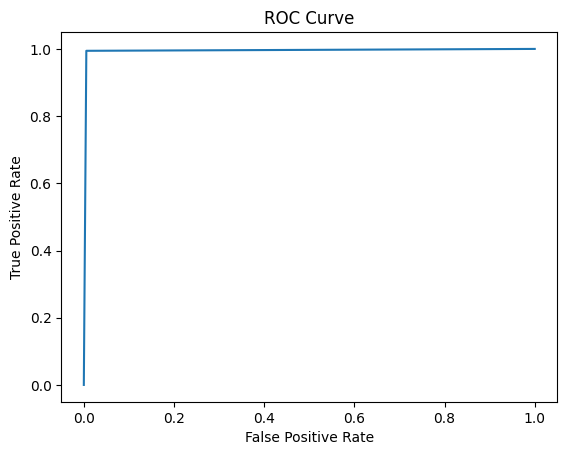

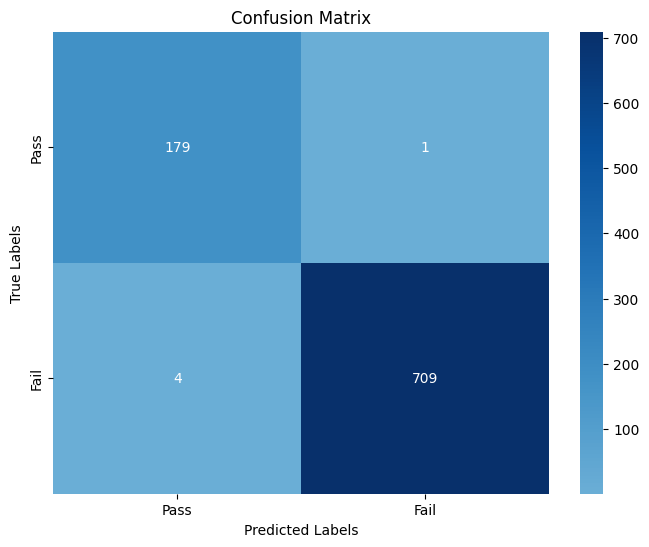

{'Accuracy': 0.9944008958566629, 'Confusion Matrix': array([[179,   1],
       [  4, 709]]), 'Precision': 0.9985915492957746, 'Recall': 0.9943899018232819, 'F1 Score': 0.9964862965565706, 'F2 Score': 0.9952274003368893, 'AUC Score': 0.9944171731338631, 'TN': 179, 'FP': 1, 'FN': 4, 'TP': 709}


Model: GradientBoostingClassifier


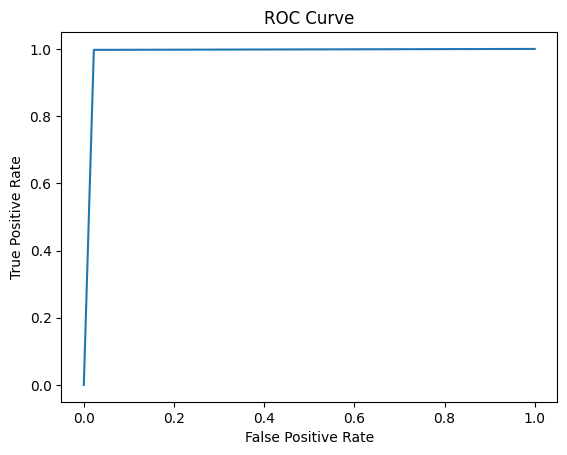

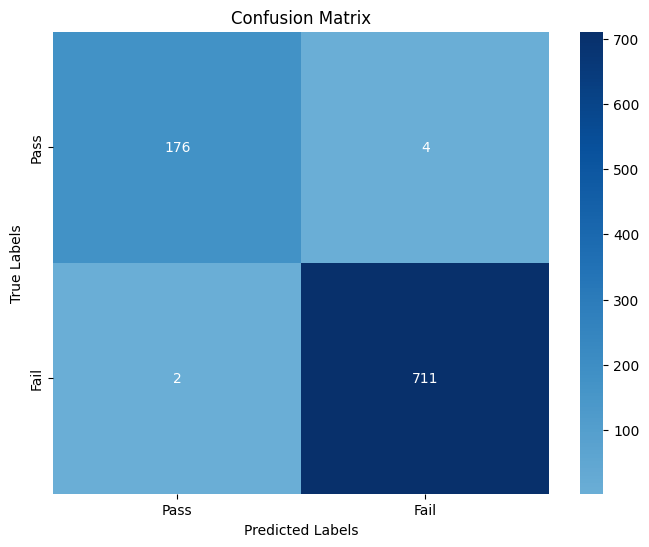

{'Accuracy': 0.9932810750279956, 'Confusion Matrix': array([[176,   4],
       [  2, 711]]), 'Precision': 0.9944055944055944, 'Recall': 0.9971949509116409, 'F1 Score': 0.995798319327731, 'F2 Score': 0.9966358284272496, 'AUC Score': 0.9874863643447093, 'TN': 176, 'FP': 4, 'FN': 2, 'TP': 711}


Model: HistGradientBoostingClassifier


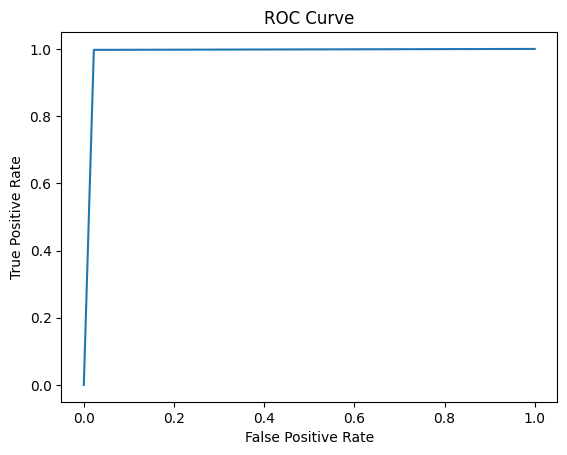

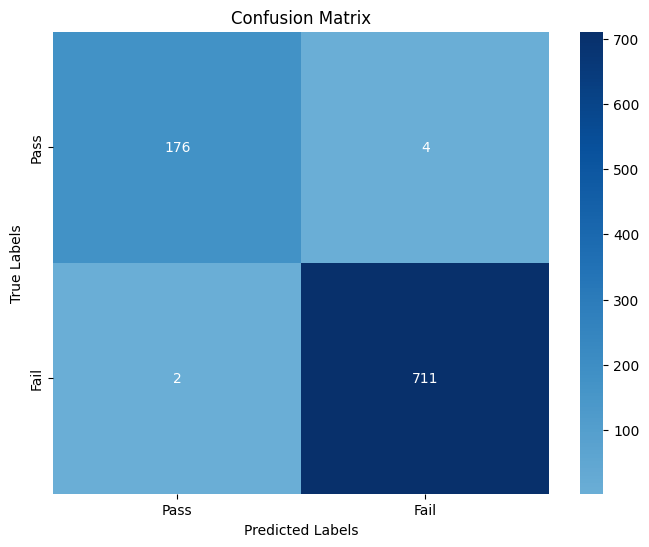

{'Accuracy': 0.9932810750279956, 'Confusion Matrix': array([[176,   4],
       [  2, 711]]), 'Precision': 0.9944055944055944, 'Recall': 0.9971949509116409, 'F1 Score': 0.995798319327731, 'F2 Score': 0.9966358284272496, 'AUC Score': 0.9874863643447093, 'TN': 176, 'FP': 4, 'FN': 2, 'TP': 711}


Model: GaussianNB


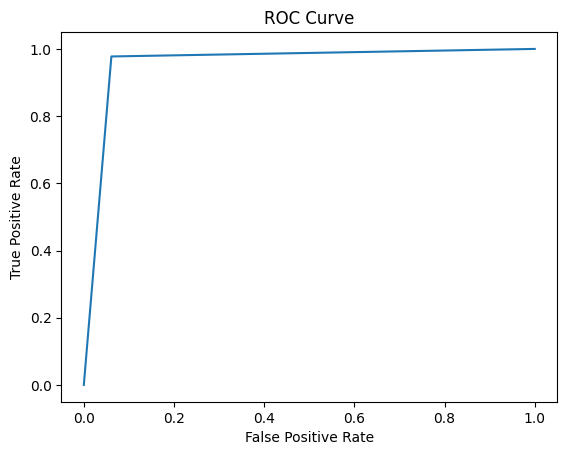

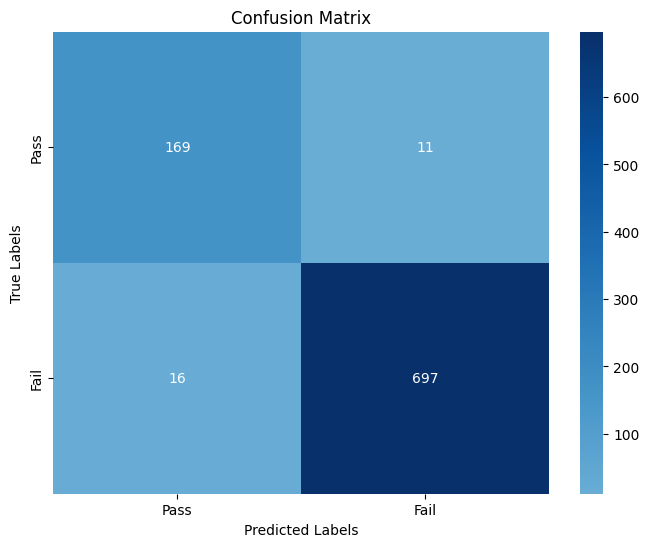

{'Accuracy': 0.9697648376259799, 'Confusion Matrix': array([[169,  11],
       [ 16, 697]]), 'Precision': 0.9844632768361582, 'Recall': 0.9775596072931276, 'F1 Score': 0.9809992962702322, 'F2 Score': 0.9789325842696629, 'AUC Score': 0.9582242480910083, 'TN': 169, 'FP': 11, 'FN': 16, 'TP': 697}




In [29]:
# Fit the model with the test set and evaluate each model
for model in models:
    # Display the name of the current model being evaluated
    print("Model:", model.__class__.__name__)
    
    # Train the model on the training set
    model.fit(X_train1, y_train1) 
    
    # Make predictions on the test set
    y_pred = model.predict(X_test1)
    
    # Evaluate and print the performance metrics of the model
    evaluate_model(model, X_train1, y_train1, X_test1, y_test1)
    
    # Print a separator for better readability
    print("\n" + "="*50 + "\n")

In [30]:
# Compare models based on accuracy and AUC before hyperparameter tuning
accuracy_scores = []  # List to store accuracy scores for each model
auc_scores = []       # List to store AUC scores for each model

# Iterate through each model in the list
for model in models:
    y_pred = model.predict(X_test1)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test1, y_pred)
    accuracy_scores.append((model.__class__.__name__, accuracy))

    # Evaluate AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test1)[:, 1]  # Probability of the positive class
        auc_score = roc_auc_score(y_test1, y_prob)
        auc_scores.append((model.__class__.__name__, auc_score))

# Print and compare accuracy and AUC scores
print("\nModel Comparison:")
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores:
    print(f"{model_name}: {accuracy:.4f}")

print("\nAUC Scores:")
for model_name, auc_score in auc_scores:
    print(f"{model_name}: {auc_score:.4f}")


Model Comparison:
Accuracy Scores:
SVC: 0.9944
MLPClassifier: 0.9922
AdaBoostClassifier: 0.9877
KNeighborsClassifier: 0.9821
RandomForestClassifier: 0.9966
DecisionTreeClassifier: 0.9922
GaussianProcessClassifier: 0.9944
GradientBoostingClassifier: 0.9933
HistGradientBoostingClassifier: 0.9933
GaussianNB: 0.9698

AUC Scores:
MLPClassifier: 0.9998
AdaBoostClassifier: 0.9784
KNeighborsClassifier: 0.9964
RandomForestClassifier: 1.0000
DecisionTreeClassifier: 0.9860
GaussianProcessClassifier: 0.9995
GradientBoostingClassifier: 0.9999
HistGradientBoostingClassifier: 0.9999
GaussianNB: 0.9787


In [ ]:
'''
Accuracy Scores:
- RandomForestClassifier: 0.9966
- SVC: 0.9944
- GaussianProcessClassifier: 0.9944

AUC Scores:
- RandomForestClassifier: 1.0000
- GradientBoostingClassifier: 0.9999
- HistGradientBoostingClassifier: 0.9999
- MLPClassifier: 0.9998
- GaussianProcessClassifier: 0.9995
Considering both accuracy and AUC scores, the RandomForestClassifier seems to be performing exceptionally well, having the highest accuracy and AUC scores. 
Therefore, the RandomForestClassifier appears to be the best model before hyperparameters.
'''

## **PART 5: MODELS FINE-TUNING**

In [31]:
# Create a list of models to fine-tuning
 
models_hyperparameter = [
    SVC(),
    MLPClassifier(random_state=1, max_iter=300),
    AdaBoostClassifier(n_estimators=2000),
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=100, max_features='log2'),
    DecisionTreeClassifier(max_depth=10),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(n_estimators=2000),
    HistGradientBoostingClassifier(max_iter=100),
    GaussianNB(),
    LogisticRegression(max_iter=1000)  # Added Logistic Regression
]

In [32]:
# Import library GridSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
# Create a list of models with specified parameters to fine-tuning with GridSearchCV library

param_grids = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'MLPClassifier': {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001, 0.01]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200]},
    'KNeighborsClassifier': {'n_neighbors': [5, 10, 15]},
    'RandomForestClassifier': {'max_depth': [None, 10, 20]},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200]},
    'HistGradientBoostingClassifier': {'max_depth': [None, 10, 20]},
    'GaussianNB': {},
    'GaussianProcessClassifier': {}  # GaussianProcessClassifier doesn't have hyperparameters in sklearn
}

Model: SVC
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}


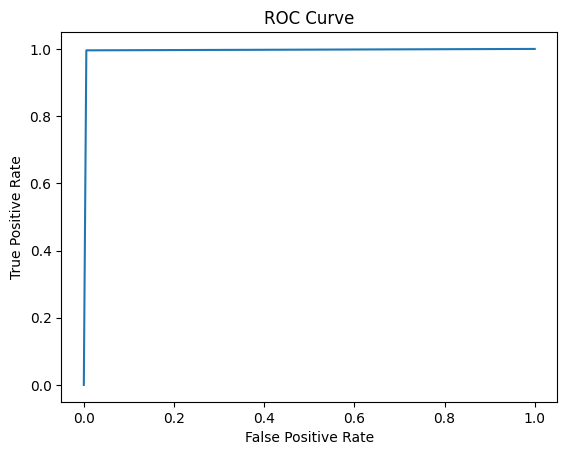

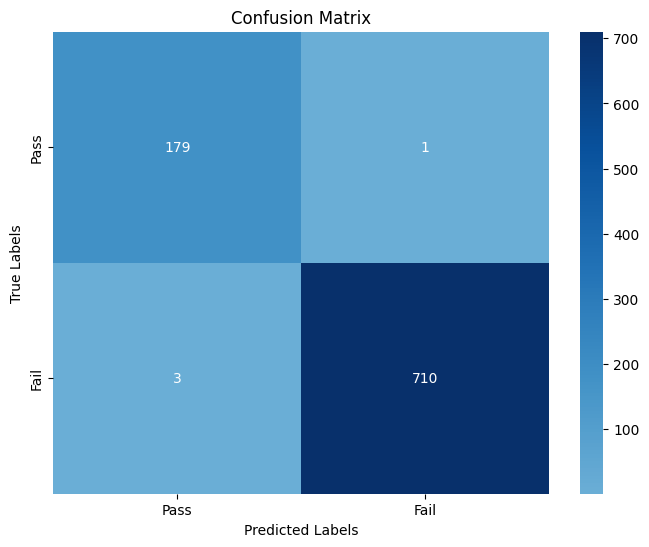

{'Accuracy': 0.9955207166853304, 'Confusion Matrix': array([[179,   1],
       [  3, 710]]), 'Precision': 0.9985935302390999, 'Recall': 0.9957924263674615, 'F1 Score': 0.9971910112359551, 'F2 Score': 0.9963513892786978, 'AUC Score': 0.995118435405953, 'TN': 179, 'FP': 1, 'FN': 3, 'TP': 710}


Model: MLPClassifier
Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}


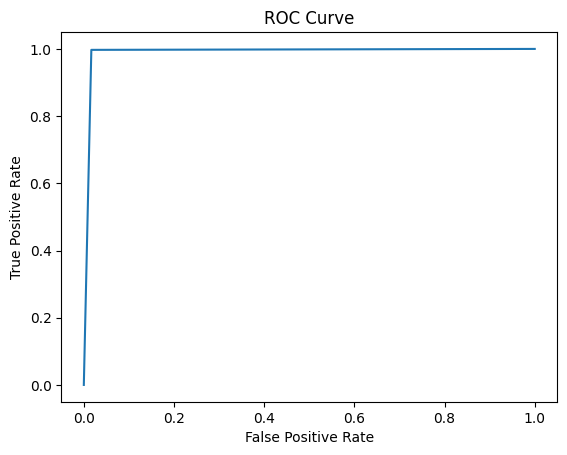

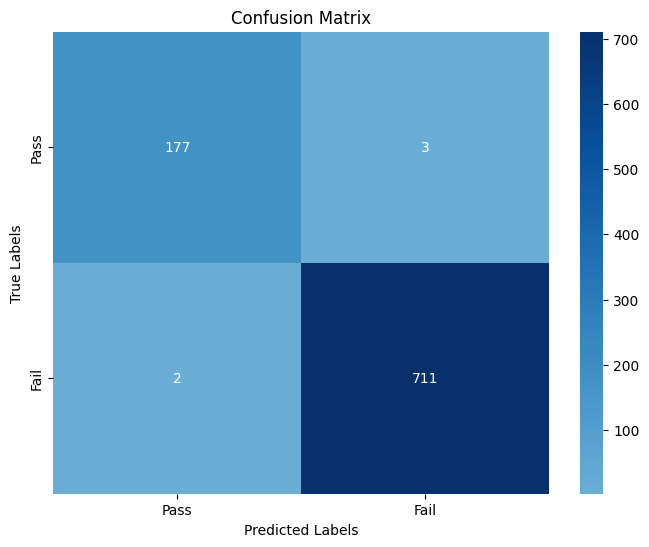

{'Accuracy': 0.9944008958566629, 'Confusion Matrix': array([[177,   3],
       [  2, 711]]), 'Precision': 0.9957983193277311, 'Recall': 0.9971949509116409, 'F1 Score': 0.9964961457603363, 'F2 Score': 0.996915311273135, 'AUC Score': 0.9902641421224871, 'TN': 177, 'FP': 3, 'FN': 2, 'TP': 711}


Model: AdaBoostClassifier
Best Hyperparameters: {'n_estimators': 200}


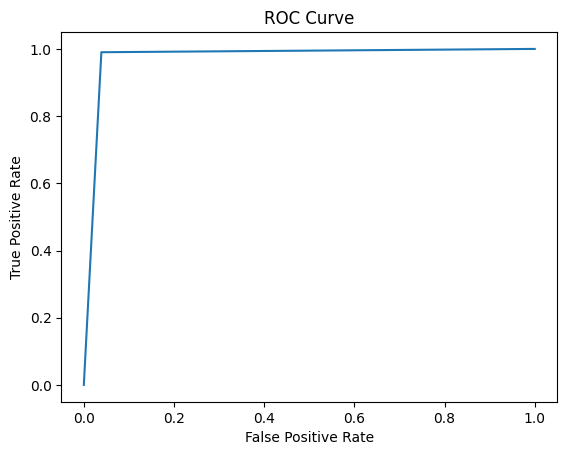

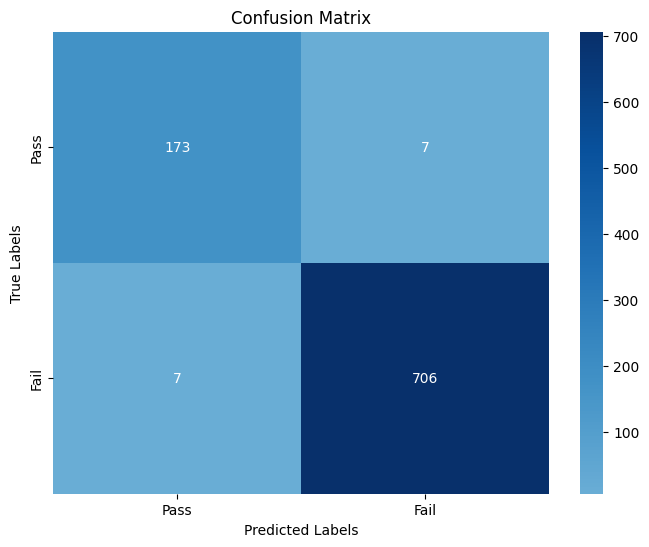

{'Accuracy': 0.9843225083986562, 'Confusion Matrix': array([[173,   7],
       [  7, 706]]), 'Precision': 0.9901823281907434, 'Recall': 0.9901823281907434, 'F1 Score': 0.9901823281907434, 'F2 Score': 0.9901823281907435, 'AUC Score': 0.9756467196509273, 'TN': 173, 'FP': 7, 'FN': 7, 'TP': 706}


Model: KNeighborsClassifier
Best Hyperparameters: {'n_neighbors': 5}


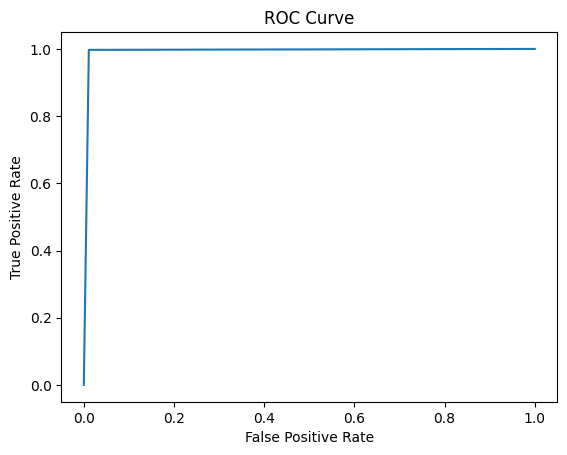

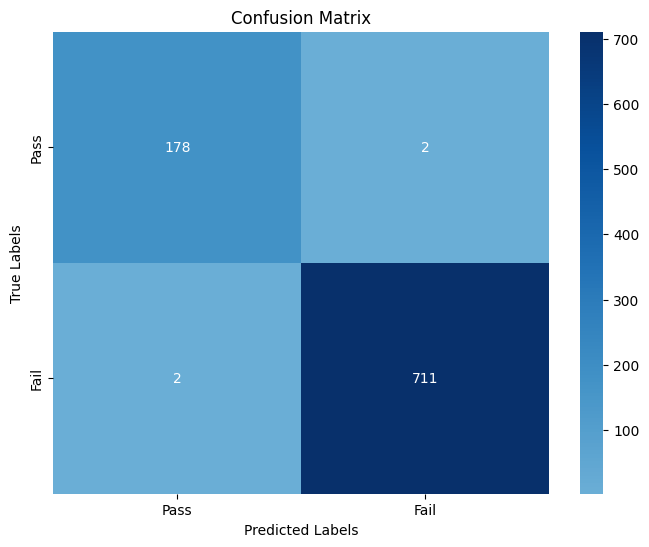

{'Accuracy': 0.9955207166853304, 'Confusion Matrix': array([[178,   2],
       [  2, 711]]), 'Precision': 0.9971949509116409, 'Recall': 0.9971949509116409, 'F1 Score': 0.9971949509116409, 'F2 Score': 0.9971949509116408, 'AUC Score': 0.993041919900265, 'TN': 178, 'FP': 2, 'FN': 2, 'TP': 711}


Model: RandomForestClassifier
Best Hyperparameters: {'max_depth': 20}


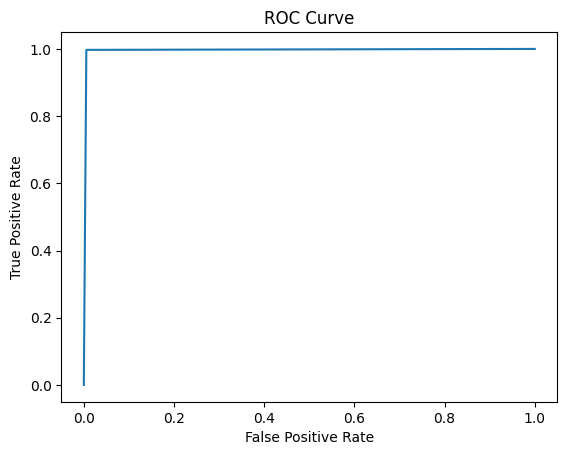

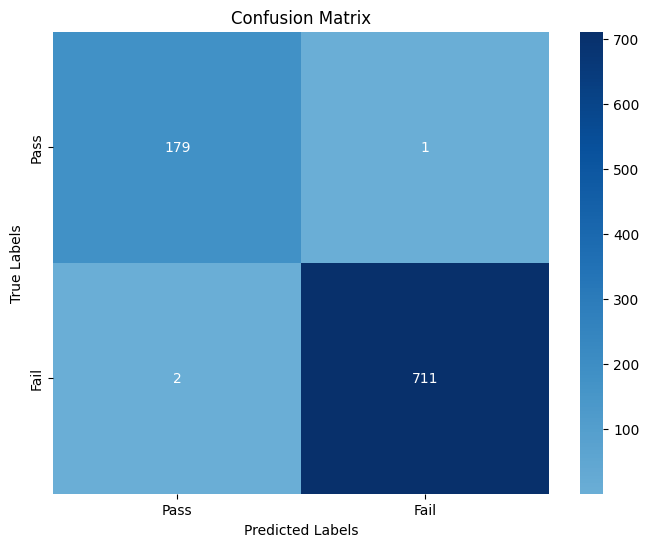

{'Accuracy': 0.9966405375139977, 'Confusion Matrix': array([[179,   1],
       [  2, 711]]), 'Precision': 0.9985955056179775, 'Recall': 0.9971949509116409, 'F1 Score': 0.9978947368421052, 'F2 Score': 0.9974747474747473, 'AUC Score': 0.9958196976780427, 'TN': 179, 'FP': 1, 'FN': 2, 'TP': 711}


Model: DecisionTreeClassifier
Best Hyperparameters: {'max_depth': None}


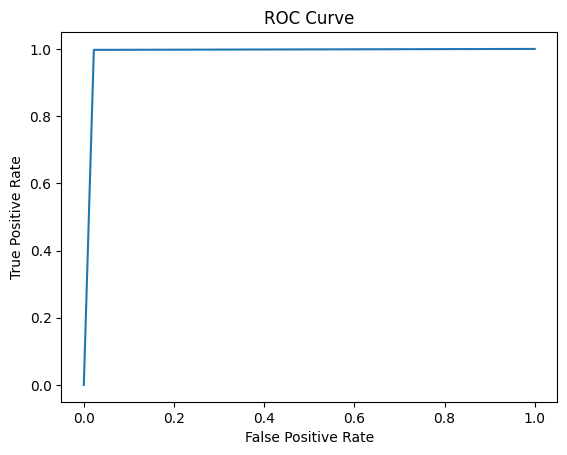

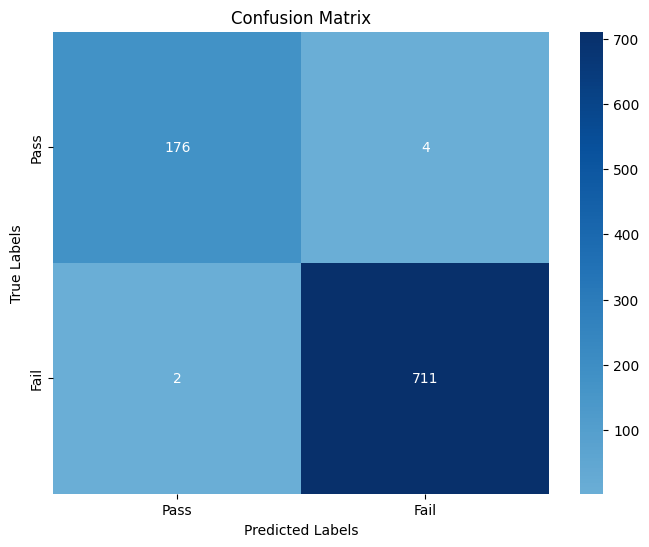

{'Accuracy': 0.9932810750279956, 'Confusion Matrix': array([[176,   4],
       [  2, 711]]), 'Precision': 0.9944055944055944, 'Recall': 0.9971949509116409, 'F1 Score': 0.995798319327731, 'F2 Score': 0.9966358284272496, 'AUC Score': 0.9874863643447093, 'TN': 176, 'FP': 4, 'FN': 2, 'TP': 711}


Model: GaussianProcessClassifier
Best Hyperparameters: {}


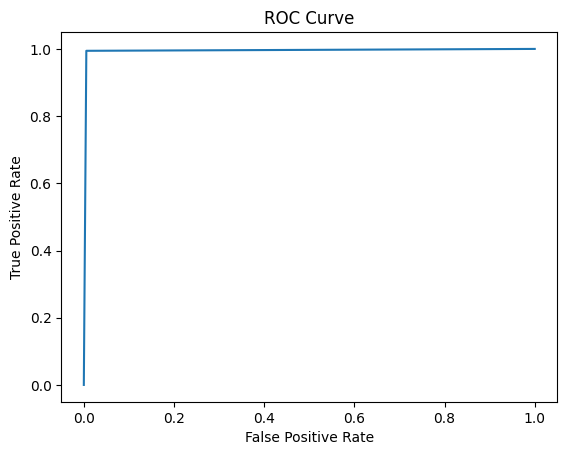

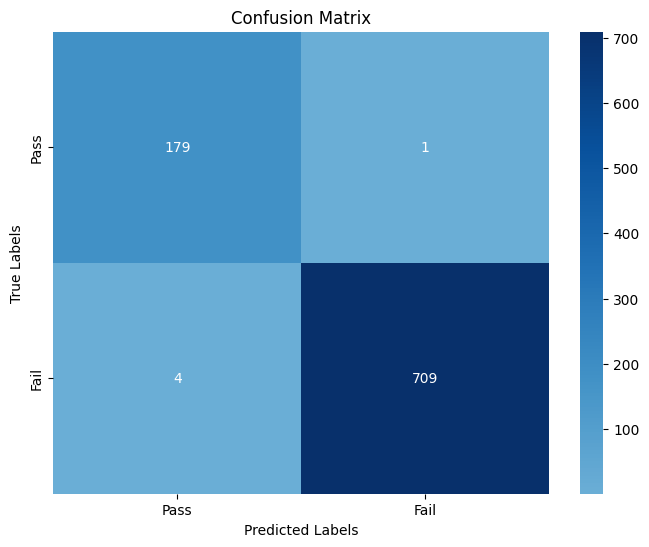

{'Accuracy': 0.9944008958566629, 'Confusion Matrix': array([[179,   1],
       [  4, 709]]), 'Precision': 0.9985915492957746, 'Recall': 0.9943899018232819, 'F1 Score': 0.9964862965565706, 'F2 Score': 0.9952274003368893, 'AUC Score': 0.9944171731338631, 'TN': 179, 'FP': 1, 'FN': 4, 'TP': 709}


Model: GradientBoostingClassifier
Best Hyperparameters: {'n_estimators': 200}


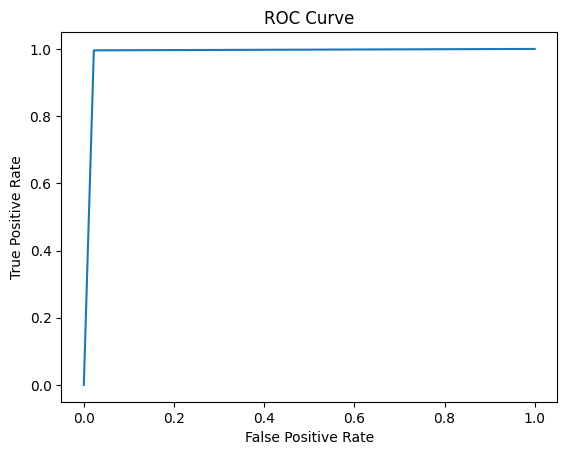

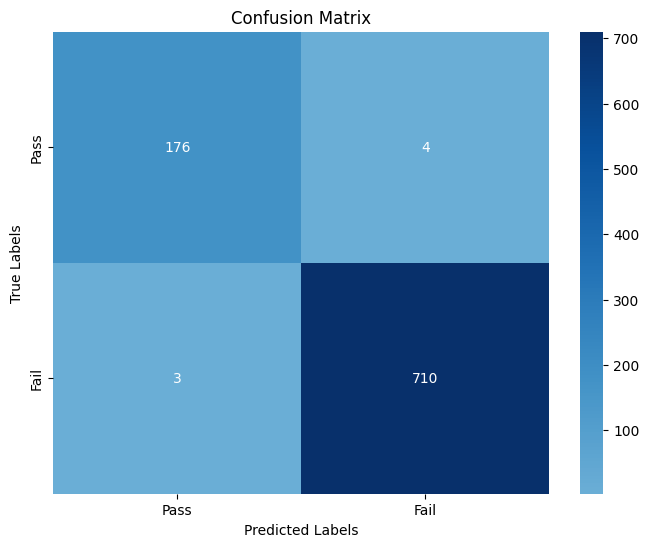

{'Accuracy': 0.9921612541993281, 'Confusion Matrix': array([[176,   4],
       [  3, 710]]), 'Precision': 0.9943977591036415, 'Recall': 0.9957924263674615, 'F1 Score': 0.9950946040644708, 'F2 Score': 0.9955131800336513, 'AUC Score': 0.9867851020726196, 'TN': 176, 'FP': 4, 'FN': 3, 'TP': 710}


Model: HistGradientBoostingClassifier
Best Hyperparameters: {'max_depth': None}


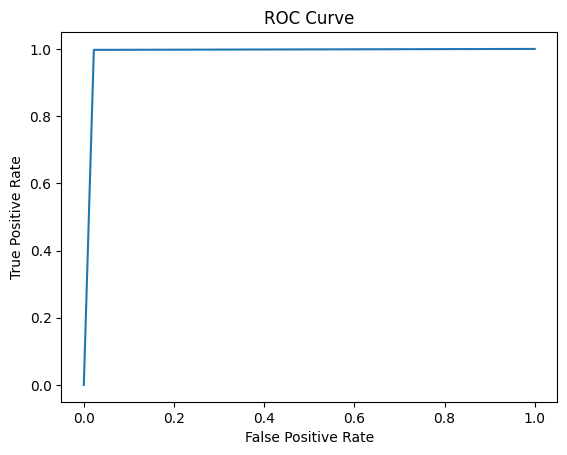

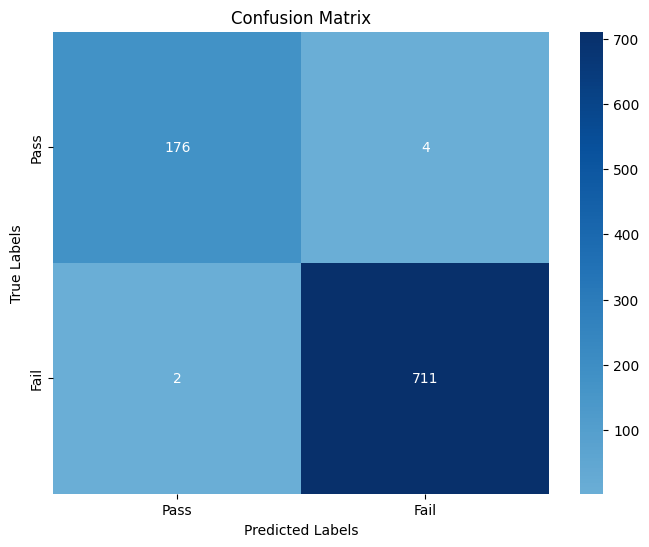

{'Accuracy': 0.9932810750279956, 'Confusion Matrix': array([[176,   4],
       [  2, 711]]), 'Precision': 0.9944055944055944, 'Recall': 0.9971949509116409, 'F1 Score': 0.995798319327731, 'F2 Score': 0.9966358284272496, 'AUC Score': 0.9874863643447093, 'TN': 176, 'FP': 4, 'FN': 2, 'TP': 711}


Model: GaussianNB
Best Hyperparameters: {}


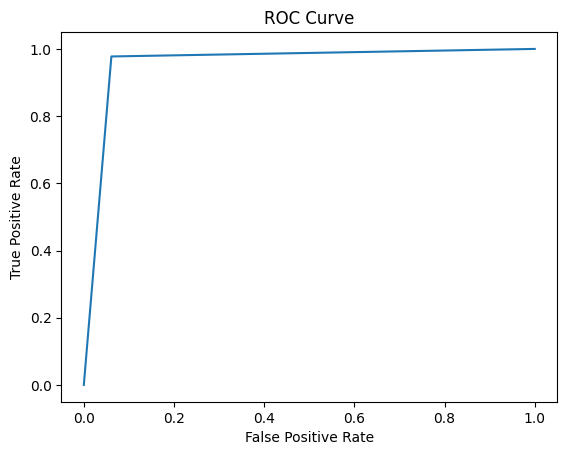

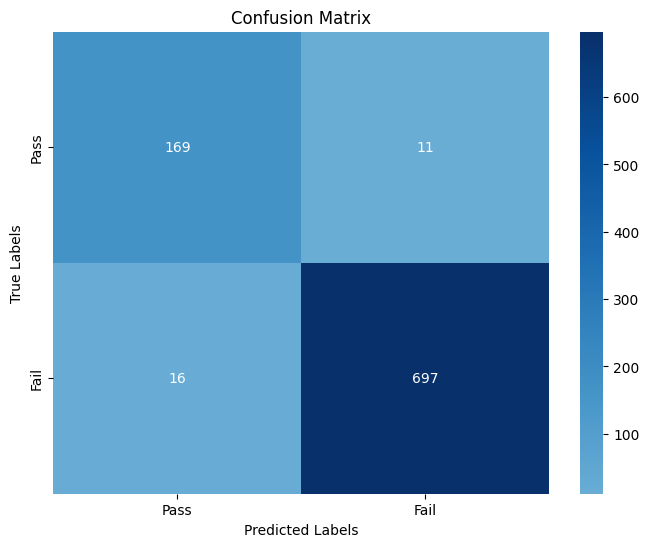

{'Accuracy': 0.9697648376259799, 'Confusion Matrix': array([[169,  11],
       [ 16, 697]]), 'Precision': 0.9844632768361582, 'Recall': 0.9775596072931276, 'F1 Score': 0.9809992962702322, 'F2 Score': 0.9789325842696629, 'AUC Score': 0.9582242480910083, 'TN': 169, 'FP': 11, 'FN': 16, 'TP': 697}


Model: LogisticRegression
Best Hyperparameters: {'C': 100}


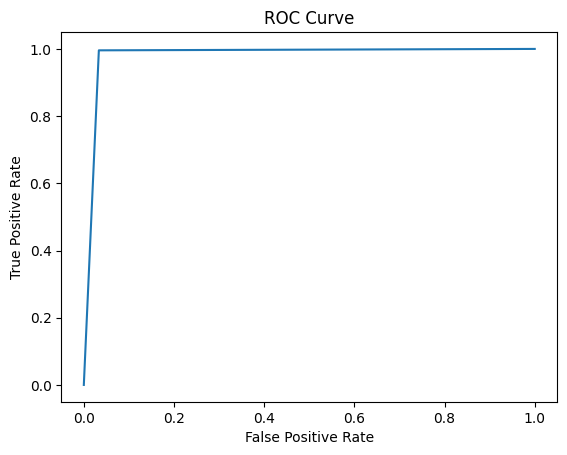

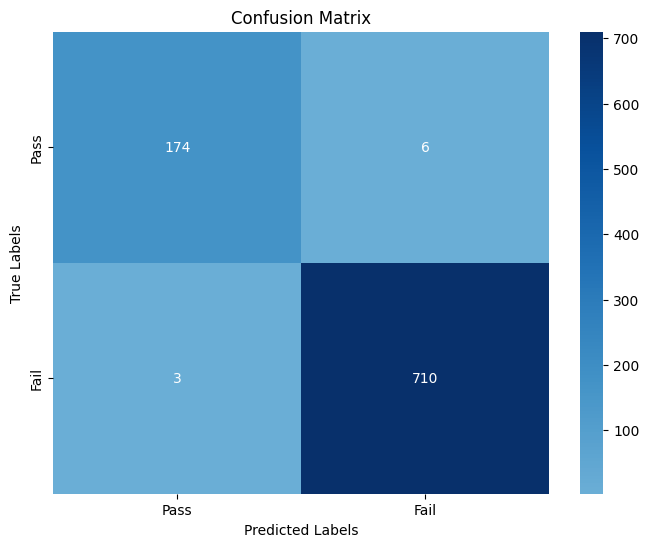

{'Accuracy': 0.9899216125419933, 'Confusion Matrix': array([[174,   6],
       [  3, 710]]), 'Precision': 0.9916201117318436, 'Recall': 0.9957924263674615, 'F1 Score': 0.9937018894331701, 'F2 Score': 0.9949551569506727, 'AUC Score': 0.9812295465170641, 'TN': 174, 'FP': 6, 'FN': 3, 'TP': 710}




In [34]:
# Perform hyperparameter tuning using GridSearchCV
best_models = {}  # Dictionary to store the best models

for model in models_hyperparameter:
    model_name = model.__class__.__name__  # Get the name of the model class
    print("Model:", model_name)

    if model_name in param_grids:
        param_grid = param_grids[model_name]  # Get the hyperparameter grid for the model

        # Perform GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train1, y_train1)

        best_params = grid_search.best_params_  # Get the best hyperparameters
        print("Best Hyperparameters:", best_params)

        model.set_params(**best_params)  # Set the best hyperparameters for the model

    model.fit(X_train1, y_train1)  # Fit the model with training data
    y_pred = model.predict(X_test1)
    evaluate_model(model, X_train1, y_train1, X_test1, y_test1)  # Evaluate the model
    print("\n" + "="*50 + "\n")

    # Store the best model for later comparison
    best_models[model_name] = model

In [35]:
# Print out the 'best_models' to see which combination of hyperparameters is the best for each model
best_models

{'SVC': SVC(C=10),
 'MLPClassifier': MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=1),
 'AdaBoostClassifier': AdaBoostClassifier(n_estimators=200),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'RandomForestClassifier': RandomForestClassifier(max_depth=20, max_features='log2'),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'GaussianProcessClassifier': GaussianProcessClassifier(),
 'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=200),
 'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000)}

In [37]:
# Compare models based on accuracy and AUC after hyperparameter tuning
accuracy_scores_hyper = []
auc_scores_hyper = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test1)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test1, y_pred)
    accuracy_scores_hyper.append((model_name, accuracy))

    # Evaluate AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test1)[:, 1]  # Probability of the positive class
        auc_score = roc_auc_score(y_test1, y_prob)
        auc_scores_hyper.append((model_name, auc_score))

# Print and compare accuracy and AUC scores
print("\nModel Comparison:")
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores_hyper:
    print(f"{model_name}: {accuracy:.4f}")

print("\nAUC Scores:")
for model_name, auc_score in auc_scores_hyper:
    print(f"{model_name}: {auc_score:.4f}")


Model Comparison:
Accuracy Scores:
SVC: 0.9955
MLPClassifier: 0.9944
AdaBoostClassifier: 0.9843
KNeighborsClassifier: 0.9955
RandomForestClassifier: 0.9966
DecisionTreeClassifier: 0.9933
GaussianProcessClassifier: 0.9944
GradientBoostingClassifier: 0.9922
HistGradientBoostingClassifier: 0.9933
GaussianNB: 0.9698
LogisticRegression: 0.9899

AUC Scores:
MLPClassifier: 0.9996
AdaBoostClassifier: 0.9889
KNeighborsClassifier: 0.9942
RandomForestClassifier: 1.0000
DecisionTreeClassifier: 0.9888
GaussianProcessClassifier: 0.9995
GradientBoostingClassifier: 0.9995
HistGradientBoostingClassifier: 0.9999
GaussianNB: 0.9787
LogisticRegression: 0.9909


In [ ]:
'''
Considering both accuracy and AUC scores, the RandomForestClassifier appears to be the best model, having the highest accuracy and AUC scores. 
It is closely followed by SVC and KNeighborsClassifier
'''

## **PART 6: REGISTER THE BEST MODEL IN AZURE CLOUD**

In [41]:
import joblib

# Save each model using joblib
for model_name, model in best_models.items():
    if isinstance(model, RandomForestClassifier):
        # Replace 'path/to/save' with the desired path to save each model
        file_path = f'{model_name}_model.joblib'
        joblib.dump(model, file_path)
        
        # Print the model name and the path where it's saved
        print(f"Saved model '{model_name}' to: {file_path}")

Saved model 'RandomForestClassifier' to: RandomForestClassifier_model.joblib


In [42]:
from azureml.core import Workspace, Experiment, Model

# Load the RandomForestClassifier model using joblib
rf_model = joblib.load('RandomForestClassifier_model.joblib')

# Register the model in Azure ML workspace
model_name = 'RandomForestClassifier_model'  # Replace with your desired model name
model = Model.register(model_path='RandomForestClassifier_model.joblib',
                       model_name=model_name,
                       workspace=ws)

Registering model RandomForestClassifier_model


In [43]:
for model in Model.list(workspace=ws):
    print(model.name, 'version:', model.version)

RandomForestClassifier_model version: 1
